# Problem Statement

* Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

- Approved: The Company has approved loan Application

- Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

- Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

- Unused offer: Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

- Business Objective

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

Our goal is to analyze the new and previous application data to study the pattern of defaulters (TARGET) and give recommendations based on the observations which should help the company to make informed decision based on past data, and reduce the number of defaulters in future.

In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows",1000)
import warnings
warnings.filterwarnings('ignore')

# A. Loading Dataset 

In [2]:
# Loading the "application_data" datset.(df)
df=pd.read_csv("application_data.csv")

In [3]:
# Getting to see the variables and values
df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0         

In [4]:
# Checking the number of rows and columns in the dataset.(shape)
df.shape

(307511, 122)

In [5]:
# Checking the info of the dataset.
df.info(-1, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
# Checking the summary of the numeric columns of dataframe df.
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

# 1. Checking missing values.

In [7]:
# Checking the percentage of null values in each columns in the dataset
(100*df.isnull().sum()/len(df)).reset_index().rename(columns={"index":"Variables",0:"Missing Percentage"}).sort_values("Missing Percentage",ascending=False)

Variables  Missing Percentage
76                COMMONAREA_MEDI           69.872297
48                 COMMONAREA_AVG           69.872297
62                COMMONAREA_MODE           69.872297
70       NONLIVINGAPARTMENTS_MODE           69.432963
56        NONLIVINGAPARTMENTS_AVG           69.432963
84       NONLIVINGAPARTMENTS_MEDI           69.432963
86             FONDKAPREMONT_MODE           68.386172
68          LIVINGAPARTMENTS_MODE           68.354953
54           LIVINGAPARTMENTS_AVG           68.354953
82          LIVINGAPARTMENTS_MEDI           68.354953
52                  FLOORSMIN_AVG           67.848630
66                 FLOORSMIN_MODE           67.848630
80                 FLOORSMIN_MEDI           67.848630
75               YEARS_BUILD_MEDI           66.497784
61               YEARS_BUILD_MODE           66.497784
47                YEARS_BUILD_AVG           66.497784
21                    OWN_CAR_AGE           65.990810
81                  LANDAREA_MEDI           59.376738
67                  LANDAREA_MODE           59.376738
53                   LANDAREA_AVG           59.376738
73              BASEMENTAREA_MEDI           58.515956
45               BASEMENTAREA_AVG           58.515956
59              BASEMENTAREA_MODE           58.515956
41                   EXT_SOURCE_1           56.381073
71             NONLIVINGAREA_MODE           55.179164
57              NONLIVINGAREA_AVG           55.179164
85             NONLIVINGAREA_MEDI           55.179164
77                 ELEVATORS_MEDI           53.295980
49                  ELEVATORS_AVG           53.295980
63                 ELEVATORS_MODE           53.295980
89             WALLSMATERIAL_MODE           50.840783
72                APARTMENTS_MEDI           50.749729
44                 APARTMENTS_AVG           50.749729
58                APARTMENTS_MODE           50.749729
78                 ENTRANCES_MEDI           50.348768
50                  ENTRANCES_AVG           50.348768
64                 ENTRANCES_MODE           50.348768
55                 LIVINGAREA_AVG           50.193326
69                LIVINGAREA_MODE           50.193326
83                LIVINGAREA_MEDI           50.193326
87                 HOUSETYPE_MODE           50.176091
65                 FLOORSMAX_MODE           49.760822
79                 FLOORSMAX_MEDI           49.760822
51                  FLOORSMAX_AVG           49.760822
60   YEARS_BEGINEXPLUATATION_MODE           48.781019
74   YEARS_BEGINEXPLUATATION_MEDI           48.781019
46    YEARS_BEGINEXPLUATATION_AVG           48.781019
88                 TOTALAREA_MODE           48.268517
90            EMERGENCYSTATE_MODE           47.398304
28                OCCUPATION_TYPE           31.345545
43                   EXT_SOURCE_3           19.825307
116    AMT_REQ_CREDIT_BUREAU_HOUR           13.501631
117     AMT_REQ_CREDIT_BUREAU_DAY           13.501631
118    AMT_REQ_CREDIT_BUREAU_WEEK           13.501631
119     AMT_REQ_CREDIT_BUREAU_MON           13.501631
120     AMT_REQ_CREDIT_BUREAU_QRT           13.501631
121    AMT_REQ_CREDIT_BUREAU_YEAR           13.501631
11                NAME_TYPE_SUITE            0.420148
91       OBS_30_CNT_SOCIAL_CIRCLE            0.332021
92       DEF_30_CNT_SOCIAL_CIRCLE            0.332021
93       OBS_60_CNT_SOCIAL_CIRCLE            0.332021
94       DEF_60_CNT_SOCIAL_CIRCLE            0.332021
42                   EXT_SOURCE_2            0.214626
10                AMT_GOODS_PRICE            0.090403
9                     AMT_ANNUITY            0.003902
29                CNT_FAM_MEMBERS            0.000650
95         DAYS_LAST_PHONE_CHANGE            0.000325
6                    CNT_CHILDREN            0.000000
102               FLAG_DOCUMENT_8            0.000000
2              NAME_CONTRACT_TYPE            0.000000
3                     CODE_GENDER            0.000000
4                    FLAG_OWN_CAR            0.000000
96                FLAG_DOCUMENT_2            0.000000
97                FLAG_DOCUM

In [8]:
# Dropping columns with null value percentage more than 35% since none of the important columns are dropped.Assigning to df1.
df1 = df[df.columns[df.isnull().sum()/len(df) < 0.35]]

In [9]:
# Checking number of columns after dropping columns with null values above 35%.
df1.shape

(307511, 73)

In [10]:
# Checking columns with null values in percentage
(100*df1.isnull().sum()/len(df1)).reset_index().rename(columns={"index":"Variables",0:"Missing Percentage"}).sort_values("Missing Percentage",ascending=False)

Variables  Missing Percentage
27              OCCUPATION_TYPE           31.345545
41                 EXT_SOURCE_3           19.825307
72   AMT_REQ_CREDIT_BUREAU_YEAR           13.501631
71    AMT_REQ_CREDIT_BUREAU_QRT           13.501631
70    AMT_REQ_CREDIT_BUREAU_MON           13.501631
69   AMT_REQ_CREDIT_BUREAU_WEEK           13.501631
68    AMT_REQ_CREDIT_BUREAU_DAY           13.501631
67   AMT_REQ_CREDIT_BUREAU_HOUR           13.501631
11              NAME_TYPE_SUITE            0.420148
42     OBS_30_CNT_SOCIAL_CIRCLE            0.332021
43     DEF_30_CNT_SOCIAL_CIRCLE            0.332021
44     OBS_60_CNT_SOCIAL_CIRCLE            0.332021
45     DEF_60_CNT_SOCIAL_CIRCLE            0.332021
40                 EXT_SOURCE_2            0.214626
10              AMT_GOODS_PRICE            0.090403
9                   AMT_ANNUITY            0.003902
28              CNT_FAM_MEMBERS            0.000650
46       DAYS_LAST_PHONE_CHANGE            0.000325
62             FLAG_DOCUMENT_17            0.000000
63             FLAG_DOCUMENT_18            0.000000
66             FLAG_DOCUMENT_21            0.000000
65             FLAG_DOCUMENT_20            0.000000
64             FLAG_DOCUMENT_19            0.000000
47              FLAG_DOCUMENT_2            0.000000
48              FLAG_DOCUMENT_3            0.000000
49              FLAG_DOCUMENT_4            0.000000
50              FLAG_DOCUMENT_5            0.000000
61             FLAG_DOCUMENT_16            0.000000
51              FLAG_DOCUMENT_6            0.000000
52              FLAG_DOCUMENT_7            0.000000
53              FLAG_DOCUMENT_8            0.000000
54              FLAG_DOCUMENT_9            0.000000
55             FLAG_DOCUMENT_10            0.000000
56             FLAG_DOCUMENT_11            0.000000
39            ORGANIZATION_TYPE            0.000000
58             FLAG_DOCUMENT_13            0.000000
59             FLAG_DOCUMENT_14            0.000000
60             FLAG_DOCUMENT_15            0.000000
57             FLAG_DOCUMENT_12            0.000000
0                    SK_ID_CURR            0.000000
38      LIVE_CITY_NOT_WORK_CITY            0.000000
19            DAYS_REGISTRATION            0.000000
2            NAME_CONTRACT_TYPE            0.000000
3                   CODE_GENDER            0.000000
4                  FLAG_OWN_CAR            0.000000
5               FLAG_OWN_REALTY            0.000000
6                  CNT_CHILDREN            0.000000
7              AMT_INCOME_TOTAL            0.000000
8                    AMT_CREDIT            0.000000
12             NAME_INCOME_TYPE            0.000000
13          NAME_EDUCATION_TYPE            0.000000
14           NAME_FAMILY_STATUS            0.000000
15            NAME_HOUSING_TYPE            0.000000
16   REGION_POPULATION_RELATIVE            0.000000
17                   DAYS_BIRTH            0.000000
18                DAYS_EMPLOYED            0.000000
20              DAYS_ID_PUBLISH            0.000000
37       REG_CITY_NOT_WORK_CITY            0.000000
21                   FLAG_MOBIL            0.000000
22               FLAG_EMP_PHONE            0.000000
23              FLAG_WORK_PHONE            0.000000
24             FLAG_CONT_MOBILE            0.000000
25                   FLAG_PHONE            0.000000
26                   FLAG_EMAIL            0.000000
29         REGION_RATING_CLIENT            0.000000
30  REGION_RATING_CLIENT_W_CITY            0.000000
31   WEEKDAY_APPR_PROCESS_START            0.000000
32      HOUR_APPR_PROCESS_START            0.000000
33   REG_REGION_NOT_LIVE_REGION            0.000000
34   REG_REGION_NOT_WORK_REGION            0.000000
35  LIVE_REGION_NOT_WORK_REGION            0.000000
1                        TARGET            0.000000
36       REG_CITY_NOT_LIVE_CITY            0.000000

In [11]:
# Dropping the flag documents columns.
df1 = df1.drop(df1.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'], axis= 1)

In [12]:
df1 = df1.drop(df1.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'], axis= 1)

# 2. Handling of missing values.

In [13]:
df1["OCCUPATION_TYPE"].value_counts(ascending=False)

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [14]:
# Since the missing values are relatively high, we can make a new category as "Unknown".
df1["OCCUPATION_TYPE"] = df1["OCCUPATION_TYPE"].fillna("Unknown")

In [15]:
# Checking the value counts of the variable "OCCUPATION_TYPE".
df1["OCCUPATION_TYPE"].value_counts(ascending=False)

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [16]:
# Checking the "EXT_SOURCE_3" column.
df1["EXT_SOURCE_3"].value_counts(ascending=False)

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
0.581484    1141
0.689479    1138
0.595456    1136
0.554947    1132
0.621226    1109
0.657784    1092
0.607557    1067
0.643026    1066
0.450747    1064
0.626304    1054
0.673830    1030
0.651260    1029
0.511892    1026
0.706205     992
0.553165     984
0.593718     978
0.634706     969
0.740799     961
0.681706     959
0.565608     956
0.728141     953
0.771362     947
0.576209     943
0.586740     942
0.656158     931
0.631355     929
0.484851     922
0.709189     919
0.665855     912
0.684828     911
0.538863     911
0.617826     907
0.591977     904
0.513694     895
0.683269     895
0.579727     895
0.000527     886
0.733815     880
0.619528     879
0.501075     879
0.508287     877
0.754406     874
0.712155     867
0.832785     865
0.558507     864
0.524496     860
0.633032     854
0.659406     850
0.812823     849
0.636376     848
0.680139     837
0.474051     837
0.647977     837
0.546023     8

In [17]:
# Since it is a numeric column, and looking into stats of column.
df1["EXT_SOURCE_3"].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [18]:
# Imputting null values with median.
df1["EXT_SOURCE_3"] = df1["EXT_SOURCE_3"].fillna(df1["EXT_SOURCE_3"].median())

In [19]:
# Checking again the column.
df1["EXT_SOURCE_3"].describe()

count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [20]:
# Cross-checking for null values.
df1["EXT_SOURCE_3"].isnull().sum()

0

In [21]:
# Checking "AMT_REQ_CREDIT_BUREAU_YEAR" column.
df1["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts(ascending=False)

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [22]:
# Since it is a numeric column, looking into stats of column.
df1["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [23]:
# Imputing null values with median.
df1["AMT_REQ_CREDIT_BUREAU_YEAR"]= df1["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(df1["AMT_REQ_CREDIT_BUREAU_YEAR"].median())

In [24]:
# Checking statistical values of the column.
df1["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    307511.000000
mean          1.778463
std           1.765523
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [25]:
# Cross-checking for null values.
df1["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

0

In [26]:
# Checking "AMT_REQ_CREDIT_BUREAU_QRT" column.
df1["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts(ascending=True)

261.0         1
19.0          1
8.0           7
7.0           7
6.0          28
5.0          64
4.0         476
3.0        1717
2.0       14412
1.0       33862
0.0      215417
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [27]:
# Since it is a numeric column, imputing null values with median.
df1["AMT_REQ_CREDIT_BUREAU_YEAR"] = df1["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(df1["AMT_REQ_CREDIT_BUREAU_YEAR"].median())

In [28]:
# Checking statistical values of the column.
df1["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    307511.000000
mean          1.778463
std           1.765523
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [29]:
# Cross-checking for null values.
df1["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

0

In [30]:
# Checking "AMT_REQ_CREDIT_BUREAU_MON" column.
df1["AMT_REQ_CREDIT_BUREAU_MON"].value_counts(ascending=False)

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [31]:
# Looking into statistical values of the column.
df1["AMT_REQ_CREDIT_BUREAU_MON"].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [32]:
# Since it is a numeric column, imputing null values with median.
df1["AMT_REQ_CREDIT_BUREAU_MON"] = df1["AMT_REQ_CREDIT_BUREAU_MON"].fillna(df1["AMT_REQ_CREDIT_BUREAU_MON"].median())

In [33]:
# Cross-checking null values in column.
df1["AMT_REQ_CREDIT_BUREAU_MON"].isnull().sum()

0

In [34]:
# Checking "AMT_REQ_CREDIT_BUREAU_WEEK" column.
df1["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts(ascending=False)

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [35]:
# Looking the statistical values of the column.
df1["AMT_REQ_CREDIT_BUREAU_WEEK"].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [36]:
# Since it is a numeric column, null values are imputed with median.
df1["AMT_REQ_CREDIT_BUREAU_WEEK"] = df1["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(df1["AMT_REQ_CREDIT_BUREAU_WEEK"].median())

In [37]:
# Cross-checking for null values.
df1["AMT_REQ_CREDIT_BUREAU_WEEK"].isnull().sum()

0

In [38]:
# Looking "AMT_REQ_CREDIT_BUREAU_DAY" column.
df1["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts(ascending=False)

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [39]:
# Looking into the statistical values of the column.
df1["AMT_REQ_CREDIT_BUREAU_DAY"].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [40]:
# Since it is a numeric column, null values are imputed with median.
df1["AMT_REQ_CREDIT_BUREAU_DAY"] = df1["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(df1["AMT_REQ_CREDIT_BUREAU_DAY"].median())

In [41]:
# Cross-checking for null values.
df1["AMT_REQ_CREDIT_BUREAU_DAY"].isnull().sum()

0

In [42]:
# Looking "AMT_REQ_CREDIT_BUREAU_HOUR" column.
df1["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts(ascending=False)

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [43]:
# Lookin into the statistical values of the column.
df1["AMT_REQ_CREDIT_BUREAU_HOUR"].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [44]:
# Since it is a numeric column, null values are imputed with median.
df1["AMT_REQ_CREDIT_BUREAU_HOUR"] = df1["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(df1["AMT_REQ_CREDIT_BUREAU_HOUR"].median())

In [45]:
# Cross-checking for null values.
df1["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum()

0

In [46]:
# Looking "NAME_TYPE_SUITE" column.
df1["NAME_TYPE_SUITE"].value_counts(ascending=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [47]:
# Looking into the statistical description of the column.
df1["NAME_TYPE_SUITE"].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [48]:
# Since it is a categorical column, null values are imputed with mode.
df1["NAME_TYPE_SUITE"]= df1["NAME_TYPE_SUITE"].fillna(df1["NAME_TYPE_SUITE"].mode()[0])

In [49]:
# Checking for null values.
df1["NAME_TYPE_SUITE"].isnull().sum()

0

In [50]:
# Looking "EXT_SOURCE_2" column.
df1["EXT_SOURCE_2"].value_counts(ascending=False)

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [51]:
# Looking into the statistical values of the column.
df1["EXT_SOURCE_2"].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [52]:
# Since it is a numeric column, null values are imputed with median.
df1["EXT_SOURCE_2"] = df1["EXT_SOURCE_2"].fillna(df1["EXT_SOURCE_2"].median())

In [53]:
# Cross-checking for null values.
df1["EXT_SOURCE_2"].isnull().sum()

0

In [54]:
# Looking "AMT_GOODS_PRICE" column.
df1["AMT_GOODS_PRICE"].value_counts(ascending=False)

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [55]:
# Looking for the statistical values of the column.
df1["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [56]:
# Since it is a numeric column, null values are imputed with median.
df1["AMT_GOODS_PRICE"] = df1["AMT_GOODS_PRICE"].fillna(df1["AMT_GOODS_PRICE"].median())

In [57]:
# Cross-checking for null values.
df1["AMT_GOODS_PRICE"].isnull().sum()

0

In [58]:
# Looking "AMT_ANNUITY" column.
df1["AMT_ANNUITY"].value_counts(ascending=False)

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [59]:
#Looking for statistical values of the column.
df1["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [60]:
# Since it is a numeric column, null values are imputed with median.
df1["AMT_ANNUITY"] = df1["AMT_ANNUITY"].fillna(df1["AMT_ANNUITY"].median())

In [61]:
# Cross-checking for null values.
df1["AMT_ANNUITY"].isnull().sum()

0

In [62]:
# Looking "CNT_FAM_MEMBERS" column.
df1["CNT_FAM_MEMBERS"].value_counts(ascending=False)

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [63]:
# Looking for statistcal values of the column.
df1["CNT_FAM_MEMBERS"].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [64]:
# Since it is a numeric column, null values are imputed with median.
df1["CNT_FAM_MEMBERS"] = df1["CNT_FAM_MEMBERS"].fillna(df1["CNT_FAM_MEMBERS"].median())

In [65]:
# Cross-checking for null values. 
df1["CNT_FAM_MEMBERS"].isnull().sum()

0

In [66]:
# Looking "ORGANIZATION_TYPE" column.
df1["ORGANIZATION_TYPE"].value_counts(ascending=False)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [67]:
# Replacing "XNA" with "No-info".
df1["ORGANIZATION_TYPE"] = df1["ORGANIZATION_TYPE"].replace(['XNA'], 'No_info')

In [68]:
# Cross-checking the column.
df1["ORGANIZATION_TYPE"].value_counts(ascending=False)

Business Entity Type 3    67992
No_info                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [69]:
#Looking "CODE_GENDER" column.
df1["CODE_GENDER"].value_counts(ascending=False)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [70]:
# Since the number of "XNA" is less, it is replaced with "F".
df1["CODE_GENDER"] = df1["CODE_GENDER"].replace("XNA", "F")

In [71]:
# Cross-checking the column.
df1["CODE_GENDER"].value_counts(ascending=False)

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [72]:
# For better readability
df1['CODE_GENDER'].replace(["M", "F"], ["Male", "Female"], inplace=True)

In [73]:
# Checking the column.
df1["CODE_GENDER"].value_counts(ascending=False)

Female    202452
Male      105059
Name: CODE_GENDER, dtype: int64

# 3. Handling invalid values.

In [74]:
# Cleaning the "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_ID_PUBLISH" columns.
df1['AGE'] = round(abs(df1["DAYS_BIRTH"])//365,0)
df1['YEARS_EMPLOYED'] = round(abs(df1["DAYS_EMPLOYED"])//365,0)
df1['YEARS_REGISTRATION'] = round(abs(df1["DAYS_REGISTRATION"])//365,0)
df1['YEARS_ID_PUBLISH'] = round(abs(df1["DAYS_ID_PUBLISH"])//365,0)


In [75]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans        Male            N   
1      100003       0         Cash loans      Female            N   
2      100004       0    Revolving loans        Male            Y   
3      100006       0         Cash loans      Female            N   
4      100007       0         Cash loans        Male            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                         0.0                       0.0   
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         0.0                       0.0   
4  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  AGE  YEARS_EMPLOYED  \
0                       0.0                        1.0   25               1   
1                       0.0                        0.0   45               3   
2                       0.0                        0.0   52               0   
3                       NaN                        1.0   52               8   
4                       0.0                        0.0   54               8   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0                 9.0                 5  
1                 3.0                 0  
2                11.0                 6  
3                26.0                 6  
4                11.0                 9  

[5 rows x 51 columns]

In [76]:
# Dropping the columns "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"
df1 = df1.drop(["DAYS_BIRTH","DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_ID_PUBLISH"], axis = 1)

In [77]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans        Male            N   
1      100003       0         Cash loans      Female            N   
2      100004       0    Revolving loans        Male            Y   
3      100006       0         Cash loans      Female            N   
4      100007       0         Cash loans        Male            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                         0.0                       0.0   
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         0.0                       0.0   
4  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  AGE YEARS_EMPLOYED  \
0                       0.0                        1.0   25              1   
1                       0.0                        0.0   45              3   
2                       0.0                        0.0   52              0   
3                       NaN                        1.0   52              8   
4                       0.0                        0.0   54              8   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0                 9.0                 5  
1                 3.0                 0  
2                11.0                 6  
3                26.0                 6  
4                11.0                 9  

[5 rows x 47 columns]

# 4. Outlier identification & treatment.

In [78]:
list(df1.select_dtypes(include = ['float64','int64']))

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH']

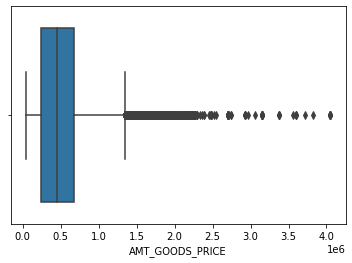

In [79]:
# Checking outliers in AMT_GOODS_PRICE.
sns.boxplot(df1["AMT_GOODS_PRICE"])
plt.show()

- Credit taken on high good's price is possible, so we leave it as it is.

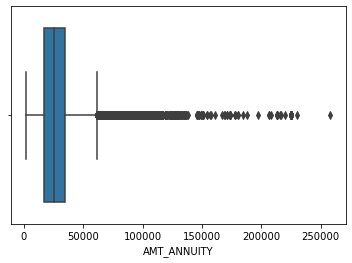

In [80]:
# Checking outliers in AMT_ANNUITY.
sns.boxplot(df1["AMT_ANNUITY"])
plt.show()

- Since high income client can pay higher monthly interest, so we leave the outlier.

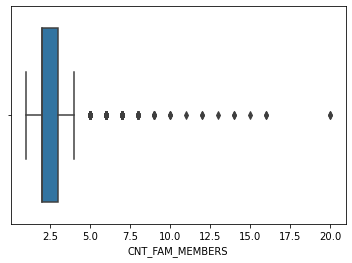

In [81]:
# Checking outliers in CNT_FAM_MEMBERS.
sns.boxplot(df1["CNT_FAM_MEMBERS"])
plt.show()

- We can't be certain about the outlier as the client may be lives in a joint family.

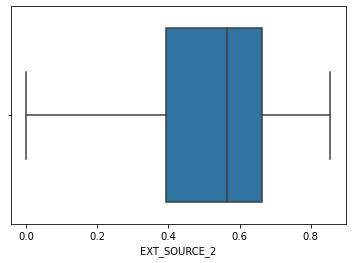

In [82]:
# Checking for outliers in EXT_SOURCE_2.
sns.boxplot(df1["EXT_SOURCE_2"])
plt.show()

- No outliers present in "EXT_SOURCE_2".

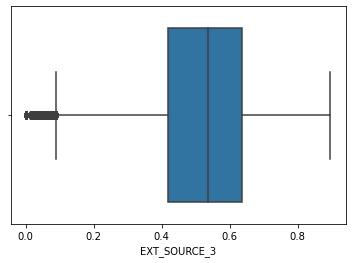

In [83]:
# Checking for outliers in EXT_SOURCE_3
sns.boxplot(df1["EXT_SOURCE_3"])
plt.show()

- It has some outliers but we leave as it is as it's not an important variable for the analysis.

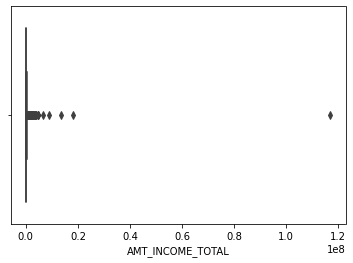

In [84]:
# Checking for outliers in AMT_INCOME_TOTAL.
sns.boxplot(df1["AMT_INCOME_TOTAL"])
plt.show()

- We can't say this as an outlier as the client has a high income.

In [85]:
# Create Bins for "AMT_INCOME_TOTAL"

df1['INCOME_RANGE'] = pd.qcut(df1.AMT_INCOME_TOTAL, q=[0, 0.25, 0.5, 0.75, 0.9, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df1['INCOME_RANGE'].head()

0      MEDIUM
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

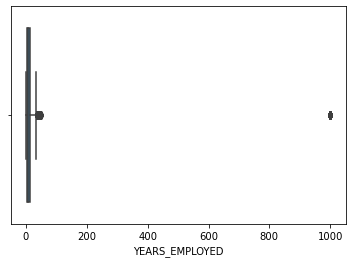

In [86]:
# Checking for outliers in YEARS_EMPLOYED.
sns.boxplot(df1["YEARS_EMPLOYED"])
plt.show()

- This is a outlier as it is a impossible figure and will be dealt accordingly.

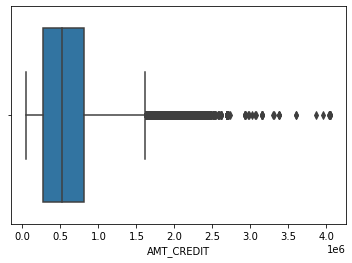

In [87]:
# Checking for ouliers in AMT_CREDIT.
sns.boxplot(df1["AMT_CREDIT"])
plt.show()

- The variable "AMT_CREDIT" has outliers, since it is the total amount of loan a person or business can borrow.

- The loan amount can be higher depending upon the client's repayment credibility, income, age and various other factors.

In [88]:
# Create Bins for "AMT_CREDIT"

bins_range = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]

lab_name = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df1['CREDIT_RANGE']=pd.cut(df1['AMT_CREDIT'],bins=bins_range,labels=lab_name)

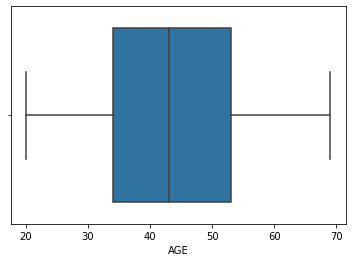

In [89]:
# Checking for outliers in AGE.
sns.boxplot(df1["AGE"])
plt.show()

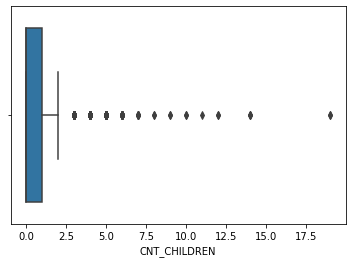

In [90]:
# Checking for outliers in CNT_CHILDREN.
sns.boxplot(df1["CNT_CHILDREN"])
plt.show()

- We can't say for certain that this is a outlier as a client may have many partners hence so many children.

# 5. Handling of incorrect datatypes of columns.

In [91]:
# Checking the datatypes of all columns in df1 dataset.
df1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64


In [92]:
# Checking the datatypes of columns in 'float64'.
list(df1.select_dtypes(include = ['float64']))

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEARS_REGISTRATION']

In [93]:
# Changing the 'float64' datatype of columns to 'int64'.
num_variables = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEARS_REGISTRATION']
df1.loc[:, num_variables] = df1.loc[:, num_variables].apply(lambda x: x.astype('int64', errors = 'ignore'))

In [94]:
# Checking the datatypes of columns in 'object'.
list(df1.select_dtypes(include = ['object']))

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [95]:
# Changing the 'object' datatype of columns to 'string'.
obj_variables = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
df1.loc[:, obj_variables] = df1.loc[:, obj_variables].apply(lambda x: x.astype('str', errors = 'ignore'))

# 6. Inspecting data imbalance.

In [96]:
# Checking 'TARGET' variable for data imbalance
df1["TARGET"].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

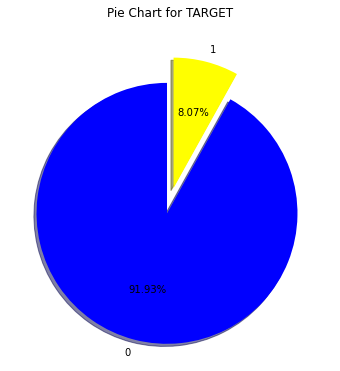

In [97]:
# Pie plot to analyse the 'TARGET' variable.
labels= ['0', '1']
colors=['blue', 'yellow', 'green', 'orange']
plt.figure(figsize=[10,6])
plt.pie(df1["TARGET"].value_counts(normalize=True), labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title("Pie Chart for TARGET\n")
plt.show()

* As we can see that, there is high data imbalance between clients with payment difficulties and the other.

* Approx 92% clients have paid the loan on time while approx 8% of clients faced difficulties in paying the loan on time.

* The ratio of data imbalance for TARGET variable is 91.93 : 8.07

* The data is divided into two parts, Clients with no payment Difficulties (TARGET 0) and Clients with payment Difficulties (TARGET = 1) for further of the analysis.

# Splitting the dataset into two datasets according to "TARGET" Variable.

As there is a high data imbalance in the "TARGET" variable, df1 dataset is splitted into two datasets.

In [98]:
# Clients with no payment Difficulties.
nopay_diff1= df1.loc[df1.TARGET==0]

In [99]:
# Checking the nopay_diff1 dataset.
nopay_diff1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans      Female            N   
2      100004       0    Revolving loans        Male            Y   
3      100006       0         Cash loans      Female            N   
4      100007       0         Cash loans        Male            N   
5      100008       0         Cash loans        Male            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0            270000     1293502        35698   
2               Y             0             67500      135000         6750   
3               Y             0            135000      312682        29686   
4               Y             0            121500      513000        21865   
5               Y             0             99000      490495        27517   

   ...  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
1  ...                           0                         0   
2  ...                           0                         0   
3  ...                           0                         0   
4  ...                           0                         0   
5  ...                           0                         0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR AGE YEARS_EMPLOYED  \
1                       0.0                          0  45              3   
2                       0.0                          0  52              0   
3                       NaN                          1  52              8   
4                       0.0                          0  54              8   
5                       1.0                          1  46              4   

   YEARS_REGISTRATION YEARS_ID_PUBLISH  INCOME_RANGE      CREDIT_RANGE  
1                   3                0          HIGH  900000 and above  
2                  11                6      VERY_LOW          0-150000  
3                  26                6           LOW     300000-350000  
4                  11                9           LOW     500000-550000  
5                  13                1      VERY_LOW     450000-500000  

[5 rows x 49 columns]

In [100]:
# Clients with Payment Difficulties.
pay_diff1 = df1.loc[df1.TARGET==1]

In [101]:
# Checking the pay_diff1 dataset.
pay_diff1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans        Male            N   
26      100031       1         Cash loans      Female            N   
40      100047       1         Cash loans        Male            N   
42      100049       1         Cash loans      Female            N   
81      100096       1         Cash loans      Female            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0            202500      406597        24700   
26               Y             0            112500      979992        27076   
40               Y             0            202500     1193580        35028   
42               N             0            135000      288873        16258   
81               Y             0             81000      252000        14593   

    ...  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0   ...                           0                         0   
26  ...                           0                         0   
40  ...                           0                         2   
42  ...                           0                         0   
81  ...                           0                         0   

   AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR AGE YEARS_EMPLOYED  \
0                        0.0                          1  25              1   
26                       2.0                          2  51              7   
40                       0.0                          4  47              3   
42                       0.0                          2  36              9   
81                       0.0                          0  67           1000   

    YEARS_REGISTRATION YEARS_ID_PUBLISH  INCOME_RANGE      CREDIT_RANGE  
0                    9                5        MEDIUM     400000-450000  
26                  18                5      VERY_LOW  900000 and above  
40                   3                2        MEDIUM  900000 and above  
42                   0               12           LOW     250000-300000  
81                  14               11      VERY_LOW     250000-300000  

[5 rows x 49 columns]

# 7. Data Analysis.

Data Analysis for datasets nopay_diff1 (Clients with "No Payment difficulties") and pay_diff1 (Clients with "Payment difficulties")

# 7.1. Univariate Analysis.

In [102]:
# Univariate Analysis of Numerical Variables
sns.set_style('whitegrid')

def plot_attr(var_1):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,5])

# Distribution plot for Variable  for Clients with "No Payment difficulties"
    plt.subplot(1,2,1)

    sns.distplot(nopay_diff1[var_1], color='Blue', kde=True, bins=5)

# Labelling
    plt.title(f'{var_1}: Clients with No Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_1, fontsize = 10, fontweight=1.5)
    
# Distribution plot for Variable  for Clients with "Payment difficulties"
    plt.subplot(1,2,2)

    sns.distplot(pay_diff1[var_1], color='Red', kde=True, bins=5)

# Labelling
    plt.title(f'{var_1}: Clients with Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_1, fontsize = 10, fontweight=1.5)



    plt.show()

- Analysing "AMT_INCOME_TOTAL" variable

    AMT_INCOME_TOTAL :- Income of the client

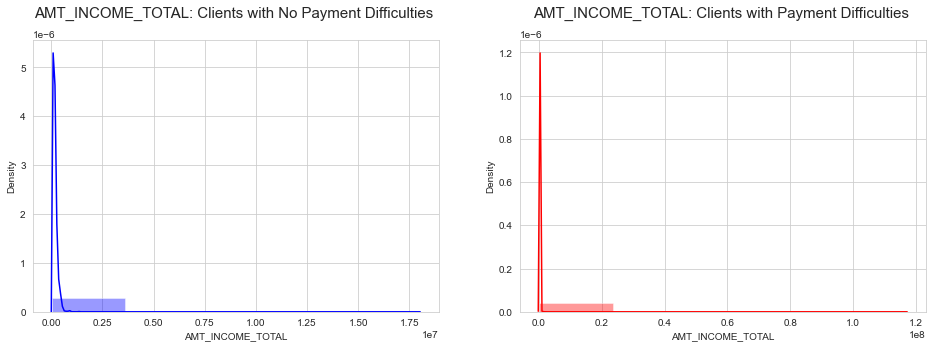

In [103]:
plot_attr("AMT_INCOME_TOTAL")

- The income of Clients with Payment Difficulties is mostly till the range 25 lakhs approx, it's slightly above 30 lakhs for Clients with no Payment Difficulties.

- Analysing "AGE" variable

     AGE :- Client's age in years at the time of application

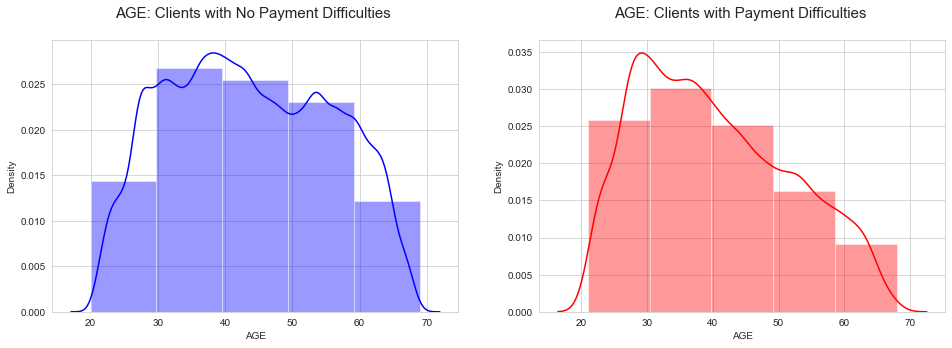

In [104]:
plot_attr("AGE")

* Majority of the clients with payment difficulties are between the age of 25 -45 and then decreases.
* For clients with no payment difficulties, the peak is high between age 25 -50 and then decreases.

* Analysing "AMT_CREDIT" variable

    AMT_CREDIT :- Credit amount of the loan

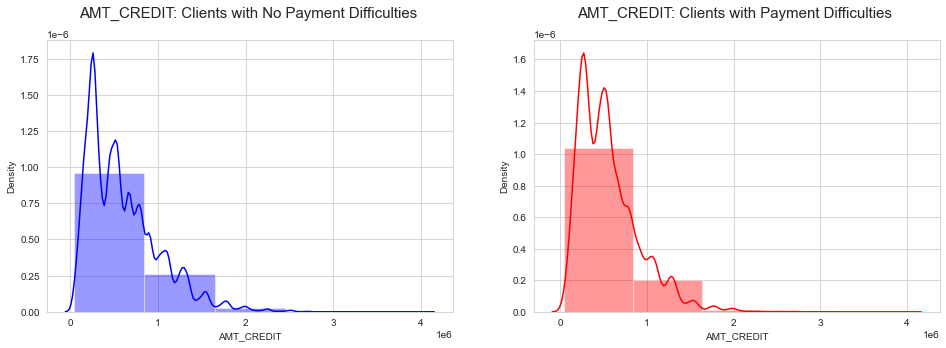

In [105]:
plot_attr("AMT_CREDIT")

* Most of the credit amount is below 10 lakhs for Clients with No Payment Difficulties while for Clients with Payment Difficulties is also below 10 lakhs.

* Analysing "AMT_ANNUITY" variable

     AMT_ANNUITY :- Loan annuity is the monthly payment that client will pay to repay credit loan.

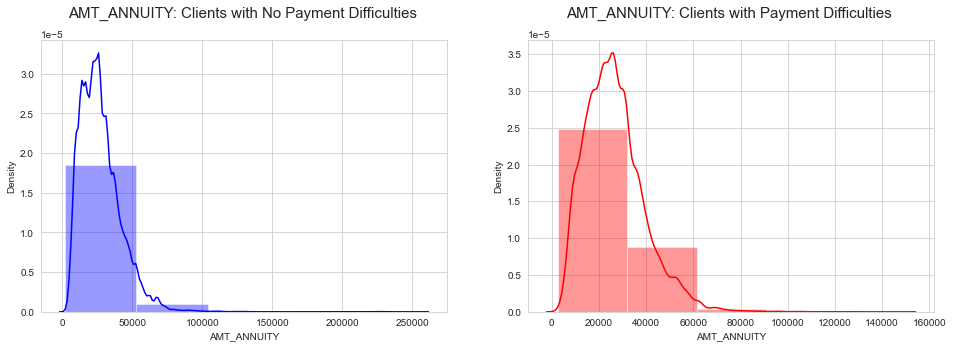

In [106]:
plot_attr("AMT_ANNUITY")

* The maximum annuity range for clients with payment difficulties is between 10000 to 40000 and then it starts falling.
* The maximum annuity range for clients with no payment difficulties is between 10000 to 50000 and then it starts falling.

* Analysing "AMT_GOODS_PRICE" variable

    AMT_GOODS_PRICE :- For consumer loans it is the price of the goods for which the loan is given.

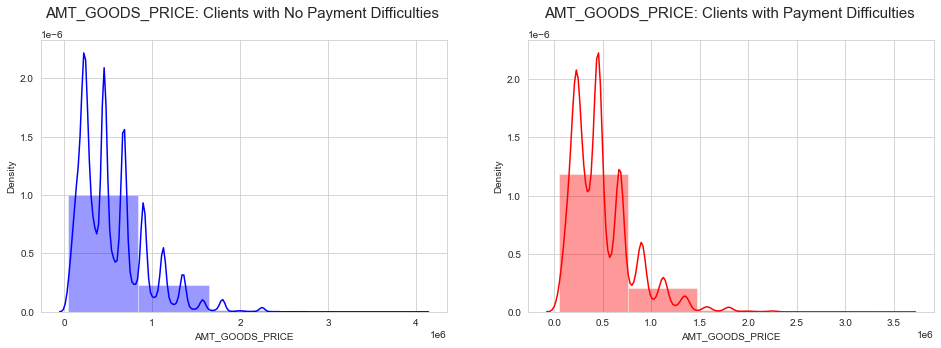

In [107]:
plot_attr("AMT_GOODS_PRICE")

- Generally loans have been applied for less expensive goods.

- Analysing "CNT_CHILDREN" variable

    CNT_CHILDREN :- Number of children the client has.

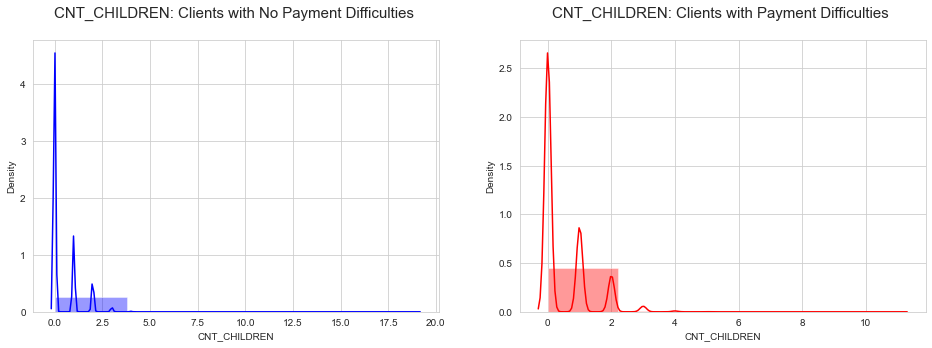

In [108]:
plot_attr("CNT_CHILDREN")

- Majority of clients have between 0-2 kids for Clients with no payment difficulties.
- Majority of clients also have 0-2 kids for Clients with payment difficulties.

- Analysing "CNT_FAM_MEMBERS" variable

     CNT_FAM_MEMBERS :- How many family members does client have.

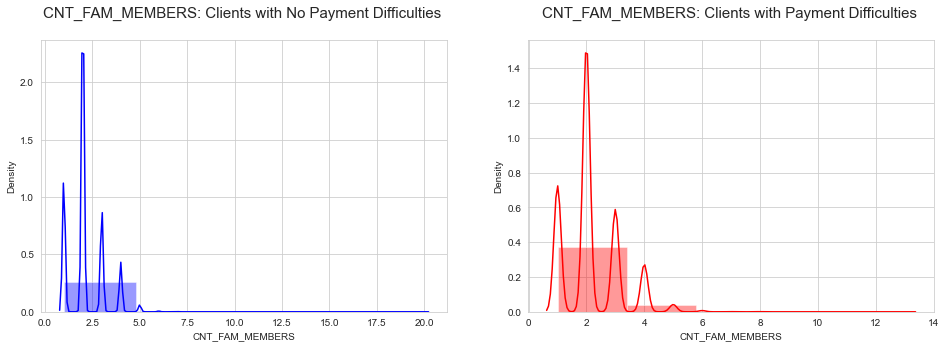

In [109]:
plot_attr("CNT_FAM_MEMBERS")

- Clients with no payment difficulties have family members in range between 1-5 with a majority of 2 family members.
- Clients with payment difficulties have family members in range between 1-6 with a majority of 2 family members.

- Analysing "YEARS_EMPLOYED" variable
     
     YEARS_EMPLOYED :- How many years before the application the person started current employment

      Assumption :- Corrected view of the distribution with feasible employment years.

In [110]:
# Clients with "No Payment difficulties".
YEARS_EMPLOYED_cor_0 = nopay_diff1[nopay_diff1.YEARS_EMPLOYED <70]

# Clients with "Payment difficulties".

YEARS_EMPLOYED_cor_1 = pay_diff1[pay_diff1.YEARS_EMPLOYED <70]

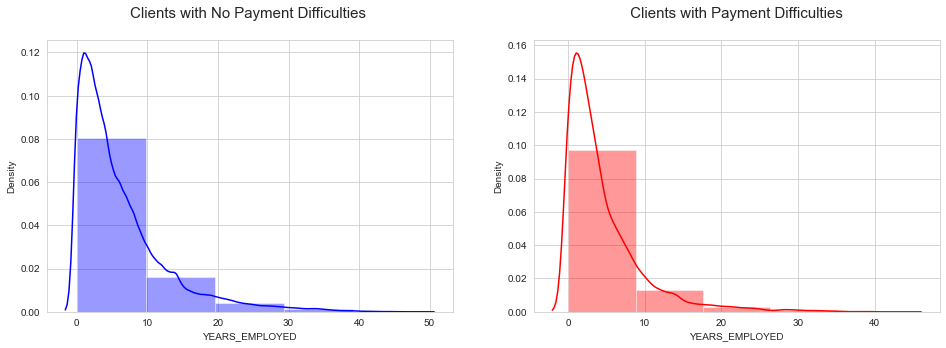

In [111]:
# Plotting distplot.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,5])
sns.set_style('whitegrid')

# Distribution plot for Variable  for Clients with "No Payment difficulties"

plt.subplot(1,2,1)

sns.distplot(YEARS_EMPLOYED_cor_0["YEARS_EMPLOYED"], color='Blue', kde=True, bins=5)

# Labelling
plt.title(f'Clients with No Payment Difficulties \n', fontsize=15, fontweight=3)
plt.xlabel("YEARS_EMPLOYED", fontsize = 10, fontweight=1.5)
   


# Distribution plot for Variable  for Clients with "Payment difficulties"
plt.subplot(1,2,2)

sns.distplot(YEARS_EMPLOYED_cor_1["YEARS_EMPLOYED"], color='Red', kde=True, bins=5)

# Labelling
plt.title(f' Clients with Payment Difficulties \n', fontsize=15, fontweight=3)
plt.xlabel("YEARS_EMPLOYED", fontsize = 10, fontweight=1.5)

plt.show()

* For both clients with or without Payment difficulties, the peak number of applicants are working with the current                organization for less than 5 years of employment and drops considerably after that.

# Univariate Analysis of Categorical Variables

     - Univariate Analysis :- Clients with "No Payment difficulties" vs Clients with "Payment difficulties"

In [112]:
# Univariate analysis of categorical columns.
sns.set_style('whitegrid')

def plot_catgr(var_2):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey =True, figsize=[18,7])

# Count plot for Variable  for Clients with No Payment Difficulties
    plt.subplot(1,2,1)

    sns.countplot(x=var_2, data = nopay_diff1)

# Labelling
    plt.title(f'{var_2}: Clients with No Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 0, size = 15)
    plt.yticks(rotation = 0, size = 15)
    

# Count plot for Variable  for Clients with Payment Difficulties
    plt.subplot(1,2,2)

    sns.countplot(x=var_2, data = pay_diff1)

# Labelling
    plt.title(f'{var_2}: Clients with Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 0, size = 15)
    plt.yticks(rotation = 0, size = 15)

    
    plt.show()

- Analysing "NAME_CONTRACT_TYPE" variable

     NAME_CONTRACT_TYPE :- To identify loan is cash or revolving.

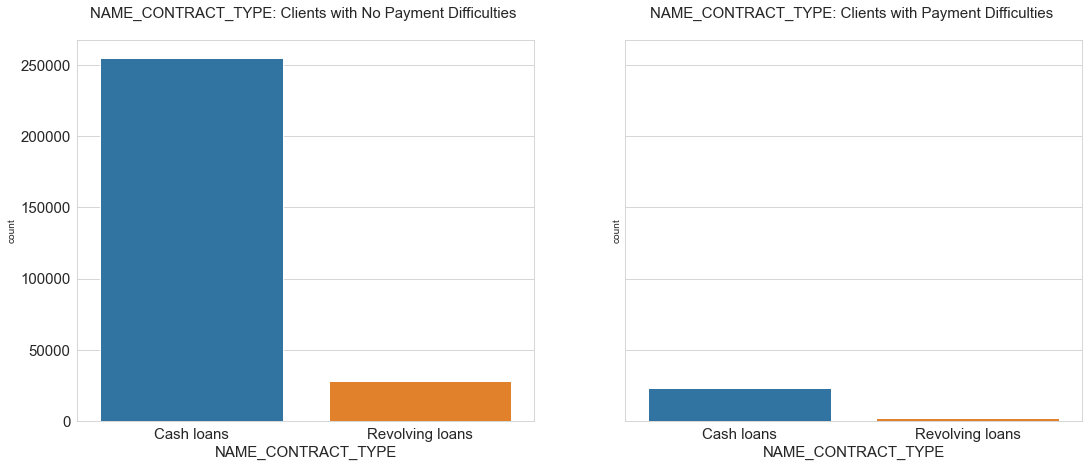

In [113]:
plot_catgr("NAME_CONTRACT_TYPE")

- Cash loans overall are more popular than the revolving loans.

- While resolving loans have a relatively higher number of defaulters.

- Analysing "CODE_GENDER" variable

    CODE_GENDER :- Gender of the client.

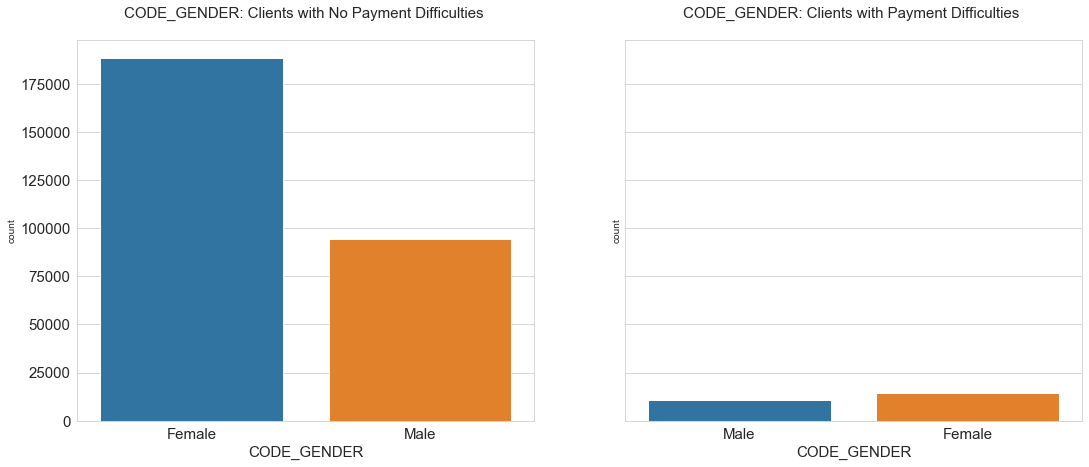

In [114]:
plot_catgr("CODE_GENDER")

- Females are paying credit on time and at the same time they are defaulting on loans.
- But percentage of males defaulting are higher than females.

- Analysing "FLAG_OWN_CAR" variable

     FLAG_OWN_CAR :-If the client owns a car.

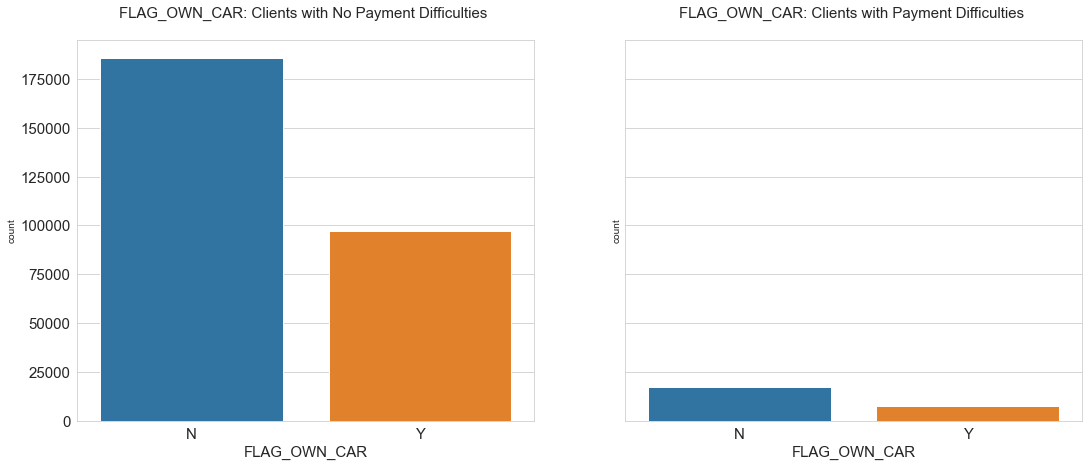

In [115]:
plot_catgr("FLAG_OWN_CAR")

- The client without owning a car have defaulted more than those who have cars.

- Analysing "FLAG_OWN_REALTY" variable
 
   FLAG_OWN_REALTY :- If client owns a house or flat.

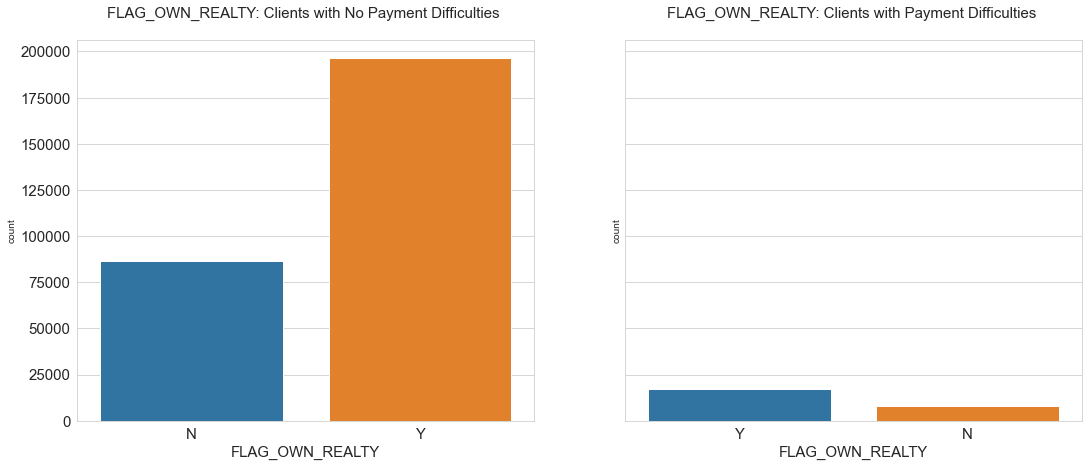

In [116]:
plot_catgr("FLAG_OWN_REALTY")

- Number of the clients with payment difficulties already own some kind of realty and this could mean that they might have some existing loans on that own_realty.

- Analysing "NAME_INCOME_TYPE" variable

    NAME_INCOME_TYPE :- Clients income type .

In [117]:

sns.set_style('whitegrid')

def plot_catg(var_2):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=[18,8])

# Count plot for Variable  for Clients with No Payment Difficulties
    plt.subplot(1,2,1)

    sns.countplot(var_2, data = nopay_diff1)

# Labelling
    plt.title(f'{var_2}: Clients with No Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 90, size = 15)
    plt.yticks(rotation = 0, size = 15)
    

# Count plot for Variable  for Clients with Payment Difficulties
    plt.subplot(1,2,2)

    sns.countplot(var_2, data = pay_diff1)

# Labelling
    plt.title(f'{var_2}: Clients with Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 90, size = 15)
    plt.yticks(rotation = 0, size = 15)

    plt.show()

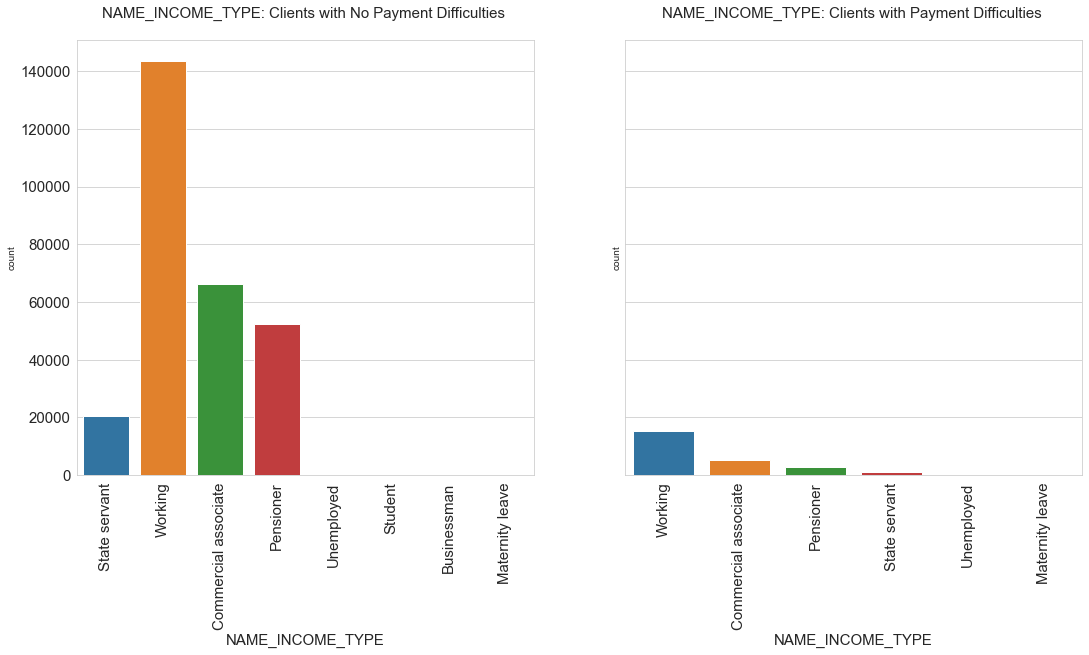

In [118]:
plot_catg("NAME_INCOME_TYPE")

- Majority of the defaulter applicants are from ‘Working’ income type, followed by Commercial associate and pensioners.
- But percentage of defaulters is very high among state servant.
- Also, for non-defaulter's the applicants are same like defaulter's. They are from ‘Working’ income type, followed by Commercial associate and pensioners.

- Analysing "NAME_EDUCATION_TYPE" variable

    NAME_EDUCATION_TYPE :- Level of highest education the client achieved.

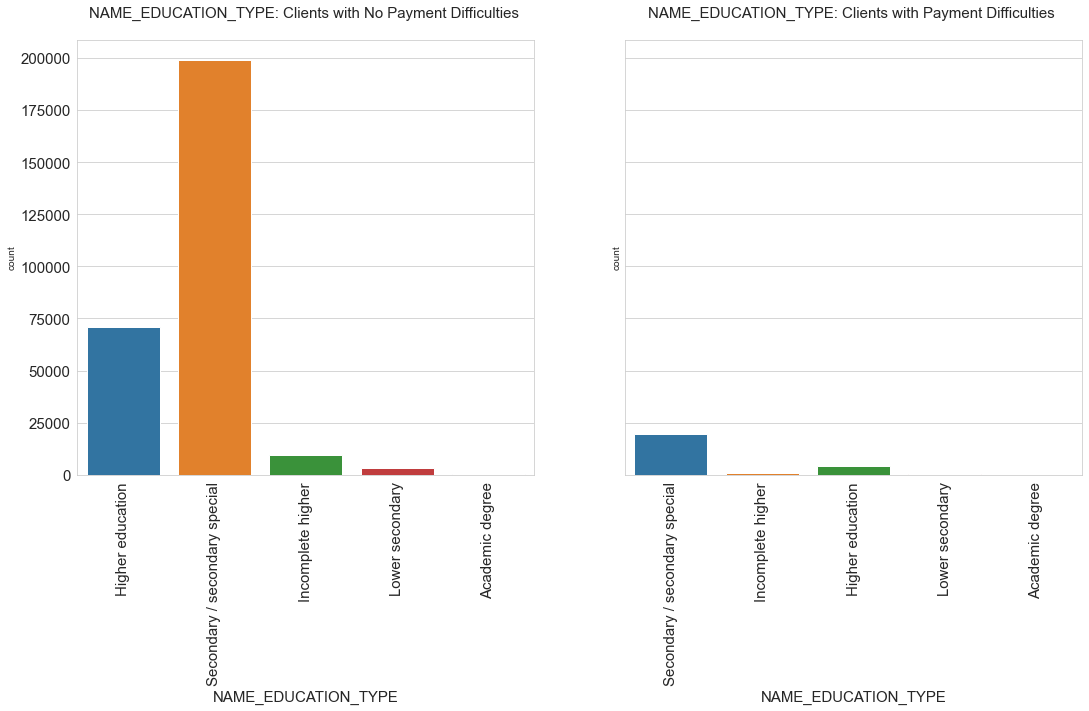

In [119]:
plot_catg("NAME_EDUCATION_TYPE")

- Secondary/ Secondary special education have the highest count in non-defaulters as well as in defaulters.

- Analysing "OCCUPATION_TYPE" variable

    OCCUPATION_TYPE :- The kind of occupation does the client have.

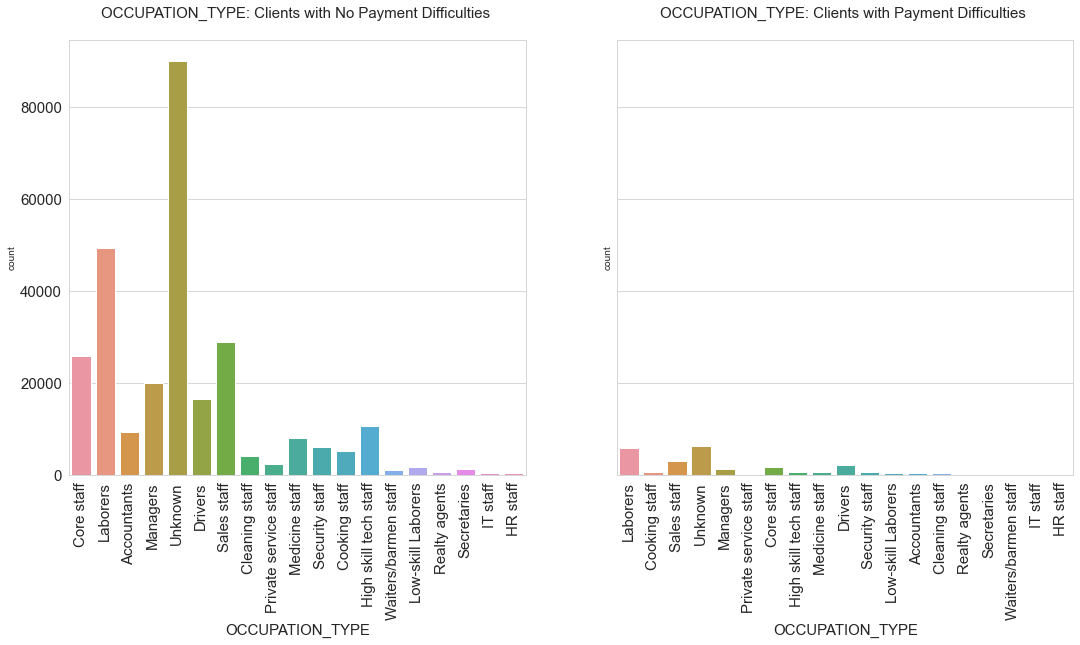

In [120]:
plot_catg("OCCUPATION_TYPE")

- A big portion of the client's occupation is form of Laborers,Unknown, Sales Staff and core staff.
- Most of the defaulters are from Laborers and Unknown occupation type.

- Analysing "ORGANIZATION_TYPE" variable
 
    ORGANIZATION_TYPE :- Type of organization where client works.

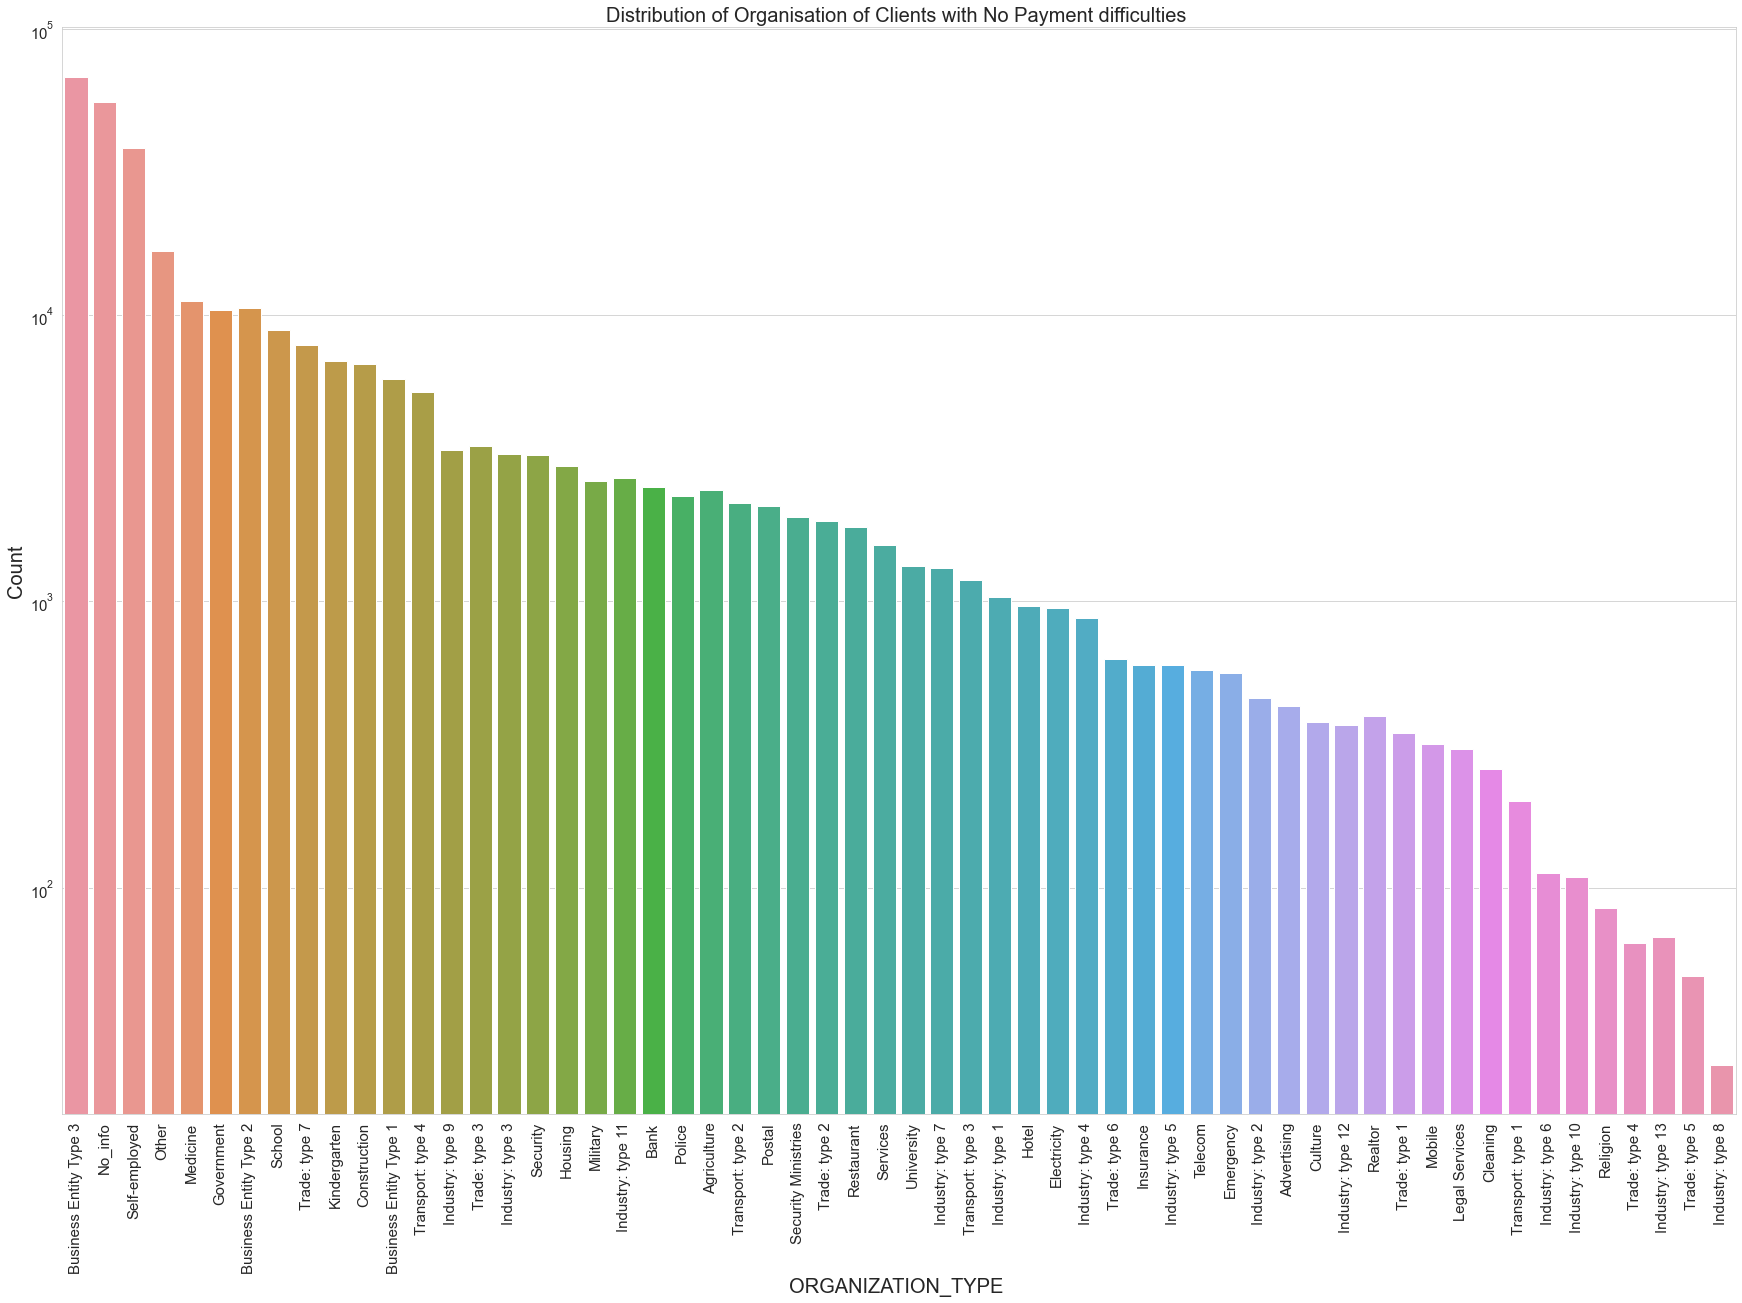

In [121]:
# Countplot for Clients with No Payment difficulties.
plt.figure(figsize=[30,20])


sns.countplot(x = 'ORGANIZATION_TYPE', order=nopay_diff1['ORGANIZATION_TYPE'].value_counts().index,data = df1)
plt.xlabel('ORGANIZATION_TYPE ' , size = 20)
plt.ylabel('Count' , size =20)
plt.xticks(rotation=90, size = 15)
plt.yticks(size = 15)

plt.title( "Distribution of Organisation of Clients with No Payment difficulties ",size = 20)
plt.yscale('log')

plt.show()

- For Clients with No Payment difficulties, business entity type 3 have applied for loan the highest count as compared to others.

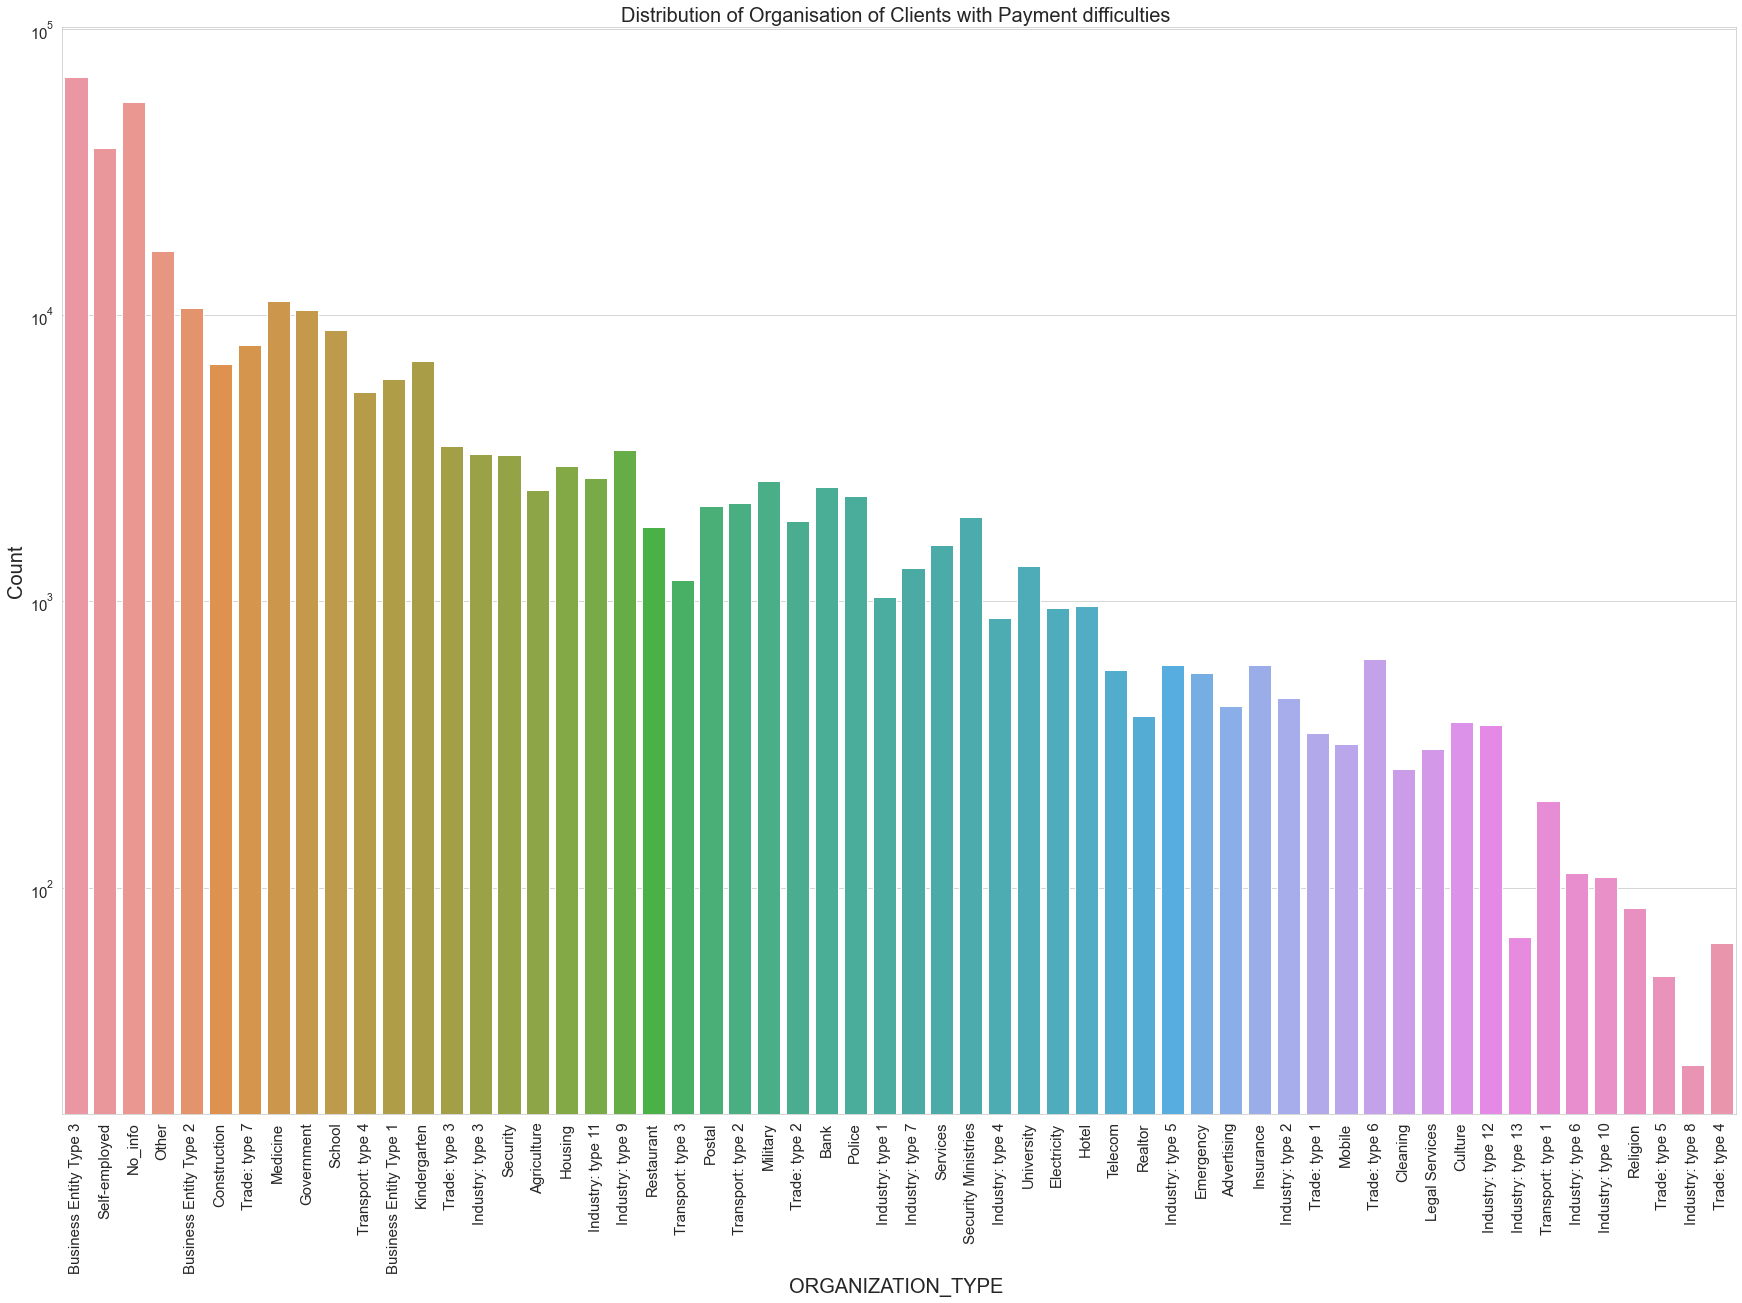

In [122]:
# Countplot for Clients with Payment difficulties.
plt.figure(figsize=[30,20])

sns.countplot(x = 'ORGANIZATION_TYPE', order=pay_diff1['ORGANIZATION_TYPE'].value_counts().index,data = df1)
plt.xlabel('ORGANIZATION_TYPE ' , size = 20)
plt.ylabel('Count' , size =20)
plt.xticks(rotation=90, size = 15)
plt.yticks(size = 15)

plt.title( "Distribution of Organisation of Clients with Payment difficulties ",size = 20)
plt.yscale('log')

plt.show()

- For Clients with Payment difficulties, business entity type 3 have applied for loan the highest count as compared to others.

# 7.2. Bivariate Analysis.

  -Bivariate Analysis :- Clients with "No Payment difficulties" vs Clients with "Payment difficulties".

- Numerical vs Numerical Variables.

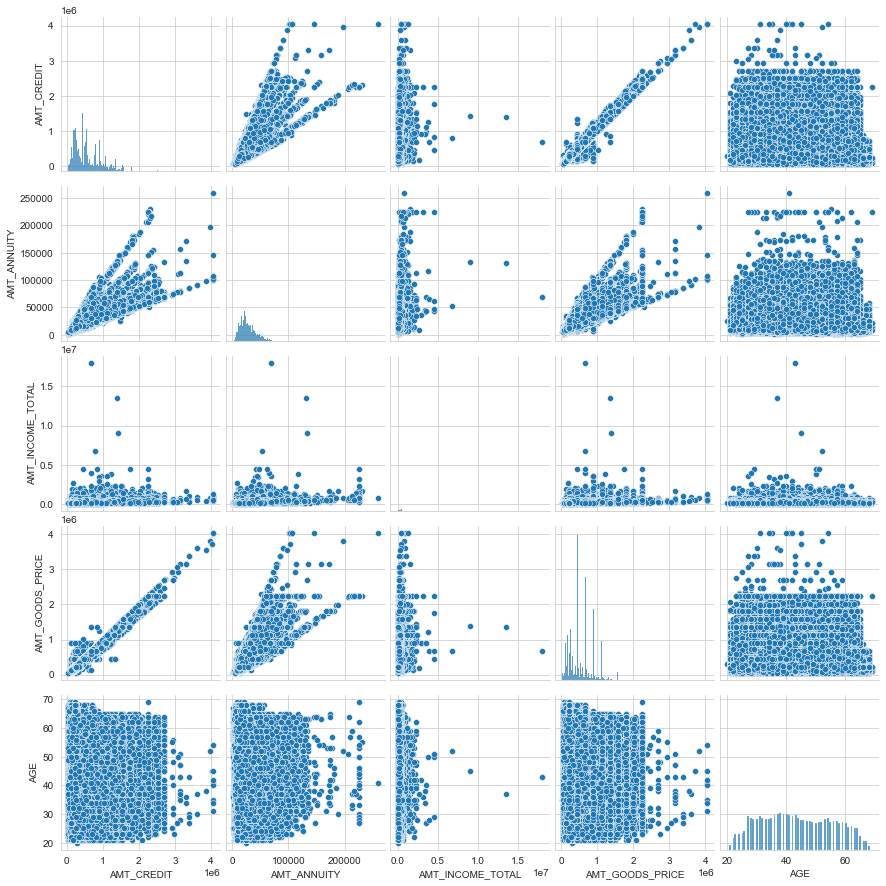

In [123]:
# Pairplot for Clients with No Payment Difficulties - nopay_diff1.
sns.set_style('whitegrid')

sns.pairplot(data = nopay_diff1, vars=["AMT_CREDIT","AMT_ANNUITY","AMT_INCOME_TOTAL","AMT_GOODS_PRICE","AGE"])

plt.show()

- Clients with No Payment Difficulties - nopay_diff1

- AMT_GOODS_PRICE and AMT_CREDIT have a strong linear relationship.
- Age and AMT_CREDIT, they are very scattered and hence they don't have strong relation with each other.
- AMT_CREDIT and AMT_ANNUITY have a strong linear relation.

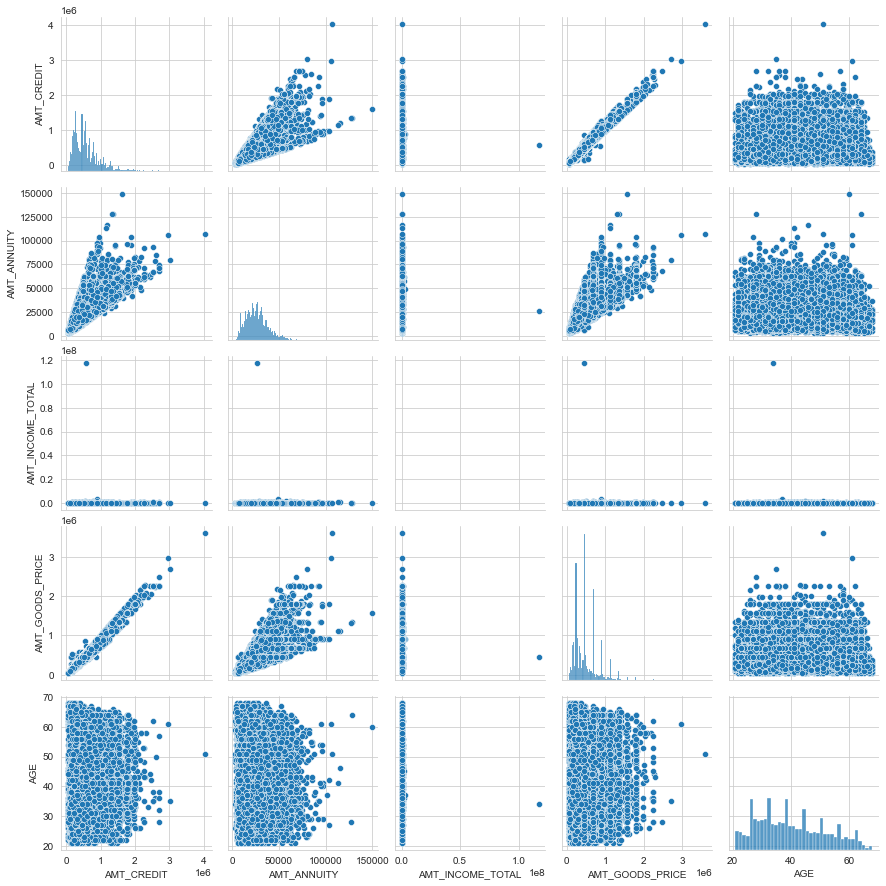

In [124]:
# Pairplot for Clients with Payment Difficulties - pay_diff1
sns.set_style('whitegrid')

sns.pairplot(data = pay_diff1, vars=["AMT_CREDIT","AMT_ANNUITY","AMT_INCOME_TOTAL","AMT_GOODS_PRICE","AGE"])
plt.show()

- Clients with Payment Difficulties - pay_diff1

-    AMT_CREDIT and AMT_INCOME_TOTAL have no relationship with each other.
-    AMT_GOODS_PRICE and AMT_CREDIT have strong linear relationship with each other.

- CNT_FAM_MEMBERS vs CNT_CHILDREN

     CNT_FAM_MEMBERS :- How many family members does client have.

     CNT_CHILDREN :- Number of children the client has.

In [125]:
# Bivariate analysis.

sns.set_style("darkgrid")
def plot_num(var_1, var_2):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,7])

# Scatter plot for Variable  for Clients with No Payment Difficulties
    plt.subplot(1,2,1)

    sns.scatterplot(x = var_1, y = var_2, data = nopay_diff1)

# Labelling
    plt.title(f'{var_1} vs {var_2}: Clients with No Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_1, fontsize = 10, fontweight=1.5)
    plt.ylabel(var_2, fontsize = 10, fontweight=1.5)
    plt.xticks(rotation = 90)


# Scatter plot for Variable  for Clients with Payment Difficulties
    plt.subplot(1,2,2)

    sns.scatterplot(x = var_1, y = var_2, data = pay_diff1)

# Labelling
    plt.title(f'{var_1} vs {var_2}: Clients with Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_1, fontsize = 10, fontweight=1.5)
    plt.ylabel(var_2, fontsize = 10, fontweight=1.5)
    plt.xticks(rotation = 90)

    plt.show()

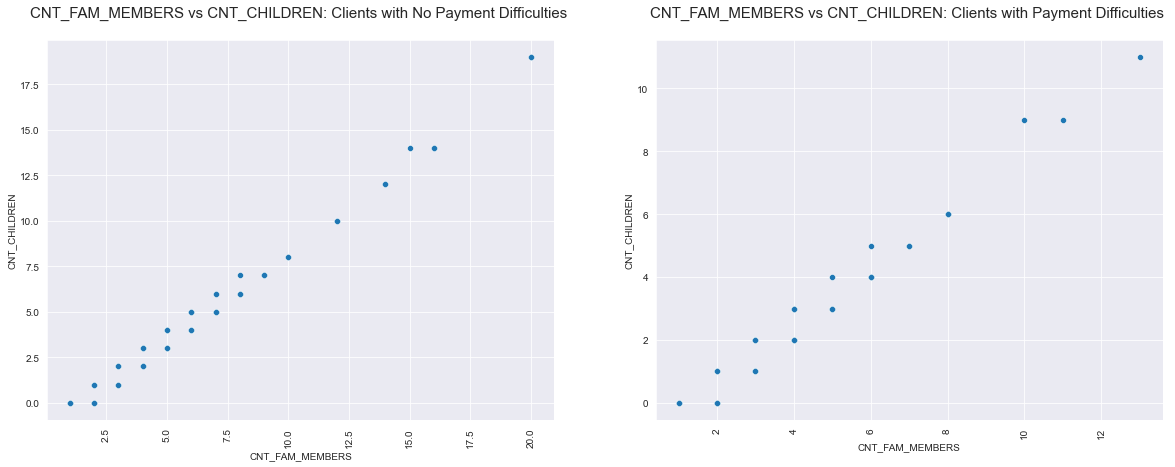

In [126]:
plot_num("CNT_FAM_MEMBERS","CNT_CHILDREN")

- CNT_FAM_MEMBERS and CNT_CHILDREN have positive strong relationship with each other.
- Also, there are outliers.

# Categorical vs Numerical Variables

In [127]:
# Bivariate Analysis

def plot_num_cat_0(var_1, var_2):
    plt.figure(figsize=[20,7])

# Bar plot for Variable  for Clients with No Payment Difficulties
    sns.barplot(x = var_2, y = var_1 ,data = nopay_diff1)
               

# Labelling
    plt.title(f'{var_1} vs {var_2} \n', fontsize=20, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.ylabel(var_1, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 0, size =15)
    
    
    plt.show()

In [128]:
# Bivariate Analysis 

def plot_num_cat_1(var_1, var_2):
    plt.figure(figsize=[20,7])

# Bar plot for Variable  for Clients with Payment Difficulties
    sns.barplot(x = var_2, y = var_1 ,data = pay_diff1)

# Labelling
    plt.title(f'{var_1} vs {var_2} \n', fontsize=20, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.ylabel(var_1, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 0, size =15)
    
    
    plt.show()

- AMT_CREDIT vs NAME_CONTRACT_TYPE

    - AMT_CREDIT :- Credit amount of the loan.

   -  NAME_CONTRACT_TYPE :- Identification if loan is cash or revolving.

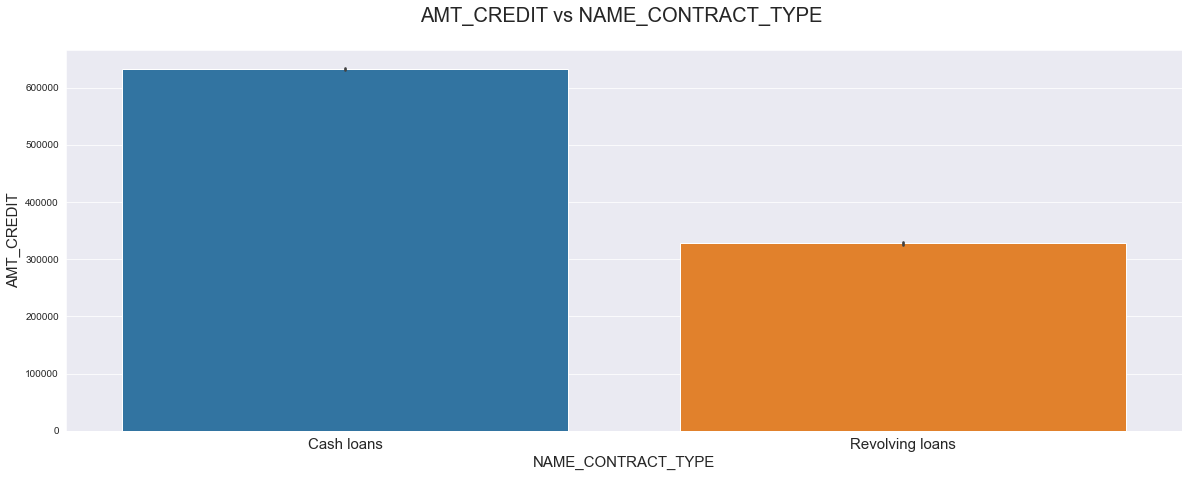

In [129]:
plot_num_cat_0("AMT_CREDIT","NAME_CONTRACT_TYPE")

-  Clients with no Payment Difficulties, clients opting for cash loans have high credit amount.

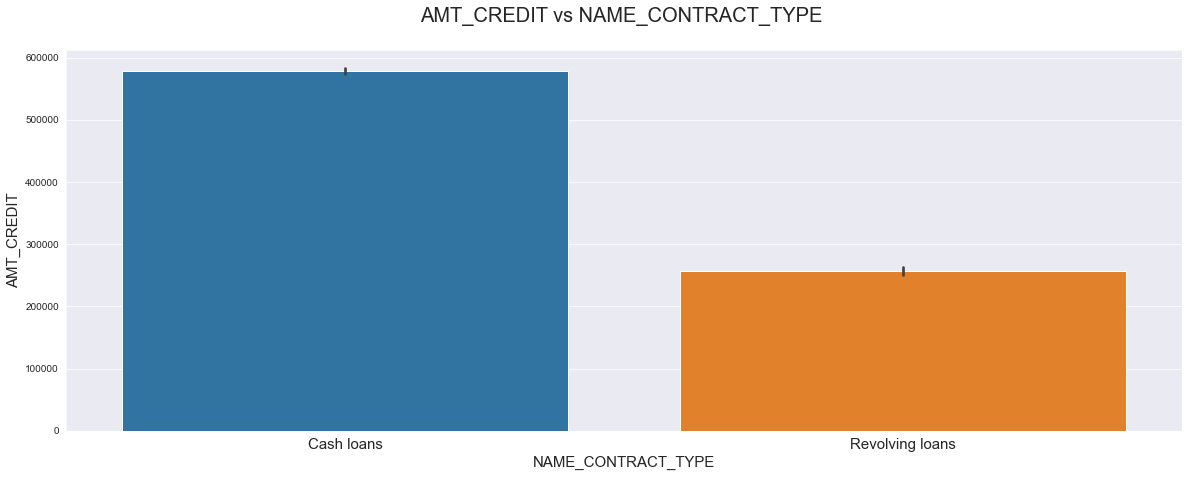

In [130]:
plot_num_cat_1("AMT_CREDIT","NAME_CONTRACT_TYPE")

- Clients with Payment Difficulties, clients opting for cash loans have high credit amount.

- AGE vs CODE_GENDER

     AGE :- Client's age in years at the time of application.

     CODE_GENDER :- Gender of the client.

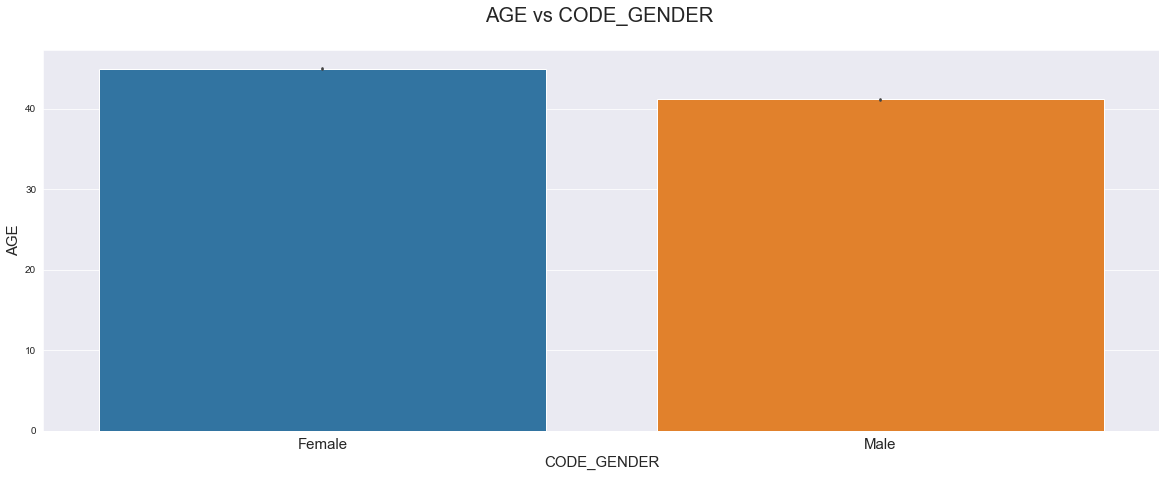

In [131]:
plot_num_cat_0("AGE","CODE_GENDER")

- In case of Clients with No Payment Difficulties, the females age is slightly more than males.

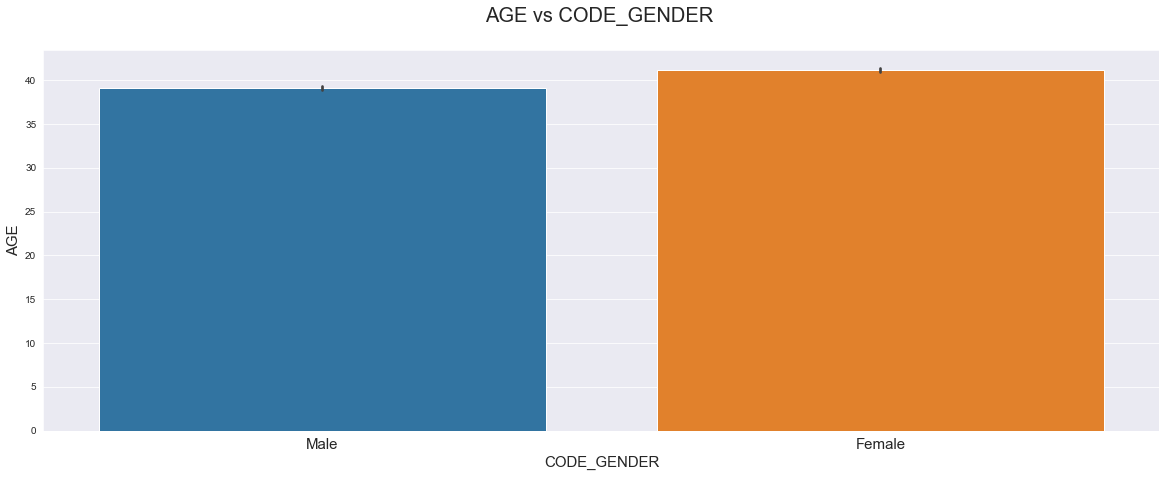

In [132]:
plot_num_cat_1("AGE","CODE_GENDER")

- In case of Clients with Payment Difficulties, the females are slightly more in number than males.

- AGE vs NAME_INCOME_TYPE

    AGE :- Client's age in years at the time of application.

    NAME_INCOME_TYPE :- Client's income type.

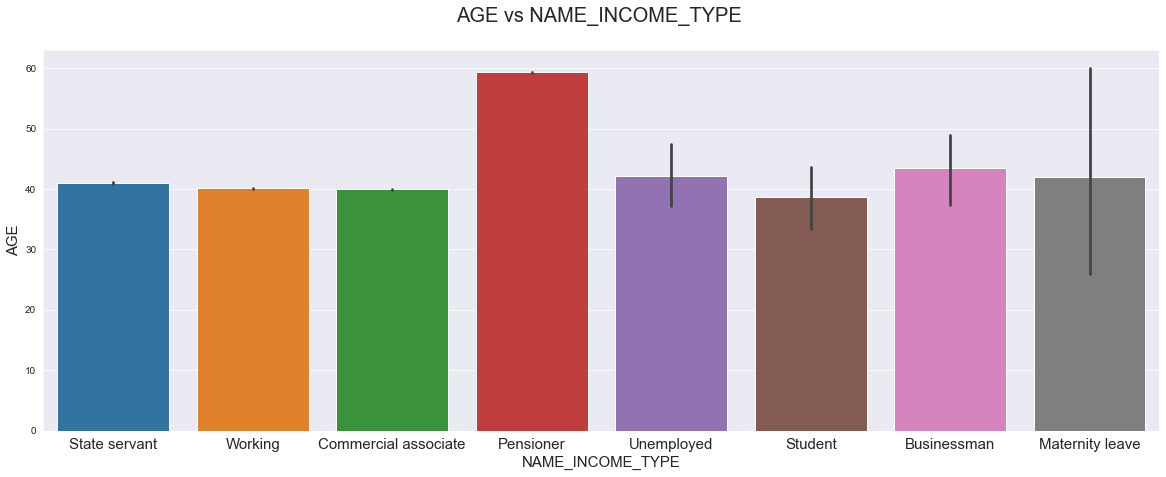

In [133]:
plot_num_cat_0("AGE","NAME_INCOME_TYPE")

- In case of Clients with No Payment Difficulties, age of pensioners are quite high  in number which is normal followed by businessman.

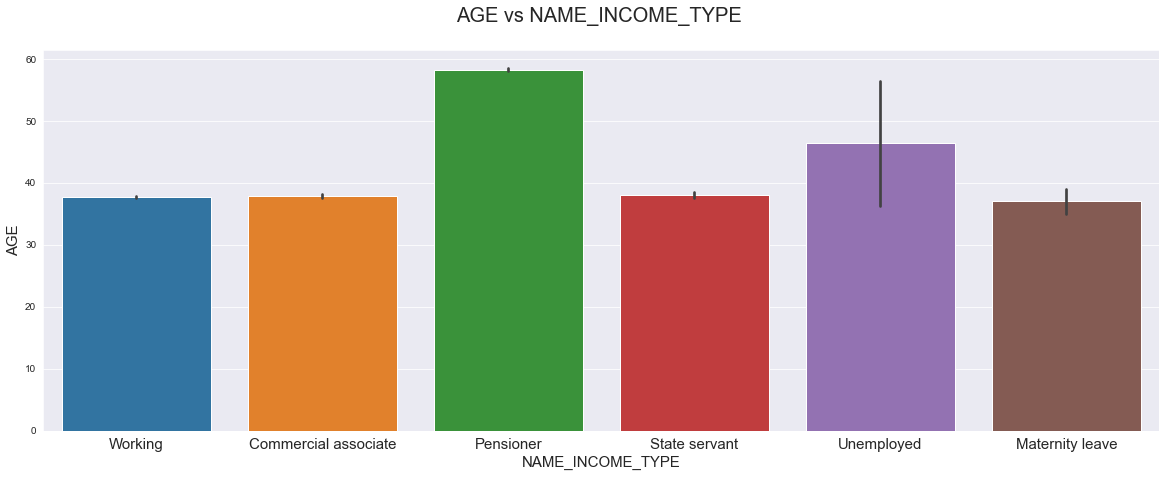

In [134]:
plot_num_cat_1("AGE","NAME_INCOME_TYPE")

- In case of Clients with Payment Difficulties, age of pensioners are quite high in number followed by unemployed.
- This is serious issue as both pensioners and unemployed clients can pose a threat to company due to their low income.

- AMT_ANNUITY vs NAME_EDUCATION_TYPE

     AMT_ANNUITY :- Loan annuity.

     NAME_EDUCATION_TYPE :- Level of highest education the client achieved.

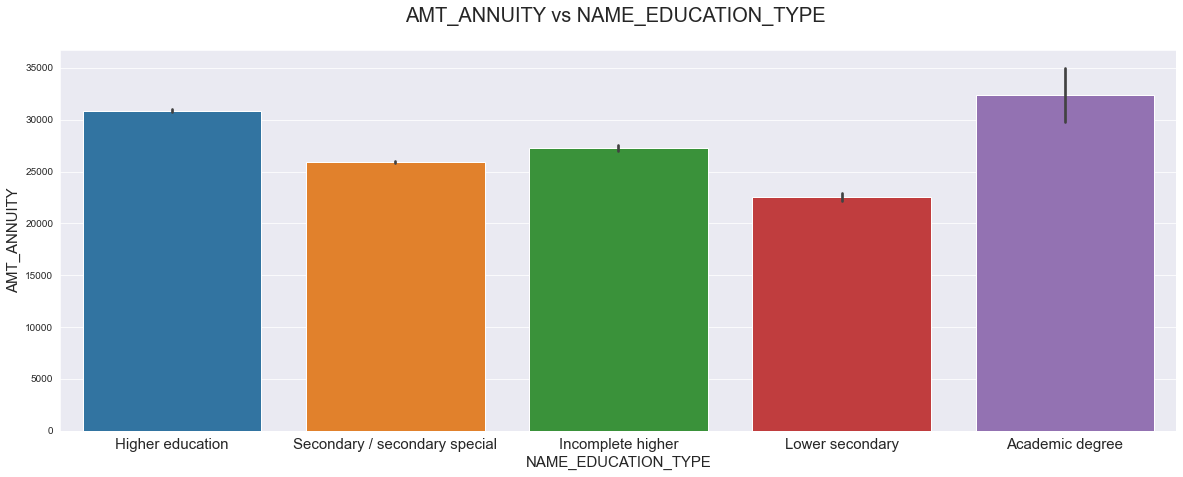

In [135]:
plot_num_cat_0("AMT_ANNUITY","NAME_EDUCATION_TYPE")

- In case of Clients with No Payment Difficulties, clients with academic degree can pay highest monthly annuity compared to others.

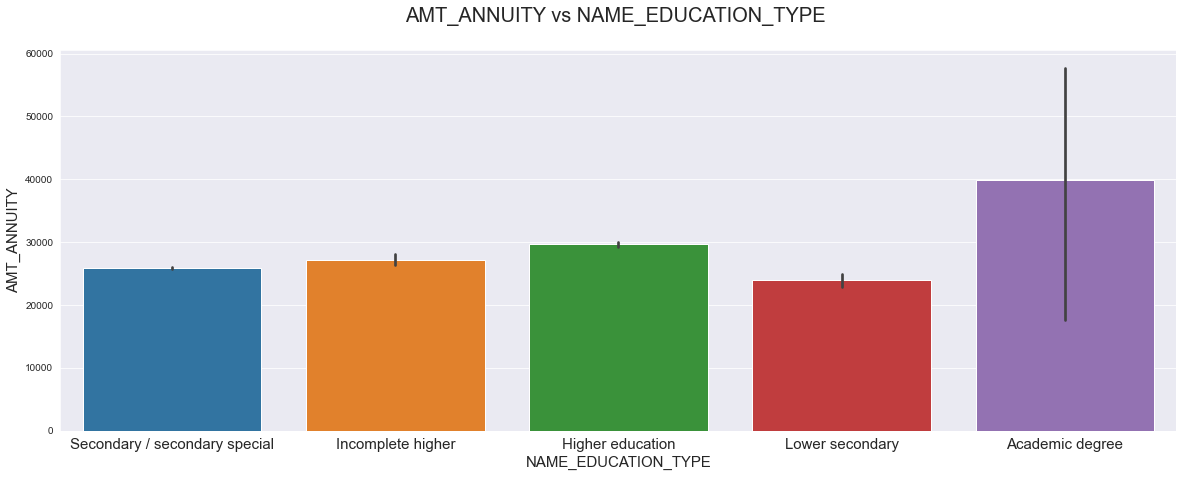

In [136]:
plot_num_cat_1("AMT_ANNUITY","NAME_EDUCATION_TYPE")

- In case of Clients with Payment Difficulties, clients with academic degree have to pay high monthly annuity compared to others.

- AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE

      AMT_INCOME_TOTAL :- Income of the client.

       NAME_EDUCATION_TYPE :- Level of highest education the client achieved.

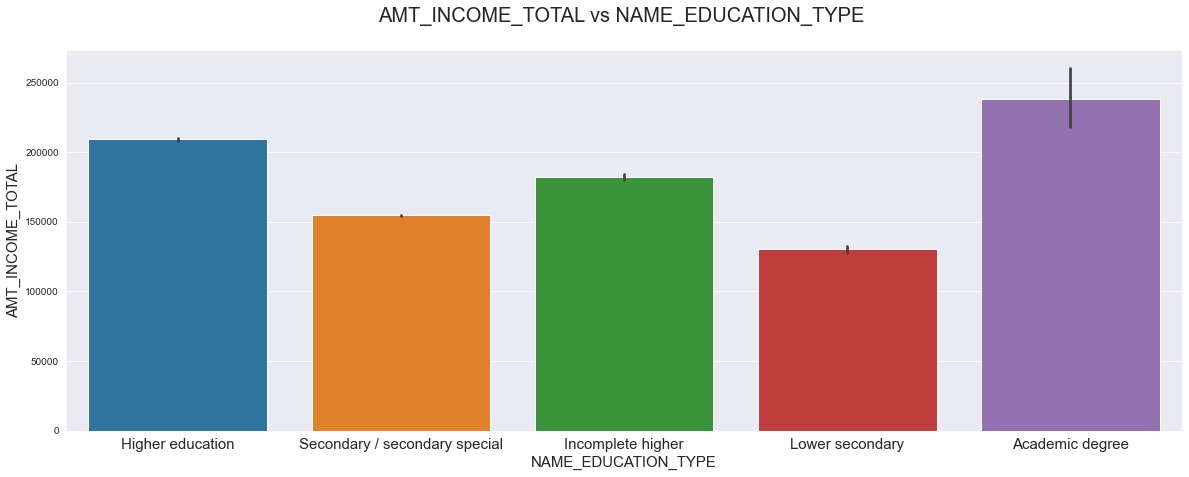

In [137]:
plot_num_cat_0("AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE")

- In case of Clients with No Payment Difficulties, clients with academic degree have high annual income followed by higher education clients.

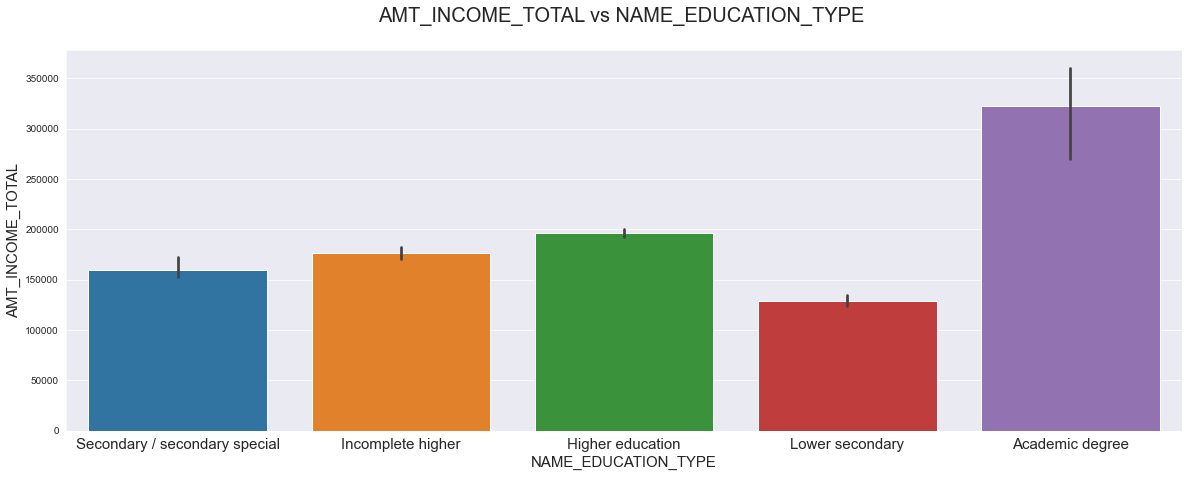

In [138]:
plot_num_cat_1("AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE")

- In case of Clients with Payment Difficulties, clients with academic degree have high income.

# Categorical vs Categorical Variables

- INCOME_RANGE vs NAME_EDUCATION_TYPE
  
       INCOME_RANGE :- Income of the client.

        CODE_GENDER :- Gender of the client.

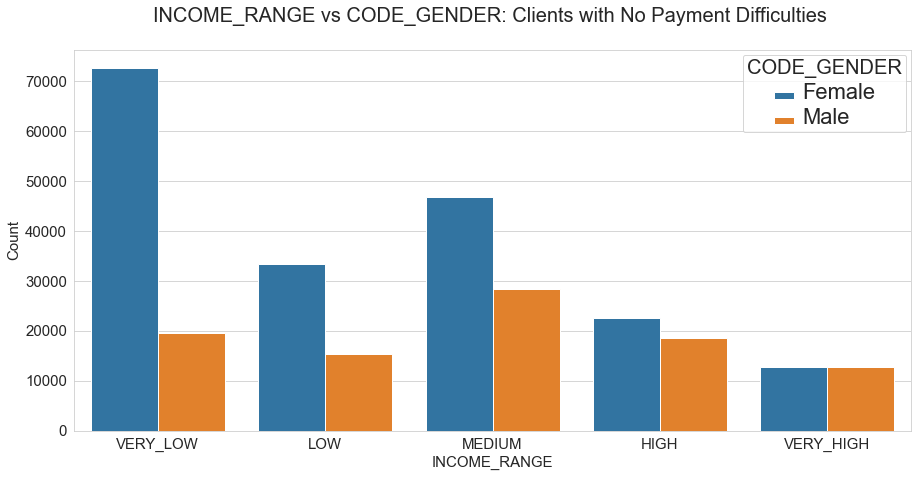

In [139]:
# Count plot for INCOME_RANGE vs CODE_GENDER for Clients with No Payment Difficulties
sns.set_style('whitegrid')

plt.figure(figsize=(15,7))

ax = sns.countplot(x = 'INCOME_RANGE', hue = 'CODE_GENDER' ,data = nopay_diff1)

# Labelling
plt.title(f'INCOME_RANGE vs CODE_GENDER: Clients with No Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=0, size = 15)
plt.xlabel('INCOME_RANGE' , size = 15)
plt.ylabel('Count' , size =15)



plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.show()

- Clients with No Payment Difficulties, the count of females in the very_low income category is very high than males.
- While in the very_high income_range, females and males are equal. Whereas in all other cases, the count of females are more than males.

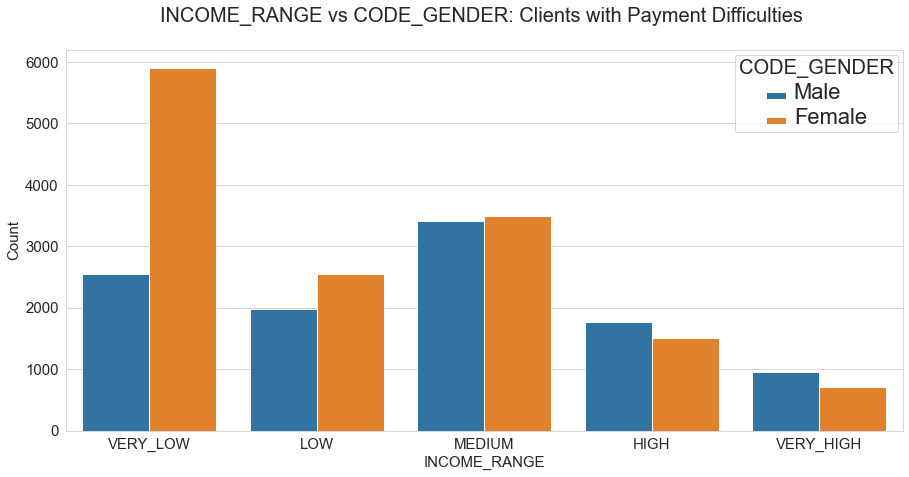

In [140]:
# Count plot for INCOME_RANGE vs CODE_GENDER for Clients with Payment Difficulties
sns.set_style('whitegrid')

plt.figure(figsize=(15,7))

ax = sns.countplot(x = 'INCOME_RANGE', hue = 'CODE_GENDER' ,data = pay_diff1)

# Labelling
plt.title(f'INCOME_RANGE vs CODE_GENDER: Clients with Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=0, size = 15)
plt.xlabel('INCOME_RANGE' , size = 15)
plt.ylabel('Count' , size =15)

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.show()

- Clients with Payment Difficulties, the count of females in the very_low income_range is very high than males.
- In the medium income_range, the females are slightly more than males.
- While in the very_high income_range, count of males are slightly higher than females.

- NAME_INCOME_TYPE vs CODE_GENDER

      NAME_INCOME_TYPE :- Clients income type (businessman, working, maternity leave,…).

      CODE_GENDER :- Gender of the client.

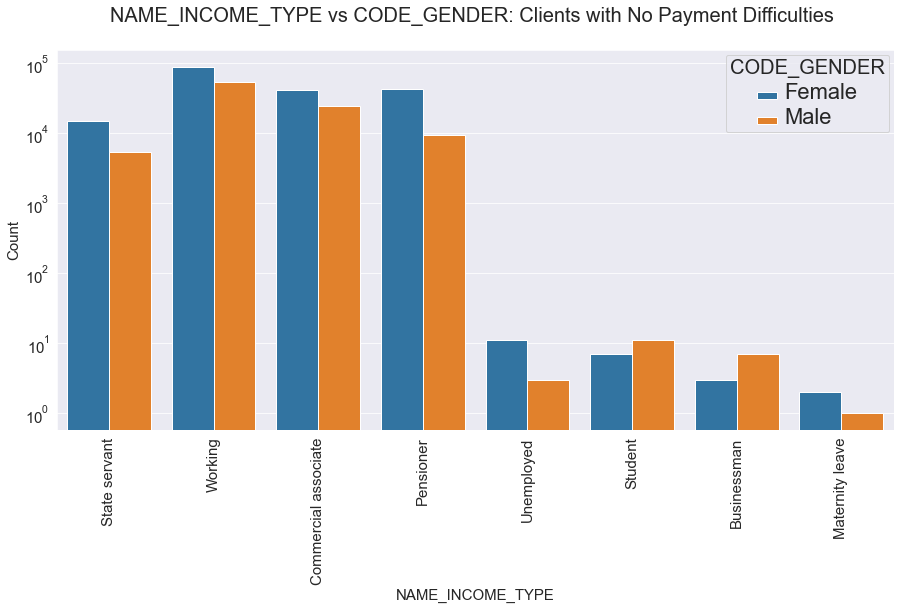

In [141]:
# Count plot for NAME_INCOME_TYPE vs CODE_GENDER for Clients with No Payment Difficulties
sns.set_style('darkgrid')

plt.figure(figsize=(15,7))

ax = sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER' ,data = nopay_diff1)

# Labelling
plt.title(f'NAME_INCOME_TYPE vs CODE_GENDER: Clients with No Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('NAME_INCOME_TYPE' , size = 15)
plt.ylabel('Count' , size =15)

plt.yscale('log')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.show()

- For Clients with No Payment Difficulties, we can see that in most of the income types the females are high in number as compared to males except for Students and Businessman which have higher count of males.

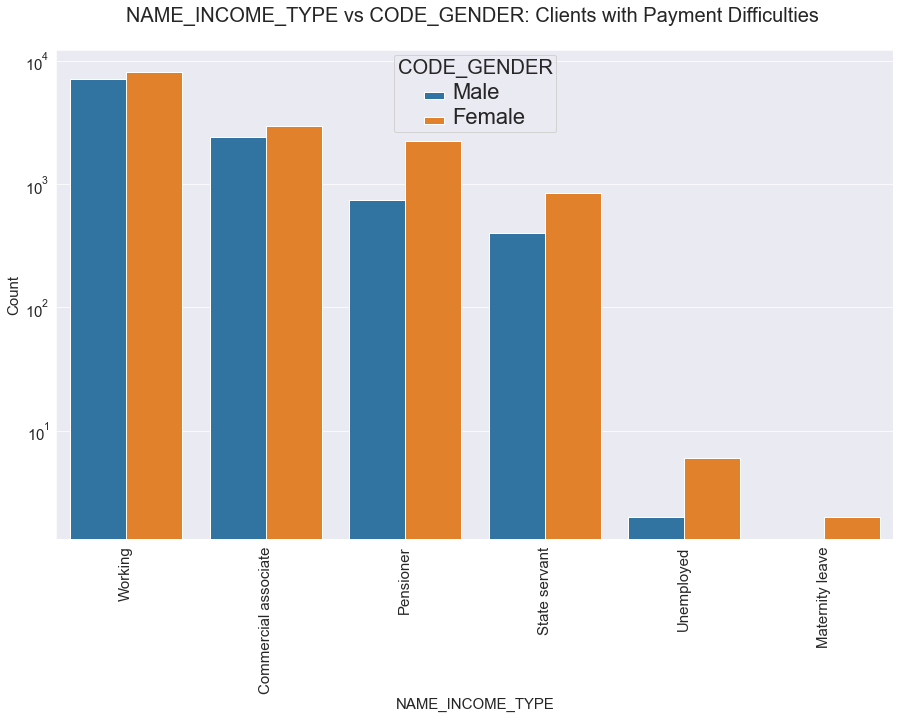

In [142]:
# Count plot for NAME_INCOME_TYPE vs CODE_GENDER for Clients with Payment Difficulties
sns.set_style("darkgrid")

plt.figure(figsize=(15,9))

ax = sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER' ,data = pay_diff1)

# Labelling
plt.title(f'NAME_INCOME_TYPE vs CODE_GENDER: Clients with Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('NAME_INCOME_TYPE' , size = 15)
plt.ylabel('Count' , size =15)


plt.yscale('log')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.show()

- Clients with Payment Difficulties, the number of females are more than males for all the cases of income types.
- The working income type has the highest number of counts followed by commercial associates.

- INCOME_RANGE vs NAME_INCOME_TYPE

      INCOME_RANGE :- Income of the client

      NAME_INCOME_TYPE :- Clients income type (businessman, working, maternity leave,…).

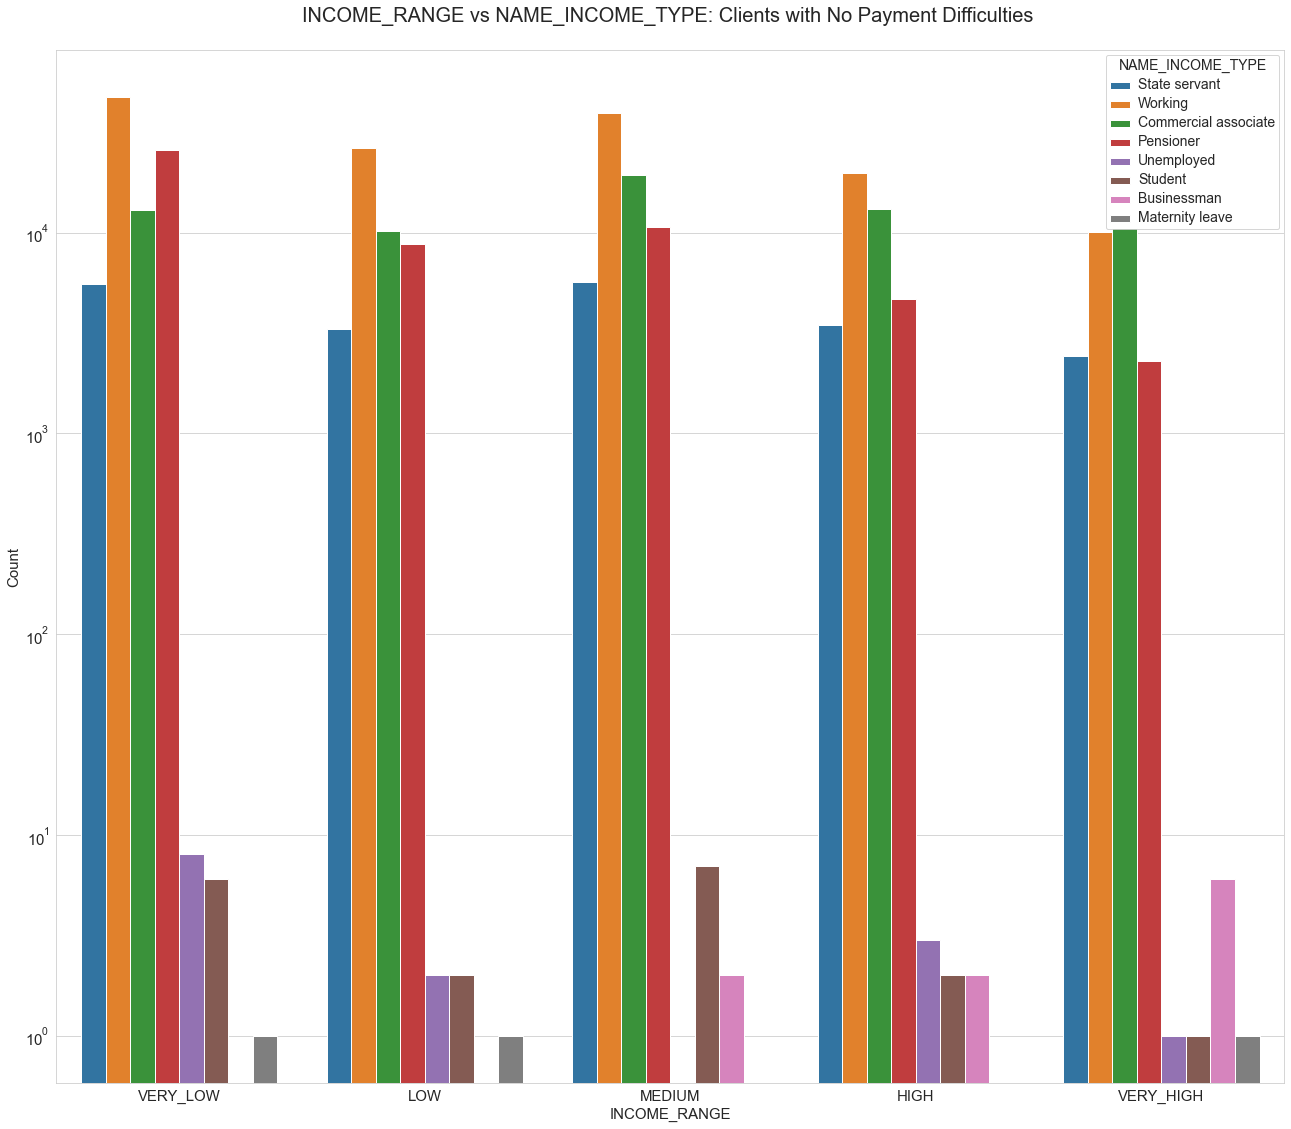

In [143]:
# Count plot for INCOME_RANGE vs NAME_INCOME_TYPE for Clients with No Payment Difficulties
sns.set_style("whitegrid")
plt.figure(figsize=(22,19))

ax = sns.countplot(x = 'INCOME_RANGE', hue = 'NAME_INCOME_TYPE' ,data = nopay_diff1)

# Labelling
plt.title(f'INCOME_RANGE vs NAME_INCOME_TYPE: Clients with No Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=0, size = 15)
plt.xlabel('INCOME_RANGE' , size = 15)
plt.ylabel('Count' , size =15)

plt.yscale('log')


plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title

plt.show()

- Clients with No Payment Difficulties, the working and commercial associates have an equal count in the very_high income_range. 
- While in the case of very_low income_range, the working income_type has the highest count followed by pensioners and then the commercial associates.
- The income_range of state servant is equal in the category of very_low and medium followed by high and low.

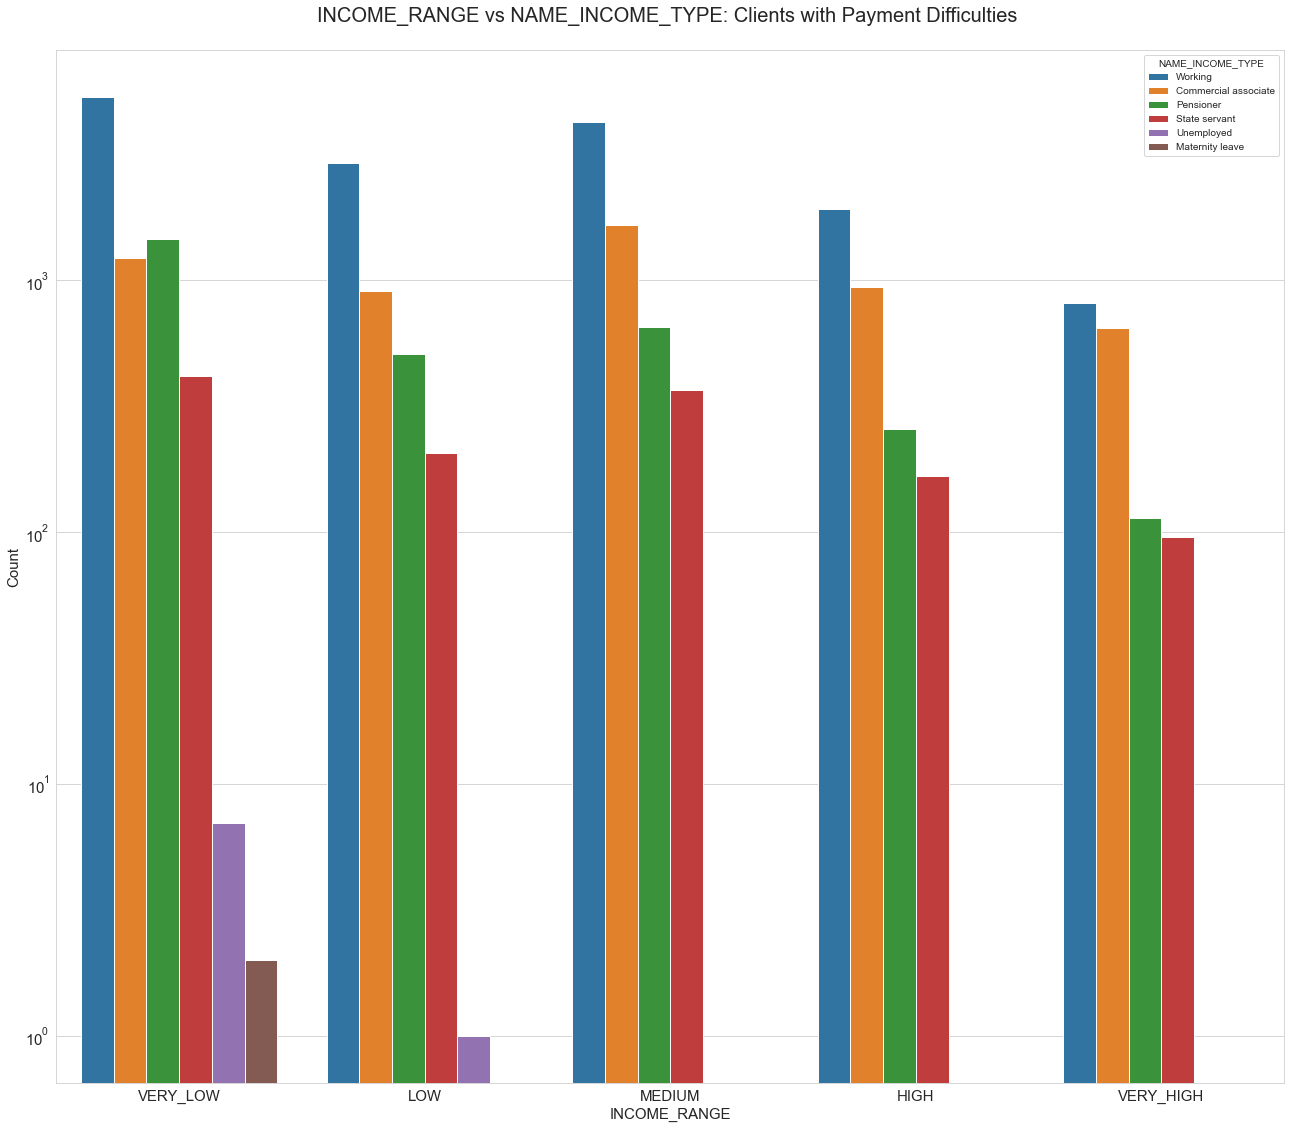

In [144]:
# Count plot for INCOME_RANGE vs NAME_INCOME_TYPE for Clients with Payment Difficulties
sns.set_style("whitegrid")
plt.figure(figsize=(22,19))

ax = sns.countplot(x = 'INCOME_RANGE', hue = 'NAME_INCOME_TYPE' ,data = pay_diff1)

# Labelling
plt.title(f'INCOME_RANGE vs NAME_INCOME_TYPE: Clients with Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=0, size = 15)
plt.xlabel('INCOME_RANGE' , size = 15)
plt.ylabel('Count' , size =15)

plt.yscale('log')

plt.legend(title="NAME_INCOME_TYPE", loc= "upper right", labels=["Working", "Commercial associate", "Pensioner", "State servant", "Unemployed", "Maternity leave"], )

plt.show()

- Clients with Payment Difficulties, the working count is slightly more than commercial associates count in the very_high income_range.
- While in the case of very_low income_range, the working income_type has the highest count followed by pensioners and then the commercial associates.

- NAME_CONTRACT_TYPE vs CODE_GENDER

    NAME_CONTRACT_TYPE :- Identification if loan is cash or revolving. 
        
    CODE_GENDER :- Gender of the client.

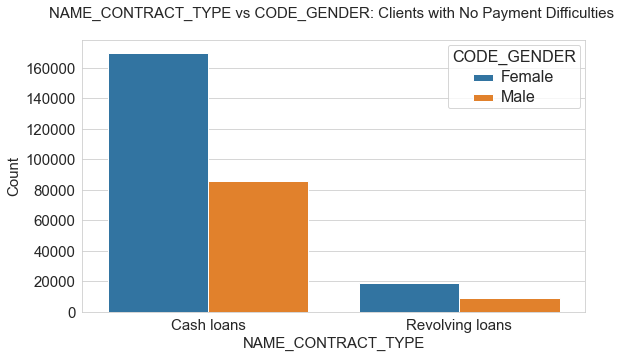

In [145]:
# Count plot for NAME_CONTRACT_TYPE vs CODE_GENDER for Clients with No Payment Difficulties
sns.set_style("whitegrid")
plt.figure(figsize=(9,5))

ax = sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER' ,data = nopay_diff1)

# Labelling
plt.title(f'NAME_CONTRACT_TYPE vs CODE_GENDER: Clients with No Payment Difficulties \n', size = 15)
plt.yticks(size = 15)
plt.xticks(rotation=0, size = 15)
plt.xlabel('NAME_CONTRACT_TYPE' , size = 15)
plt.ylabel('Count' , size =15)

plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

plt.show()

- Clients with No Payment Difficulties, the cash loans in females have the highest count than in males.
- The count of females are more than males for revolving loans.

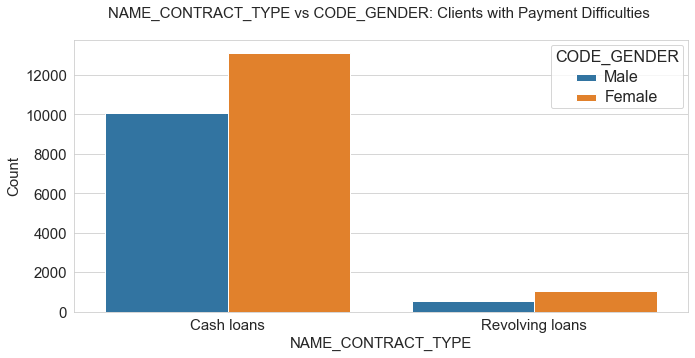

In [146]:
# Plot for NAME_CONTRACT_TYPE vs CODE_GENDER for Clients with Payment Difficulties

plt.figure(figsize=(11,5))

ax = sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER' ,data = pay_diff1)

# Labelling
plt.title(f'NAME_CONTRACT_TYPE vs CODE_GENDER: Clients with Payment Difficulties \n', size = 15)
plt.yticks(size = 15)
plt.xticks(rotation=0, size = 15)
plt.xlabel('NAME_CONTRACT_TYPE' , size = 15)
plt.ylabel('Count' , size =15)

plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

plt.show()

- For Clients with Payment Difficulties, females have the highest counts in the cash loans as well as in the resolving loans as compared to males.

# 7.3. Multivariate Analysis.
- Multivariate Analysis :- Clients with "No Payment difficulties" vs Clients with "Payment difficulties"

- NAME_EDUCATION_TYPE vs AMT_CREDIT vs NAME_FAMILY_STATUS

        NAME_EDUCATION_TYPE :- Level of highest education the client achieved.

        AMT_CREDIT :- Credit amount of the loan.

        NAME_FAMILY_STATUS :- Family status of the client

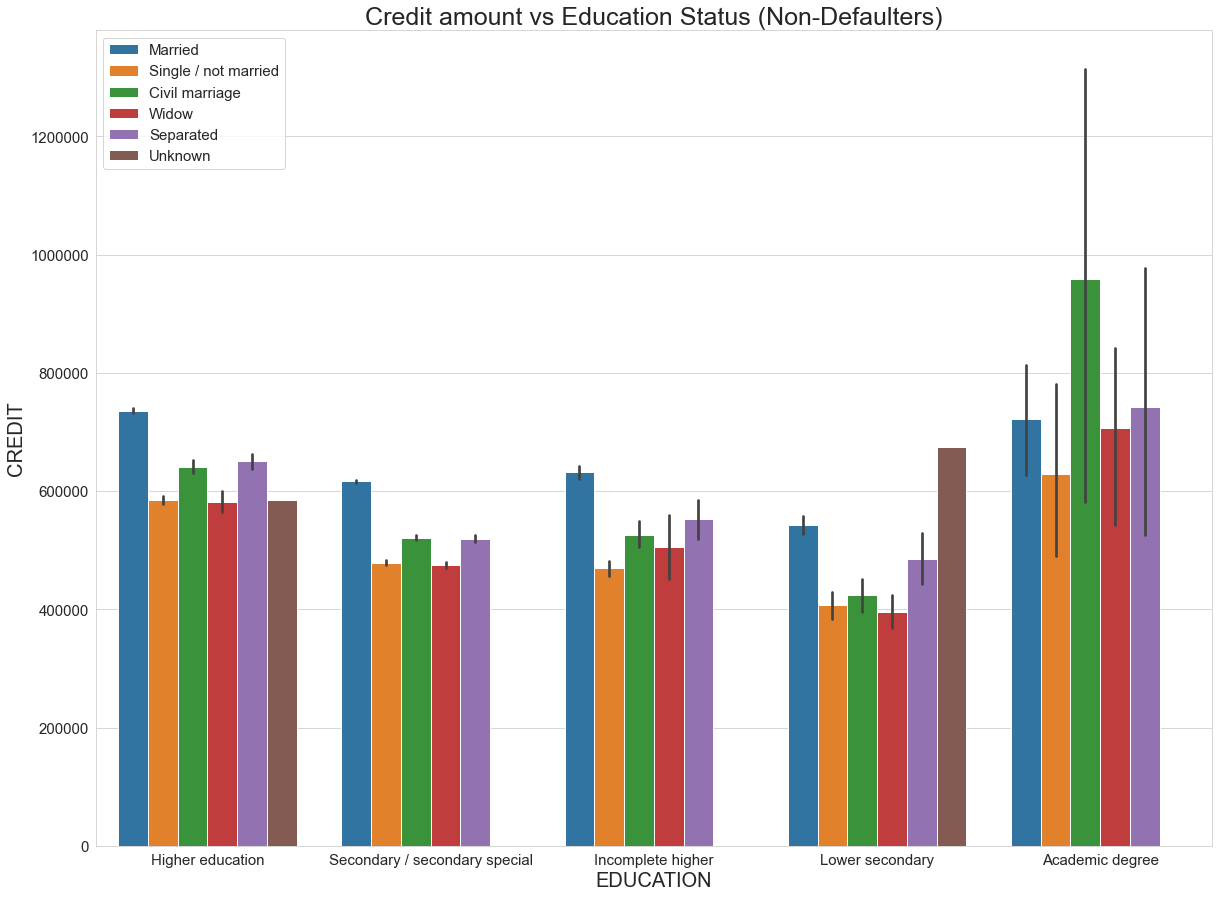

In [147]:
# Plot for NAME_EDUCATION_TYPE vs AMT_CREDIT vs NAME_FAMILY_STATUS for Clients with No Payment Difficulties

plt.figure(figsize=(20,15))

ax2 = sns.barplot(data =nopay_diff1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Credit amount vs Education Status (Non-Defaulters)', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('EDUCATION' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')


plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- Clients with No Payment Difficulties.
- Married people with higher education have applied for high credit loans and also is the highest among all education groups.
- In Academic degree, civil marriage clients have high credit loan application amongst all academic degree holders.

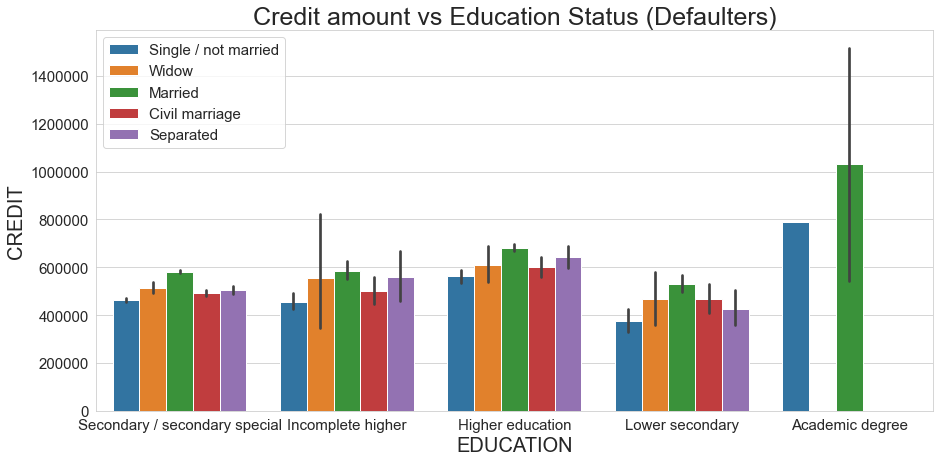

In [148]:
# Plot for NAME_EDUCATION_TYPE vs AMT_CREDIT vs NAME_FAMILY_STATUS for Clients with Payment Difficulties

plt.figure(figsize=(15,7))

ax2 = sns.barplot(data =pay_diff1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Credit amount vs Education Status (Defaulters)', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('EDUCATION' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')


plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- Clients with Payment Difficulties

- In academic degree, married clients have applied for loan of 10 lakhs approx.
- In higher education, married client has the highest credit amount application.

- NAME_EDUCATION_TYPE vs AMT_CREDIT vs INCOME_RANGE

      NAME_EDUCATION_TYPE :- Level of highest education the client achieved.

      AMT_CREDIT :- Credit amount of the loan.

      INCOME_RANGE :- Income of the client.

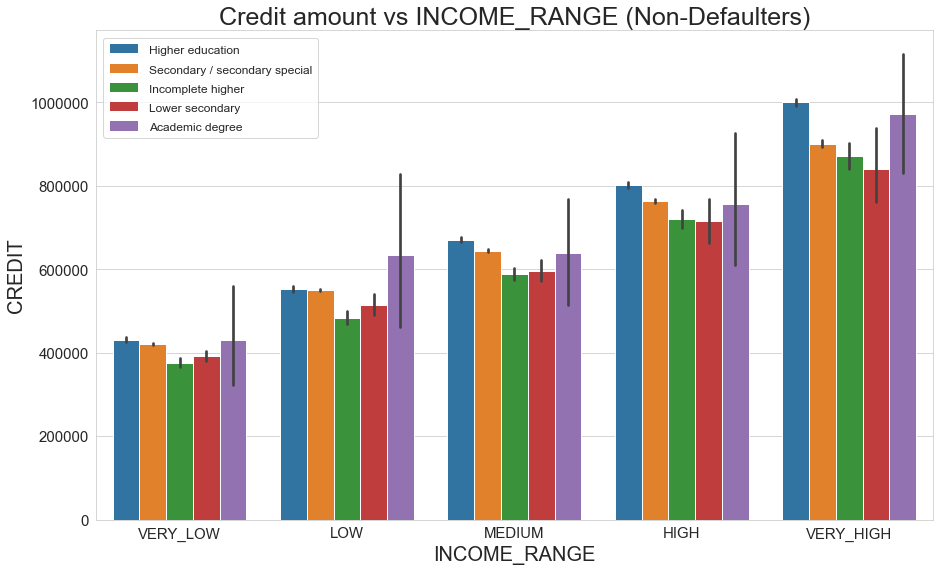

In [149]:
# Plot for NAME_EDUCATION_TYPE vs AMT_CREDIT vs INCOME_RANGE for Clients with No Payment Difficulties

plt.figure(figsize=(15,9))

ax2 = sns.barplot(data =nopay_diff1, x='INCOME_RANGE',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE')
plt.title('Credit amount vs INCOME_RANGE (Non-Defaulters)', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('INCOME_RANGE' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')


plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='12') # for legend title

plt.show()

- For clients facing no payment problems, it is usually with people with higher education or with secondary education who have taken the biggest credits.
- Clients with academic degrees are far less likely to default across all income groups.

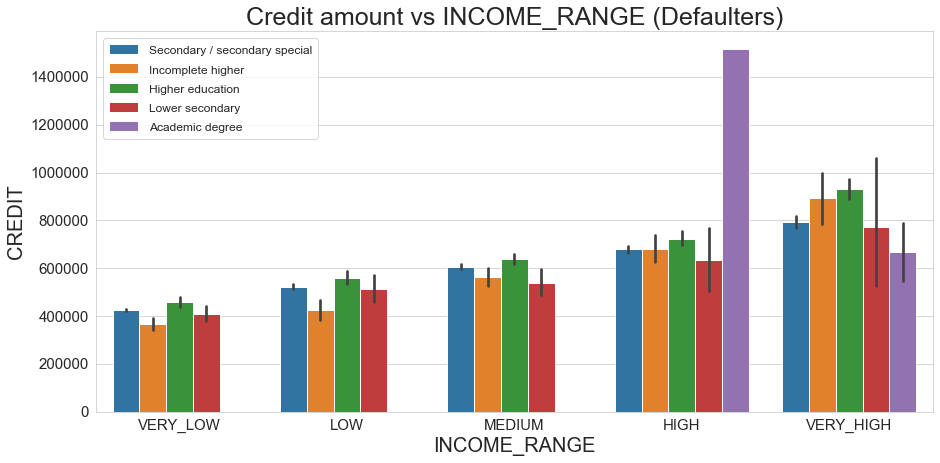

In [150]:
# Plot for NAME_EDUCATION_TYPE vs AMT_CREDIT vs INCOME_RANGE for Clients with Payment Difficulties

plt.figure(figsize=(15,7))

ax2 = sns.barplot(data =pay_diff1, x='INCOME_RANGE',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE')
plt.title('Credit amount vs INCOME_RANGE (Defaulters)', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('INCOME_RANGE' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')


plt.legend(fontsize='x-large', title_fontsize='20', loc="upper left")

plt.setp(ax2.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='12') # for legend title

plt.show()

- For clients facing payment problems, it is usually with people with higher education or with secondary education who have taken the bigger credits across all income range.
- Clients with academic degrees are far less likely to default across all income range.

# 8. Top 10 Correlation
- Data Analysis for dataframes nopay_diff1 (Clients with "No Payment difficulties") and pay_diff1 (Clients with "Payment difficulties").

- Top 10 Correlation in nopay_diff1 (Clients with No Payment Difficulties) dataframe.

In [151]:
# Find the list of all numeric variables("int", "float") and find the correlation between them.

var_0 = list(nopay_diff1.select_dtypes(['int64','float']).columns)

var_0 = nopay_diff1[var_0]

var_0_corr = var_0.corr()
var_0_corr

# Find the List of Top 10 Correlation in nopay_diff1 (Clients with "No Payment difficulties").

top10_0 = var_0_corr.where(np.triu(np.ones(var_0_corr.shape),k=1).astype(np.bool)).unstack().reset_index()
top10_0.columns=['Column1','Column2','Correlation']
top10_0.dropna(subset=['Correlation'],inplace=True)

top10_0 = top10_0.sort_values(by=['Correlation'], ascending=False)
top10_0 = top10_0.head(10)

In [152]:
# List of Top 10 Correlation in nopay_diff1
top10_0

Column1                     Column2  Correlation
790      OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998508
214               AMT_GOODS_PRICE                  AMT_CREDIT     0.987022
359   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.950149
282               CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571
503   LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
826      DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859332
611       LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381
215               AMT_GOODS_PRICE                 AMT_ANNUITY     0.776421
179                   AMT_ANNUITY                  AMT_CREDIT     0.771297
1151               YEARS_EMPLOYED                         AGE     0.626028

- The highest correlation is between OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE.
- The credit amount and good's price have the 2nd highest correlation as this is product the client is to buy, so applied for credit on it.
- There is positive correlation between annuity and good's price and also between annuity and credit, as this is the annuity which the client will pay on monthly basis as approved by company.

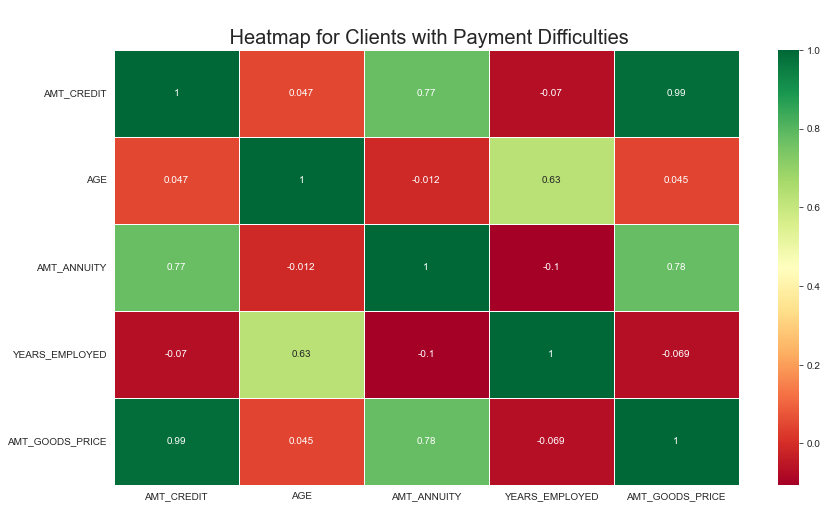

In [153]:
# Visualising the correlation of variables in a heatmap.
plt.figure(figsize=[14,8])
sns.heatmap(data= nopay_diff1[["AMT_CREDIT", "AGE", "AMT_ANNUITY","YEARS_EMPLOYED","AMT_GOODS_PRICE"]].corr(), cmap="RdYlGn", annot=True, linewidths = 0.9 )

# Labelling heatmap, x-axis and y-axis.
plt.title('\n Heatmap for Clients with Payment Difficulties', fontsize=20, fontweight=3)

plt.show()

- The credit amount approved to been given to client is highly correlated with Good's price (0.99).
- The least correlation is of (-0.069) between year_employed and Good's price.
- Also, annuity and Good's price have the correlation of 0.78.
- Annuity and credit amount also have the correlation of 0.77 .

# B. 1. Reading the data
 
- Read the previous application data file and store them in a dataframe inp.

In [154]:
# Loading the prvious_application dataset into inp.
inp = pd.read_csv("C:/Users/Parag/Downloads/previous_application.csv")

In [155]:
# Lokking at the inp dataframe .
inp.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [156]:
# Checking number of columns and rows in the dataframe.(shape)
inp.shape

(1670214, 37)

In [157]:
# Checking the columnwise info of the dataframe.
inp.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [158]:
# Checking the summary for numeric columns in the dataframe.
inp.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

# 2. Data Cleaning.

- Checking for missing values.

In [159]:
# Checking the percentage of null values in each columns in the dataframe.
(100*inp.isnull().sum()/len(inp)).reset_index().rename(columns={"index":"Variables",0:"Missing Percentage"}).sort_values("Missing Percentage",ascending=False)

Variables  Missing Percentage
14     RATE_INTEREST_PRIVILEGED           99.643698
13        RATE_INTEREST_PRIMARY           99.643698
6              AMT_DOWN_PAYMENT           53.636480
12            RATE_DOWN_PAYMENT           53.636480
20              NAME_TYPE_SUITE           49.119754
36    NFLAG_INSURED_ON_APPROVAL           40.298129
35             DAYS_TERMINATION           40.298129
34                DAYS_LAST_DUE           40.298129
33    DAYS_LAST_DUE_1ST_VERSION           40.298129
32               DAYS_FIRST_DUE           40.298129
31           DAYS_FIRST_DRAWING           40.298129
7               AMT_GOODS_PRICE           23.081773
3                   AMT_ANNUITY           22.286665
28                  CNT_PAYMENT           22.286366
30          PRODUCT_COMBINATION            0.020716
5                    AMT_CREDIT            0.000060
29             NAME_YIELD_GROUP            0.000000
23               NAME_PORTFOLIO            0.000000
27         NAME_SELLER_INDUSTRY            0.000000
26             SELLERPLACE_AREA            0.000000
25                 CHANNEL_TYPE            0.000000
24            NAME_PRODUCT_TYPE            0.000000
0                    SK_ID_PREV            0.000000
22          NAME_GOODS_CATEGORY            0.000000
21             NAME_CLIENT_TYPE            0.000000
19           CODE_REJECT_REASON            0.000000
1                    SK_ID_CURR            0.000000
17                DAYS_DECISION            0.000000
16         NAME_CONTRACT_STATUS            0.000000
15       NAME_CASH_LOAN_PURPOSE            0.000000
11       NFLAG_LAST_APPL_IN_DAY            0.000000
10  FLAG_LAST_APPL_PER_CONTRACT            0.000000
9       HOUR_APPR_PROCESS_START            0.000000
8    WEEKDAY_APPR_PROCESS_START            0.000000
4               AMT_APPLICATION            0.000000
2            NAME_CONTRACT_TYPE            0.000000
18            NAME_PAYMENT_TYPE            0.000000

In [160]:
# Dropping columns with null value percentage more than 35% since none of the important columns are dropped.Assigning to inp1.
inp1 = inp[inp.columns[inp.isnull().sum()/len(inp) < 0.35]]

In [161]:
# Checking number of rows and columns after dropping few columns.
inp1.shape

(1670214, 26)

In [162]:
# Dropping from "WEEKDAY_APPR_PROCESS_START" to "NFLAG_LAST_APPL_IN_DAY"  since these are not important to our analysis.

inp1 = inp1.drop(inp1.loc[:,'WEEKDAY_APPR_PROCESS_START':'NFLAG_LAST_APPL_IN_DAY'], axis= 1)

In [163]:
# Checking number of rows and columns after dropping few columns.
inp1.shape

(1670214, 22)

# 2.1 Handling missing values.

In [164]:
# Looking "AMT_GOODS_PRICE" column.
inp1["AMT_GOODS_PRICE"].value_counts()

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [165]:
# Looking at the statistical values of the column.
inp1["AMT_GOODS_PRICE"].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [166]:
# Since it is a numeric column, null values are imputed with median.
inp1["AMT_GOODS_PRICE"] = inp1["AMT_GOODS_PRICE"].fillna(inp1["AMT_GOODS_PRICE"].median())

In [167]:
# Cross-checking for null values.
inp1["AMT_GOODS_PRICE"].isnull().sum()

0

In [168]:
# Looking "AMT_ANNUITY" column.
inp1["AMT_ANNUITY"].value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [169]:
# Looking at the statistical values of the column.
inp1["AMT_ANNUITY"].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [170]:
# Since it is a numeric column, null values are imputed with median.
inp1["AMT_ANNUITY"]= inp1["AMT_ANNUITY"].fillna(inp1["AMT_ANNUITY"].median())

In [171]:
# Cross-checking for null values.
inp1["AMT_ANNUITY"].isnull().sum()

0

In [172]:
# Looking "CNT_PAYMENT" column.
inp1["CNT_PAYMENT"].value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

In [173]:
# Looking at the statistical values of the column.
inp1["CNT_PAYMENT"].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [174]:
# Since it is a numeric column, null values are imputed with median.
inp1["CNT_PAYMENT"] = inp1["CNT_PAYMENT"].fillna(inp1["CNT_PAYMENT"].median())

In [175]:
# Cross-checking for null values
inp1["CNT_PAYMENT"].isnull().sum()

0

In [176]:
# Looking "PRODUCT_COMBINATION" column.
inp1["PRODUCT_COMBINATION"].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [177]:
# Looking at the statistical values of the column.
inp1["PRODUCT_COMBINATION"].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [178]:
# Since it is a categorical column, null values are imputed with mode.
inp1["PRODUCT_COMBINATION"]= inp1["PRODUCT_COMBINATION"].fillna(inp1["PRODUCT_COMBINATION"].mode()[0])

In [179]:
# Cross-checking for null values.
inp1["PRODUCT_COMBINATION"].isnull().sum()

0

In [180]:
# Looking "AMT_CREDIT" column.
inp1["AMT_CREDIT"].value_counts()

0.00         336768
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: AMT_CREDIT, Length: 86803, dtype: int64

In [181]:
# Looking at the statistical values of the column.
inp1["AMT_CREDIT"].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [182]:
# Since it is a numeric column, null values are imputed with median.
inp1["AMT_CREDIT"]= inp1["AMT_CREDIT"].fillna(inp1["AMT_CREDIT"].median())

In [183]:
# Cross-checking for null values.
inp1["AMT_CREDIT"].isnull().sum()

0

# 2.2 Identifying and handling outliers.

In [184]:
# Checking numeric columns.
list(inp1.select_dtypes(include = ['float64','int64']))

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

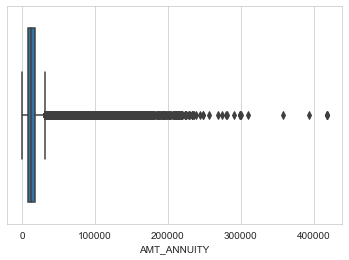

In [185]:
# Checking outliers in "AMT_ANNUITY" column.
sns.boxplot(inp1["AMT_ANNUITY"])
plt.show()

- The "AMT_ANNUITY" column has outliers, we can't drop these high values as few clients with high income can pay annuity to company.

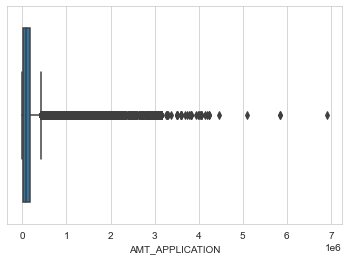

In [186]:
# Checking for outliers in "AMT_APPLICATION" column.
sns.boxplot(inp1["AMT_APPLICATION"])
plt.show()

- The "AMT_APPLICATION" column has outliers, but we can't remove them as high client do ask for high credit.

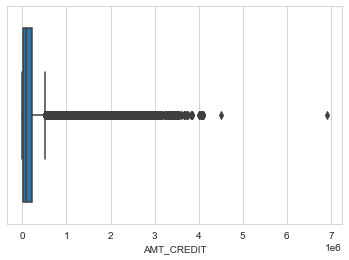

In [187]:
# Checking for outliers in "AMT_CREDIT" column.
sns.boxplot(inp1["AMT_CREDIT"])
plt.show()

- The "AMT_CREDIT" column has outliers, but we can't remove those as client can apply for higher credit. 

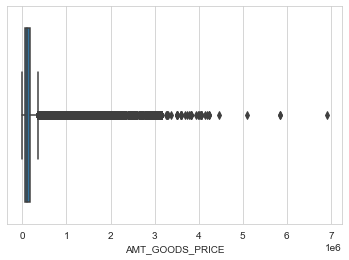

In [188]:
# Checking for outliers in "AMT_GOODS_PRICE" column.
sns.boxplot(inp1["AMT_GOODS_PRICE"])
plt.show()

- The "AMT_GOODS_PRICE" column has outliers, but we can't remove these as clients can take credit for high priced goods.

# 2.3 Handling incorrect datatypes.

In [189]:
# Name the columns which have "Float64" dtypes.

list(inp1.select_dtypes(include = ['float64']))

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT']

In [190]:
# Changing the dtype of columns from "Float64" to "Int64"
num_columns = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', "CNT_PAYMENT", "AMT_CREDIT","AMT_APPLICATION"]
inp1.loc[:, num_columns] = inp1.loc[:, num_columns].apply(lambda x: x.astype('int64', errors = 'ignore'))

In [191]:
# Name the columns which have "Object" dtypes.

list(inp1.select_dtypes(include = ['object']))

['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [192]:
# Changing the dtype of columns from "Object" to "String"

obj_columns = ['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
inp1.loc[:, obj_columns] = inp1.loc[:, obj_columns].apply(lambda x: x.astype('str', errors = 'ignore'))

# 2.4 Invalid data handling.

In [193]:
# Getting summary of "DAYS_DECISION" variable , columns with DAYS as data is in negative in datafram
inp1["DAYS_DECISION"].describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [194]:
# Converting to negative values to positive values.
inp1['DAYS_DECISION'] = abs(inp1["DAYS_DECISION"])
inp1["DAYS_DECISION"].describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

In [195]:
# Checking for null values.
inp1["DAYS_DECISION"].isnull().sum()

0

In [196]:
# Checking the "NAME_CLIENT_TYPE" column.
inp1['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [197]:
#REPLACING XAN , nan and XAP with np.NaN in the inp1 dataframe.

inp1 = inp1.replace('XNA', np.nan)
inp1 = inp1.replace('XAP', np.nan)
inp1 = inp1.replace('nan', np.nan)

In [198]:
# Rechecking the "NAME_CLIENT_TYPE" column.
inp1['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

In [199]:
# Checking "NAME_CONTRACT_STATUS" column.
inp1["NAME_CONTRACT_STATUS"].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

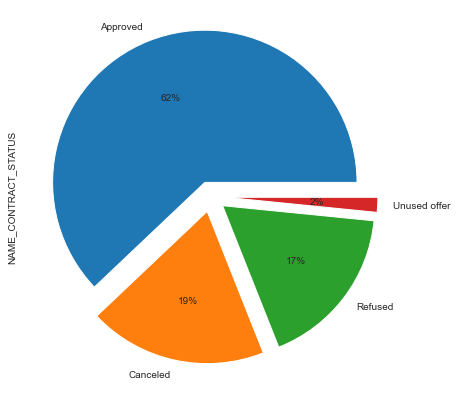

In [200]:
# Plotting a pie chart for visualising the results.
plt.figure(figsize=[10,7])
inp1["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.pie(explode=(0.1, 0.1, 0.1, 0.1), autopct="%1.0f%%")
plt.show()

- 62% of the previous applications were approved.

- Only 17% of the applications were refused.

- 19% were cancelled by the applicant.

In [201]:
# Checking "NAME_PORTFOLIO" column.
inp1["NAME_PORTFOLIO"].value_counts()

POS      691011
Cash     461563
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [202]:
# Checking "NAME_CASH_LOAN_PURPOSE" column.
inp1["NAME_CASH_LOAN_PURPOSE"].value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

# 3. Data Analysis.

# 3.1.1 Univariate Analysis of numerical variables.

In [203]:
# Univariate Analysis of Numerical Variables

def plot_num(var_1):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,5])

# Distribution plot for Variable  for inp1 dataframe.
    plt.subplot(1,2,1)
    sns.distplot(inp1[var_1],hist=False, color='Green', kde=True)
    

# Labelling
    plt.title(f'Distribution plot for {var_1} \n', fontsize=20, fontweight=3)
    plt.xlabel(var_1, fontsize = 15, fontweight=1.5)
    
    # Box plot for Variable  for Clients in inp1 dataframe.
    plt.subplot(1,2,2)

    sns.boxplot(data =inp1, x=var_1)
  
  
# Labelling
    plt.title(f'Box plot for {var_1} \n', fontsize=20, fontweight=3)
    plt.xlabel(var_1, fontsize = 15, fontweight=1.5)
    plt.yticks(size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    
    plt.show()

- Analysing "AMT_ANNUITY" variable.

    AMT_ANNUITY :- Annuity of previous application.

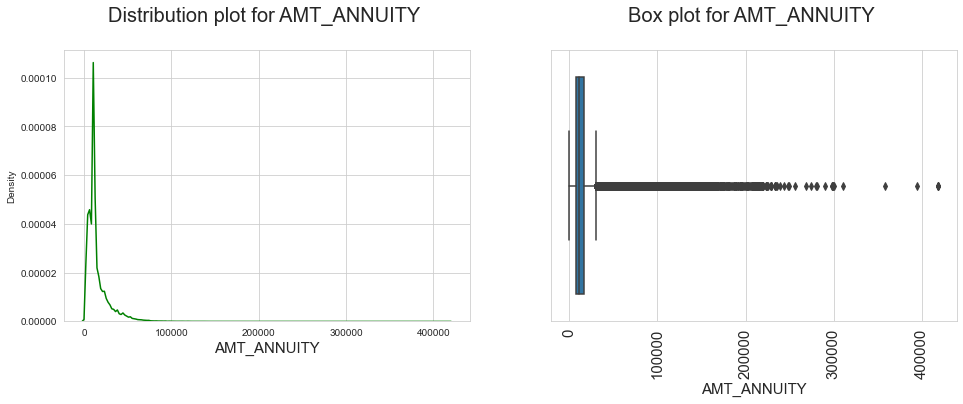

In [204]:
plot_num("AMT_ANNUITY")

- Annuity is the monthly amount paid by client to company.
- Maximum number of annuities are within 1 lakh.

- Analysing "AMT_APPLICATION" variable.

       AMT_APPLICATION :-How much credit did client ask for.

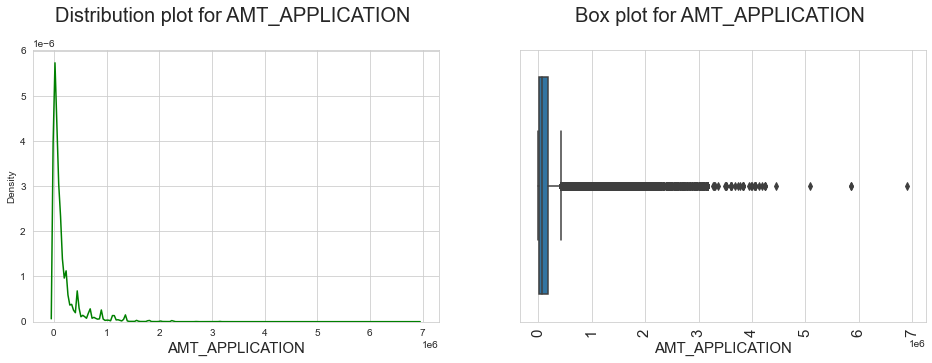

In [205]:
plot_num("AMT_APPLICATION")

- Majority of the clients asked for 0-10 lakh credit.

- Analysing "AMT_CREDIT" variable.

     AMT_CREDIT :- Final credit amount.

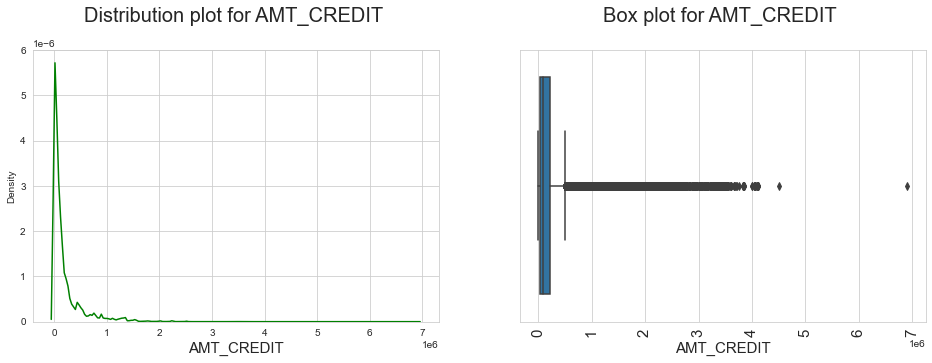

In [206]:
plot_num("AMT_CREDIT")

- Some clients have received the final credit amount above 12 lakhs as this is purely based on the product and income of client who has applied for credit.

- Analysing "DAYS_DECISION" variable.
 
      DAYS_DECISION :-When was the decision about previous application made relative to current application.

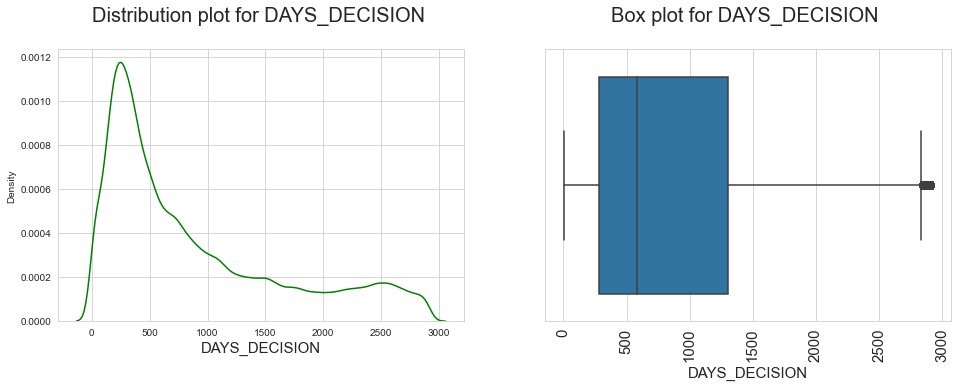

In [207]:
plot_num("DAYS_DECISION")

- Maximum days required to decide about previous credit application is between 0-500 days i.e. more than 1 year.
- Above 2800 days are outliers as company doesnot take such long time to process loans.

- Analysing "CNT_PAYMENT" variable.

     CNT_PAYMENT :- Term of previous credit at application.

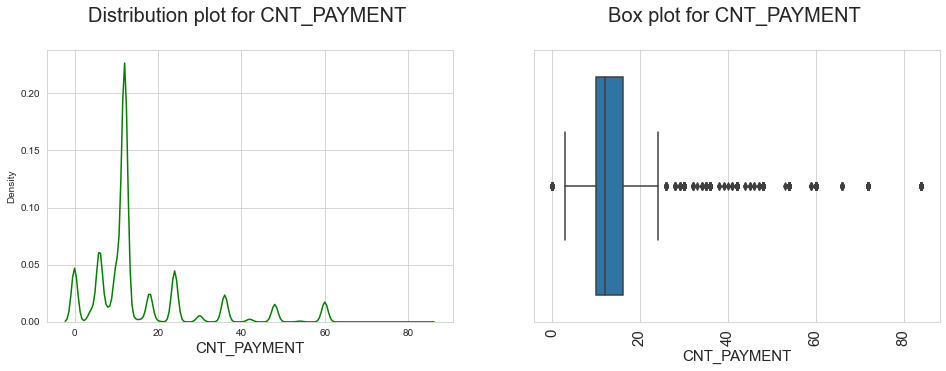

In [208]:
plot_num("CNT_PAYMENT")

- The most the term of credit is between 5 - 25.

# 3.1.2 Univariate Analysis of categorical Variables.

In [209]:
# Univariate Analysis of Categorical Variables

def plot_cat(var_1):
    plt.figure(figsize=[12,7])

# Distribution plot for Variable  for inp1 dataframe.
    inp1[var_1].value_counts(normalize=True).plot.pie(autopct="%1.0f%%")
    

# Labelling
    plt.title(f'Distribution plot for {var_1} \n', fontsize=20, fontweight=3)
    
    plt.show()

- Analysing "NAME_CONTRACT_TYPE" variable.

       NAME_CONTRACT_TYPE :- Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.

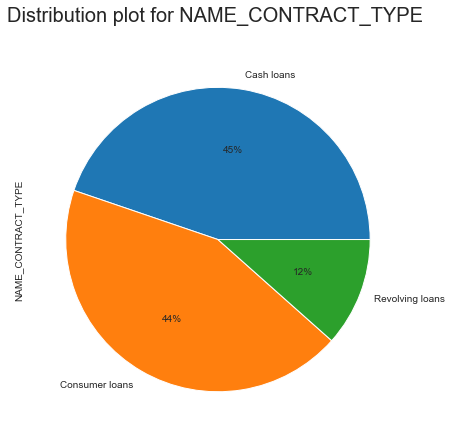

In [210]:
plot_cat("NAME_CONTRACT_TYPE")

- Cash and Consumer loans were the most popular contract types in all the previous applications, accounting for over 89% of all previous applications.

- Only 12% of clients in the past applied for revolving loans.

- Analysing "NAME_PORTFOLIO" variable.

     NAME_PORTFOLIO :- Was the previous application for CASH, POS,etc.

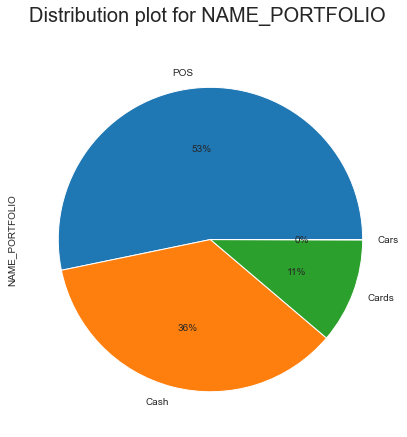

In [211]:
plot_cat("NAME_PORTFOLIO")

- 53% of the past applications were for Point-of-Sale (POS) credit, followed by Cash at 36%.
- Very negligible applications were for cars.

- Analysing "NAME_PRODUCT_TYPE" variable.

         NAME_PRODUCT_TYPE :- Was the previous application x-sell o walk-in.

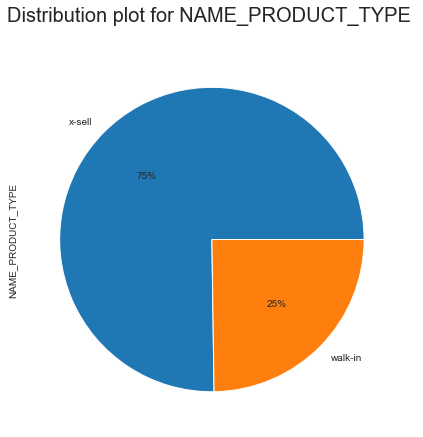

In [212]:
plot_cat("NAME_PRODUCT_TYPE")

- Cross-Sell (x-sell) accounted for the majority of the previous applications at 75%. While rest were walk-ins at 25% .

- Analysing "CODE_REJECT_REASON" variable.

       CODE_REJECT_REASON :-Why was the previous application rejected.

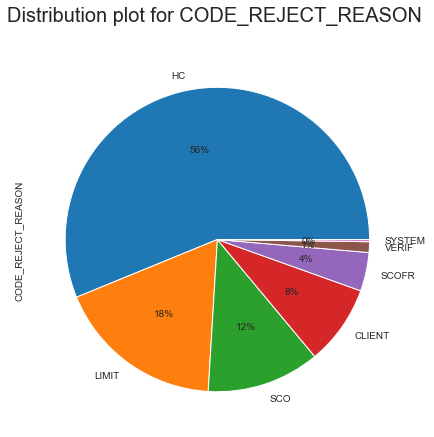

In [213]:
plot_cat("CODE_REJECT_REASON")

- 56% of the rejections were due to HC.
- LIMIT and SCO together accounted for 30% of rejections.

In [214]:
# Univariate Analysis of Categorical Variables

def plot_catg(var_2):
    plt.figure(figsize=[11,6])

# Count plot for Variable  for inp1
    

    sns.countplot(var_2, data = inp1)

# Labelling
    plt.title(f'Count plot for {var_2}  \n', fontsize=20, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 90, size = 15)
    plt.yticks(size = 15)
    plt.ylabel('Counts', fontsize = 15, fontweight=1.5)
    
    plt.yscale('log')

    plt.show()

- Analysing "PRODUCT_COMBINATION" variable.

     PRODUCT_COMBINATION :- Detailed product combination.

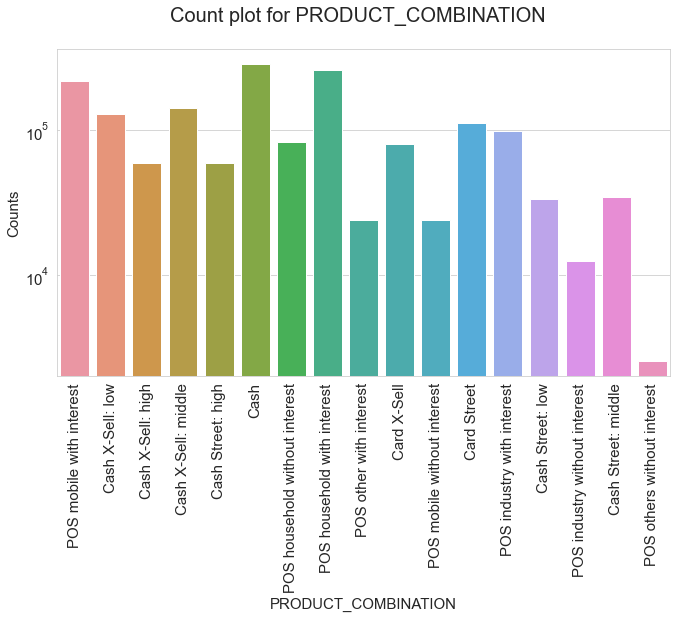

In [215]:
plot_catg("PRODUCT_COMBINATION")

- Cash product has the highest count when applied by client in previous application, followed by POS household with interest being the second highest number of application for credit.

- Analysing "NAME_GOODS_CATEGORY" variable.

     NAME_GOODS_CATEGORY :-The kind of goods did the client apply for.

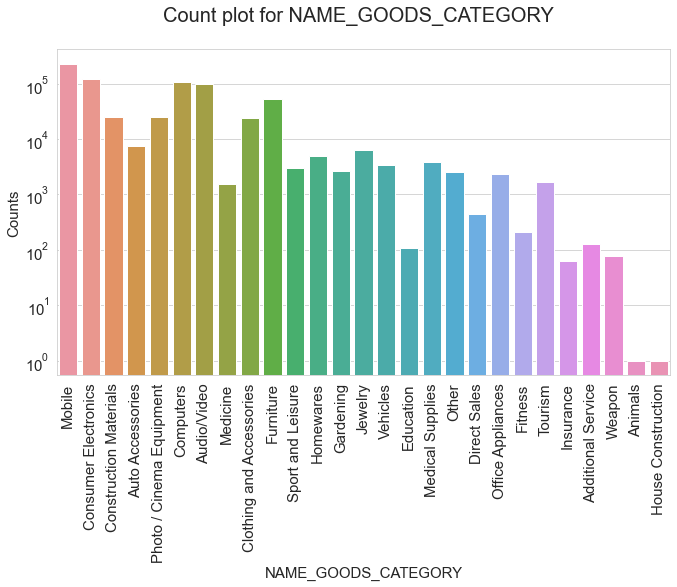

In [216]:
plot_catg("NAME_GOODS_CATEGORY")

- Clients those have applied for credit to purchase mobiles are highest among others.
- Consumer electronics, computers and audio/video have the second highest number of application.(approx)

# 3.2 Bivariate Analysis of Variables

 - Bivariate Analysis for inp1.

# 3.2.1 Numerical vs Numerical Variables.

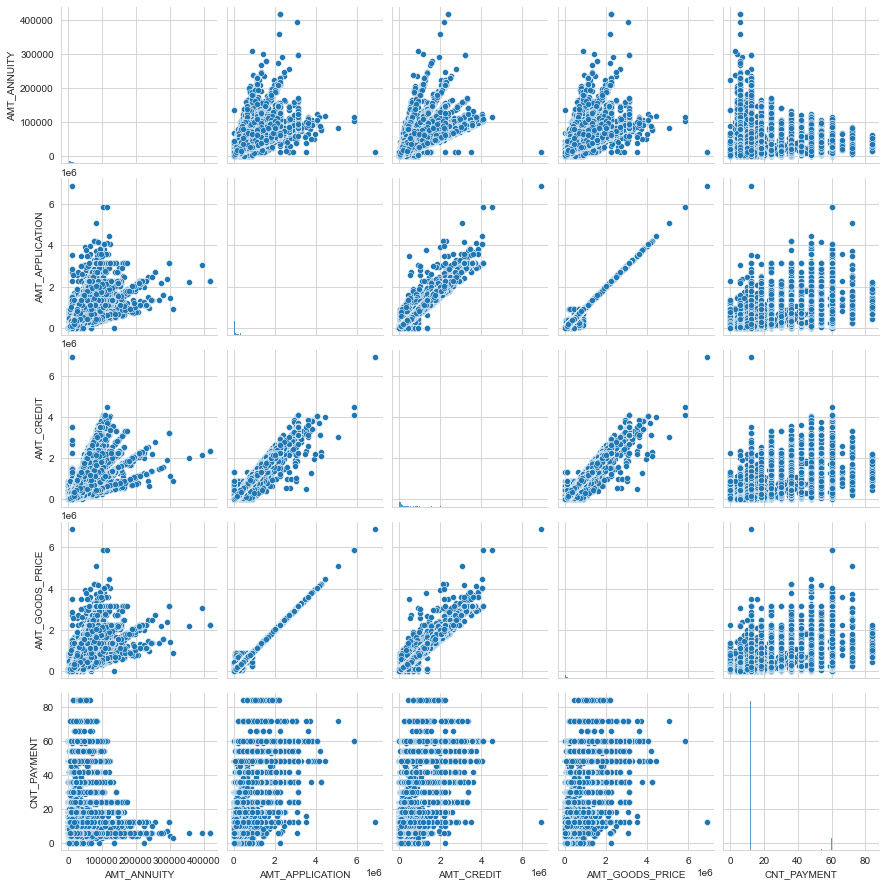

In [217]:
# Pairplot for Previous Application- inp1
sns.set_style("whitegrid")
sns.pairplot(data = inp1, vars=["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"])

plt.show()

- Amt_annuity vs cnt_payment:- The number of payments will increase with low annuity.
- Good'price amount and amount application has a linear relationship with each other. Same with credit and good's price.
- For credit amount and annuity, majority of points are between 0 to 10 lakhs. Also, if credit amount is high so will be the annuity.
- As application amount increases, the annuity will also increase.

# 3.2.2 Categorical vs Numerical Variables

In [218]:
# Bivariate Analysis of Categorical vs Numerical Variables

def plot_num_cat(var_1, var_2):
    plt.figure(figsize=[12,7])

# Barplot for Variable  for Clients with No Payment Difficulties
    sns.barplot(x = var_2, y = var_1 ,data = inp1)

# Labelling
    plt.title(f'{var_1} vs {var_2} \n', fontsize=20, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.ylabel(var_1, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 90, size =15)
    
    plt.yscale('log')
    
    
    plt.show()

- AMT_APPLICATION vs CODE_REJECT_REASON

          AMT_APPLICATION :- How much credit did client ask for.
          CODE_REJECT_REASON :- Rejection reason in previous application .

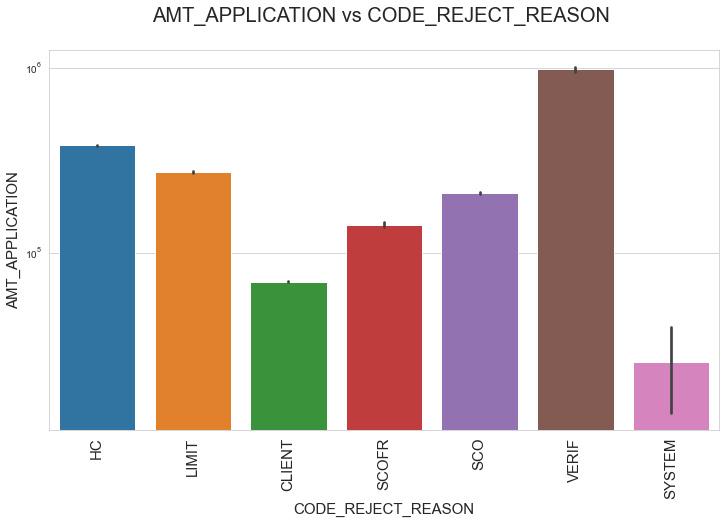

In [219]:
plot_num_cat("AMT_APPLICATION","CODE_REJECT_REASON")

- The clients who have applied for credit above 9 lakhs are being rejected on the basis of "VERIF" followed by "HC" credit amount 7 lakhs approx.

- AMT_GOODS_PRICE vs NAME_GOODS_CATEGORY

      AMT_GOODS_PRICE :- Goods price of good that client asked for .
      NAME_GOODS_CATEGORY :- The kind of goods did the client apply for.

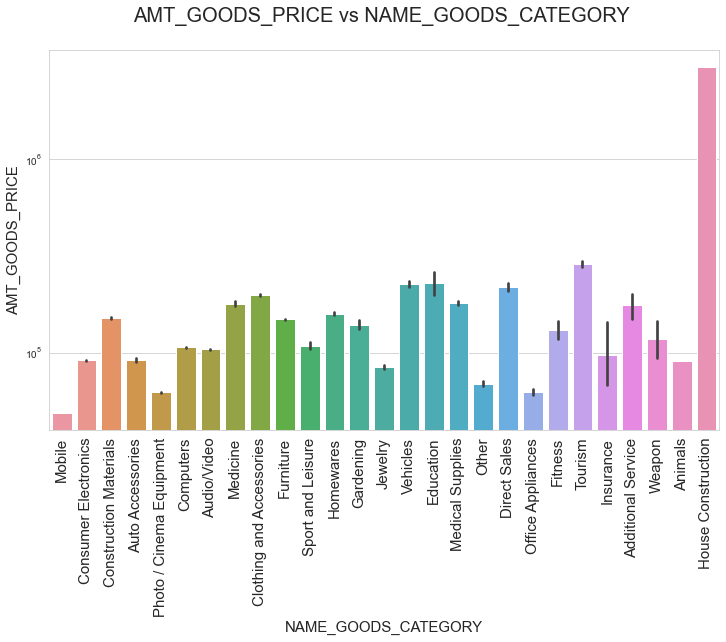

In [220]:
plot_num_cat("AMT_GOODS_PRICE","NAME_GOODS_CATEGORY")

- The highest in goods_category is House construction with goods_price above 10 lakhs.
- The second highest is Tourism category with goods_price above 1 lakhs.

- AMT_CREDIT vs NAME_CONTRACT_STATUS

        AMT_CREDIT :- Final credit amount.
        NAME_CONTRACT_STATUS :-Contract status (approved, cancelled, ...).

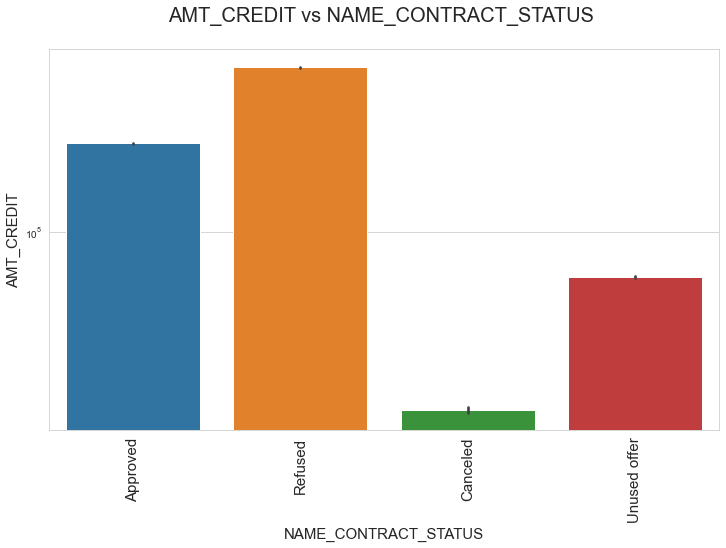

In [221]:
plot_num_cat("AMT_CREDIT","NAME_CONTRACT_STATUS")

- The company has refused maximum clients whose credit amount above 1 lakh becuase the client did not meet their requirement.
- While the company has also approved substantial number of clients whose credit amount is above 1 lakh.

- AMT_CREDIT vs NAME_YIELD_GROUP

      AMT_CREDIT :- Final credit amount .
      NAME_YIELD_GROUP :-Grouped interest rate into small medium and high.

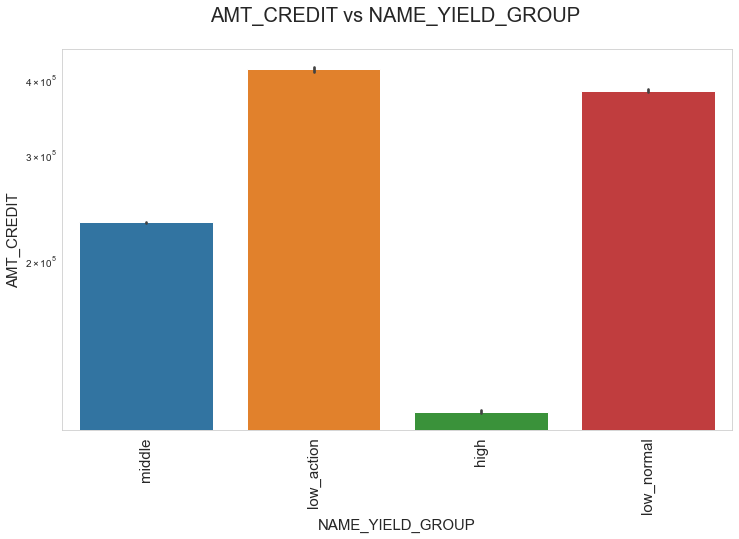

In [222]:
plot_num_cat("AMT_CREDIT","NAME_YIELD_GROUP")

- The low_action yield group (interest) as the highest credit amount followed by low_normal.
- So we can say that low interest rates were charged by company on the final credit amount.

- AMT_ANNUITY vs NAME_CONTRACT_STATUS

     AMT_ANNUITY :- Annuity of previous application.
        
    NAME_CONTRACT_STATUS :- Contract status (approved, cancelled, ...).

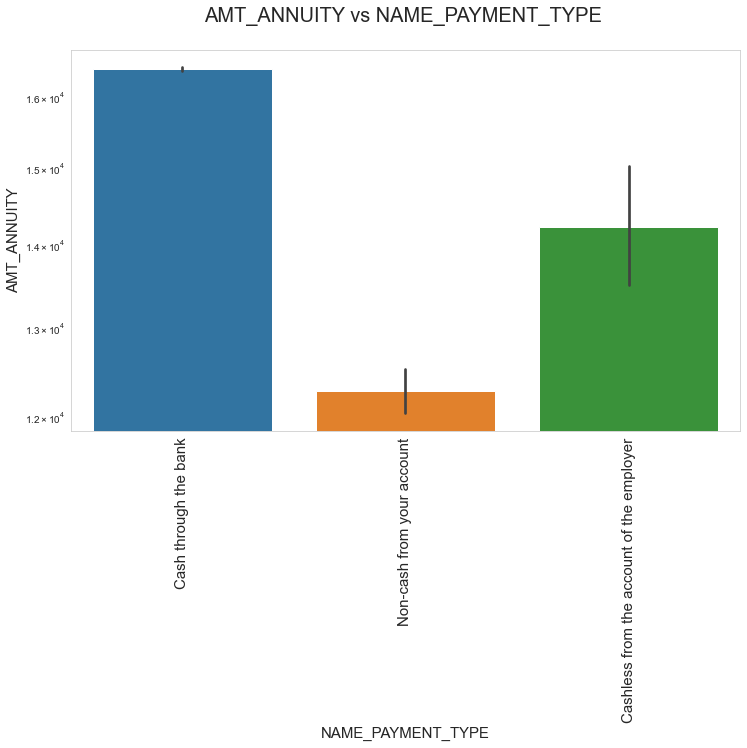

In [223]:
plot_num_cat("AMT_ANNUITY","NAME_PAYMENT_TYPE")

- Many clients have opted the cash through bank payment method to pay their monthly annuity of 16000 approx.
-The second most popular paymnet method is cashless from the account of the employer to pay monthly annuity of approx 14000.

# 3.2.3 Categorical vs Categorical Variables

In [224]:

# Count plot for Variable  for inp1.
def plot_cat_cat(var_1,var_2):
    plt.figure(figsize=(20,9))

    ax = sns.countplot(x = var_1, hue = var_2 ,data = inp1)


    plt.title(f'{var_1} vs {var_2} \n', size = 25)
    plt.yticks(size = 15)
    plt.xticks(rotation=0, size = 15)
    plt.xlabel(var_1 , size = 20)
    plt.ylabel('Count' , size =20)


    plt.yscale('log')


    plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title


    plt.show()

- NAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS

     NAME_CONTRACT_TYPE :- Contract product type (Cash loan, consumer loan [POS] ,...).
    
     NAME_CONTRACT_STATUS :- Contract status (approved, cancelled, ...).

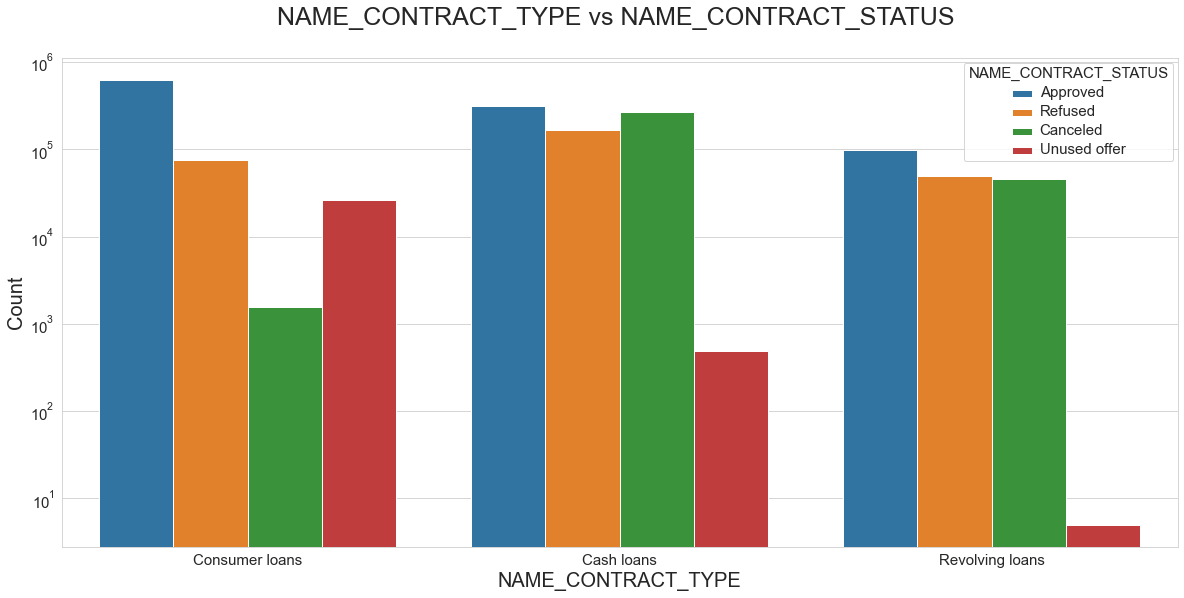

In [225]:
plot_cat_cat("NAME_CONTRACT_TYPE", "NAME_CONTRACT_STATUS")

- The consumer loans have the highest approval count amongst the other cash loans and revolving loans.
- While cash loans have highest refusing count and cancelled count as compared with other types of loans.

- NAME_PAYMENT_TYPE vs NAME_CONTRACT_STATUS

      NAME_PAYMENT_TYPE :- Payment method that client chose to pay.

        NAME_CONTRACT_STATUS :- Contract status (approved, cancelled, ...) of previous application.

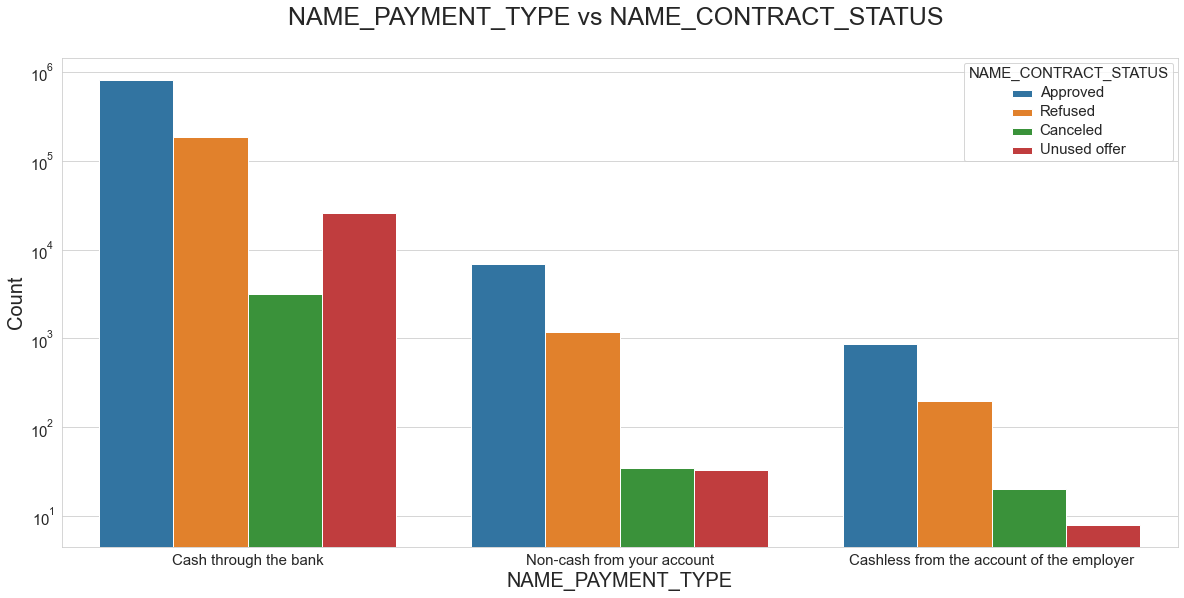

In [226]:
plot_cat_cat("NAME_PAYMENT_TYPE", "NAME_CONTRACT_STATUS")

- The cash through bank payment method has the highest count for approving the contract of clients. Followed by refusals and unused offer.
- While in non-cash from your account payment method as the highest approval count as compared to others within  the group.
- In case of cashless from the account of the employer, highest is the approval count as compared to others within the group.

- NAME_GOODS_CATEGORY vs NAME_PORTFOLIO

      NAME_GOODS_CATEGORY :- The kind of goods did the client apply for in the previous application.

        NAME_PORTFOLIO :- Was the previous application for CASH, POS.

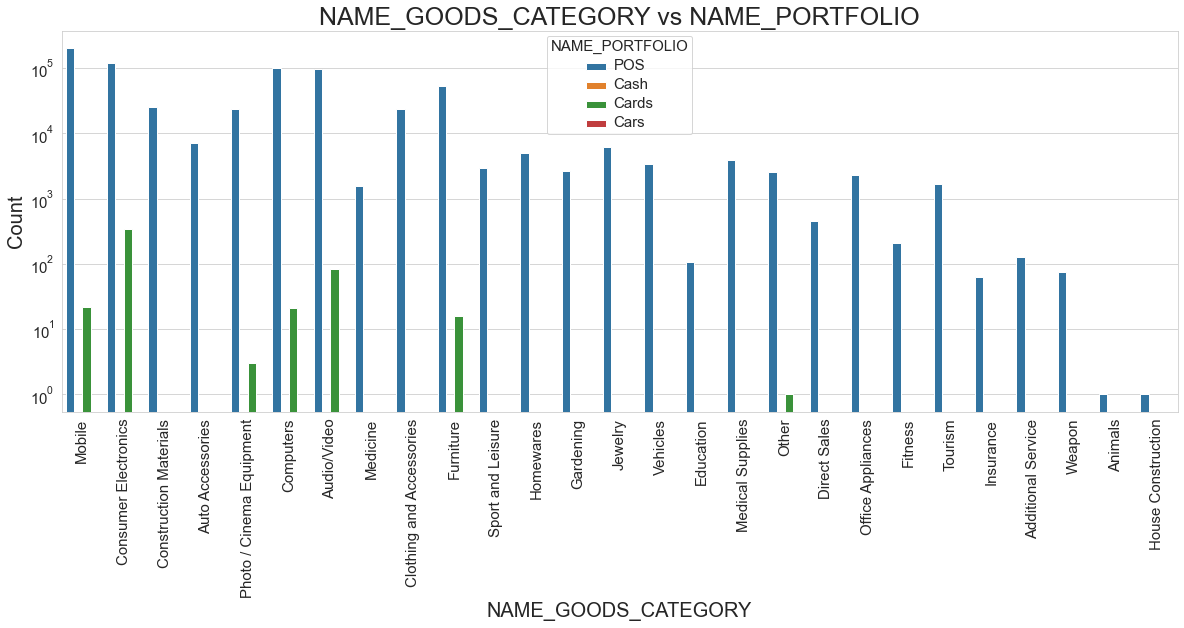

In [227]:
plt.figure(figsize=(20,7))
ax = sns.countplot(x = 'NAME_GOODS_CATEGORY', hue = 'NAME_PORTFOLIO' ,data = inp1)


plt.title('NAME_GOODS_CATEGORY vs NAME_PORTFOLIO', size = 25)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('NAME_GOODS_CATEGORY' , size = 20)
plt.ylabel('Count' , size =20)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title


plt.yscale('log')


plt.show()

- From point of sale (POS) transaction, the mobiles have the highest count. Followed by consumer electronics and computers.

- NAME_CLIENT_TYPE vs CHANNEL_TYPE

     NAME_CLIENT_TYPE :- Was the client old or new client when applying for the previous application.

        CHANNEL_TYPE :- Through which channel we acquired the client on the previous application.

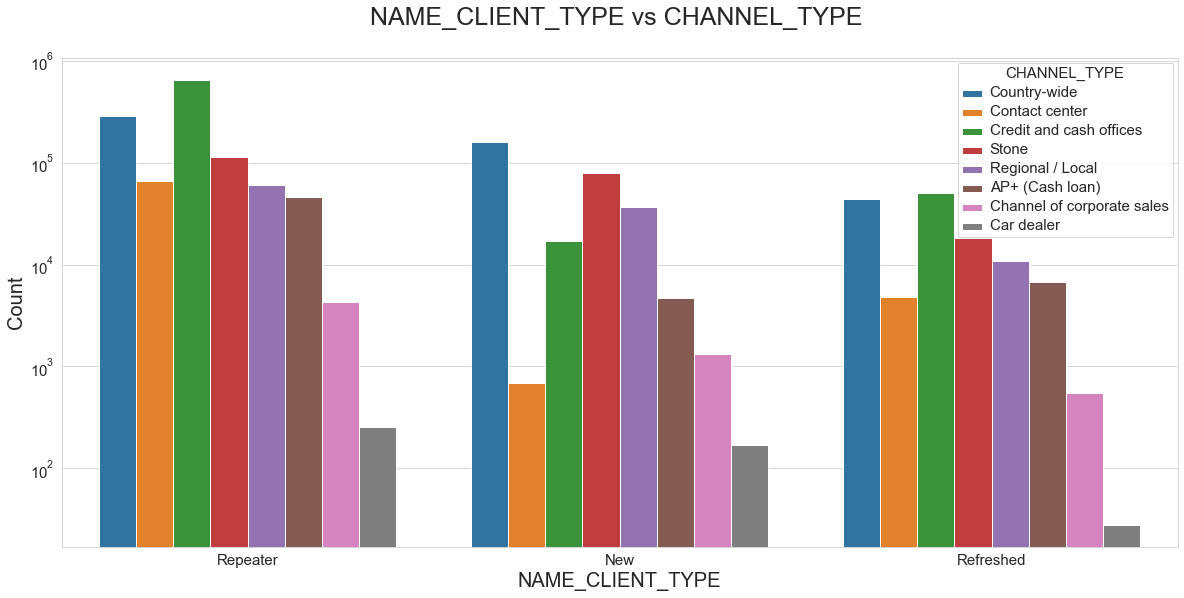

In [228]:
plot_cat_cat("NAME_CLIENT_TYPE", "CHANNEL_TYPE")

- From credit and cash offices have acquired the highest number of repeater clients, followed by country-wide channel.
- In case of refreshed clients, they are acquired by credit and cash followed by country-wide and stone.
- Whereas, new clients are mainly acquired through country-wide channnel.

# 3.3 Multivariate Analysis Variables

-Multivariate Analysis for inp1.

- NAME_YIELD_GROUP vs AMT_GOODS_PRICE vs NAME_CONTRACT_STATUS

           NAME_YIELD_GROUP :- Grouped interest rate into small medium and high of the previous application.

           AMT_GOODS_PRICE :- Goods price of good that client asked for (if applicable) on the previous application.

            NAME_CONTRACT_STATUS :- Contract status (approved, cancelled, ...) of previous application.

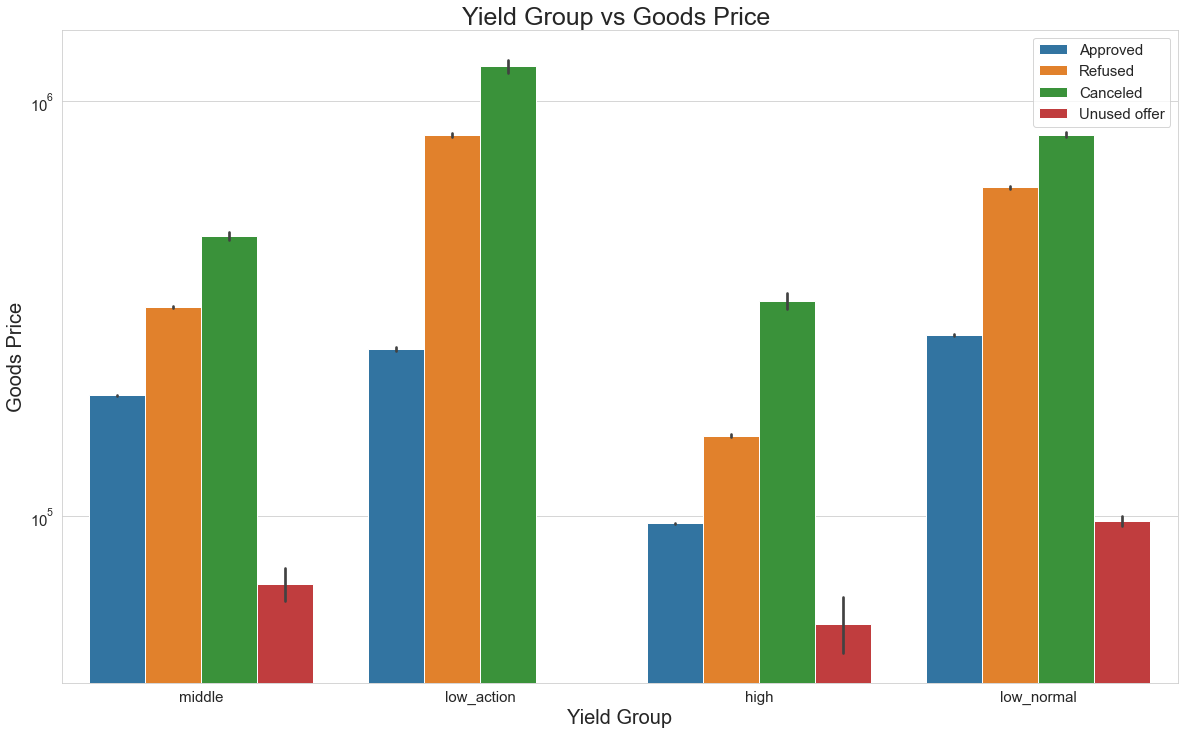

In [229]:
# Plot for NAME_YIELD_GROUP vs AMT_GOODS_PRICE vs NAME_CONTRACT_STATUS for Previous Application `previous_app`

plt.figure(figsize=(20,12))

ax2 = sns.barplot(data =inp1, x='NAME_YIELD_GROUP',y='AMT_GOODS_PRICE', hue ='NAME_CONTRACT_STATUS')
plt.title('Yield Group vs Goods Price ', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('Yield Group' , fontsize = 20)
plt.ylabel('Goods Price' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0, size = 15)

plt.yscale('log')

plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- Many clients have cancelled the application midway and their good's prices are even very high.
- Also, the company has rejected many applications of clients specially from low yield group (both low_action & low_normal).

- NAME_YIELD_GROUP vs AMT_CREDIT vs NAME_CLIENT_TYPE

         NAME_YIELD_GROUP :- Grouped interest rate into small medium and high of the previous application.

         AMT_CREDIT :- Final credit amount on the previous application.

        NAME_CLIENT_TYPE :- Was the client old or new client when applying for the previous application.

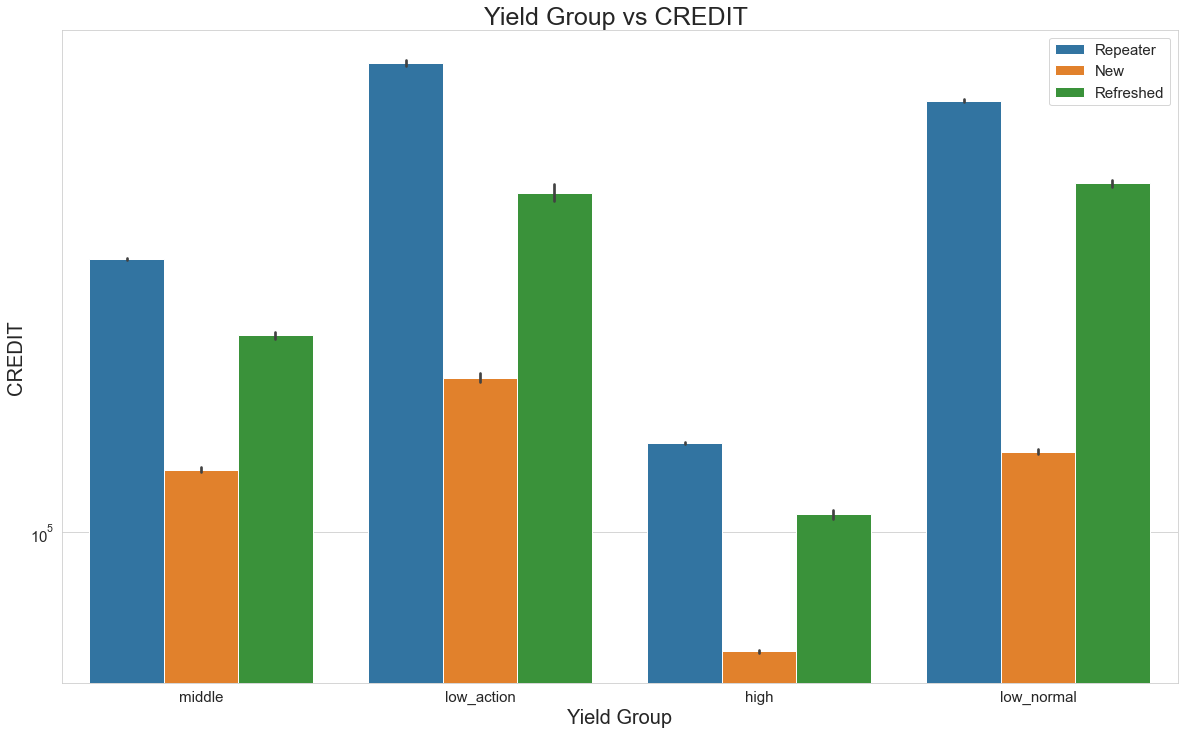

In [230]:
# Plot for NAME_YIELD_GROUP vs AMT_CREDIT vs NAME_CLIENT_TYPE for inp1.

plt.figure(figsize=(20,12))

ax2 = sns.barplot(data =inp1, x='NAME_YIELD_GROUP',y='AMT_CREDIT', hue ='NAME_CLIENT_TYPE')
plt.title('Yield Group vs CREDIT ', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('Yield Group' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0, size = 15)

plt.yscale('log')

plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- The repeater clients have recieved low yield (for both low_action & low_normal) with high credit amount, maybe these are those clients who pay their credit on time.

- NAME_YIELD_GROUP vs AMT_CREDIT vs NAME_CONTRACT_STATUS

    NAME_YIELD_GROUP :- Grouped interest rate into small medium and high of the previous application.

    AMT_CREDIT :- Final credit amount on the previous application.

    NAME_CONTRACT_STATUS :- Contract status (approved, cancelled, ...) of previous application.

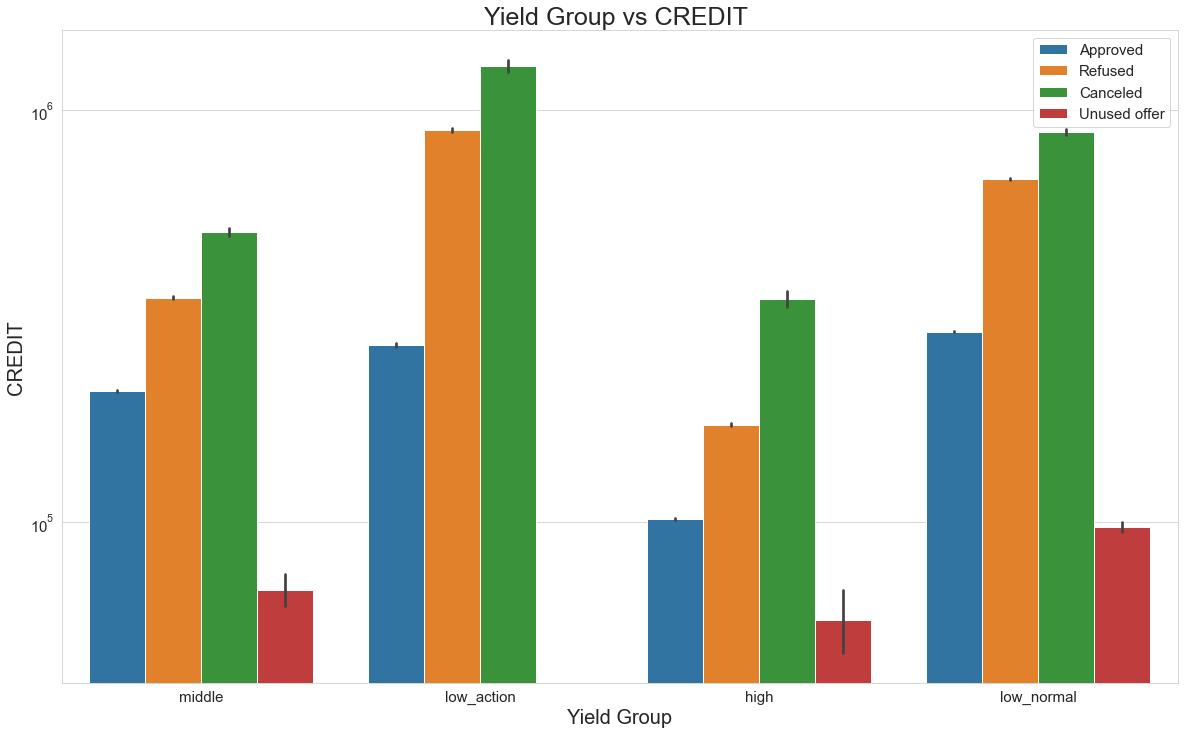

In [231]:
# Plot for NAME_YIELD_GROUP vs AMT_CREDIT vs NAME_CONTRACT_STATUS for inp1

plt.figure(figsize=(20,12))

ax2 = sns.barplot(data =inp1, x='NAME_YIELD_GROUP',y='AMT_CREDIT', hue ='NAME_CONTRACT_STATUS')
plt.title('Yield Group vs CREDIT ', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('Yield Group' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0, size = 15)

plt.yscale('log')

plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- Many applicants have cancelled their application midway, although they have applied for high credit with low yield (interest rate).

- NAME_PORTFOLIO vs AMT_CREDIT vs CODE_REJECT_REASON

    NAME_PORTFOLIO :- Was the previous application for CASH, POS.

    AMT_CREDIT :- Final credit amount on the previous application.

    CODE_REJECT_REASON :- Why was the previous application rejected.

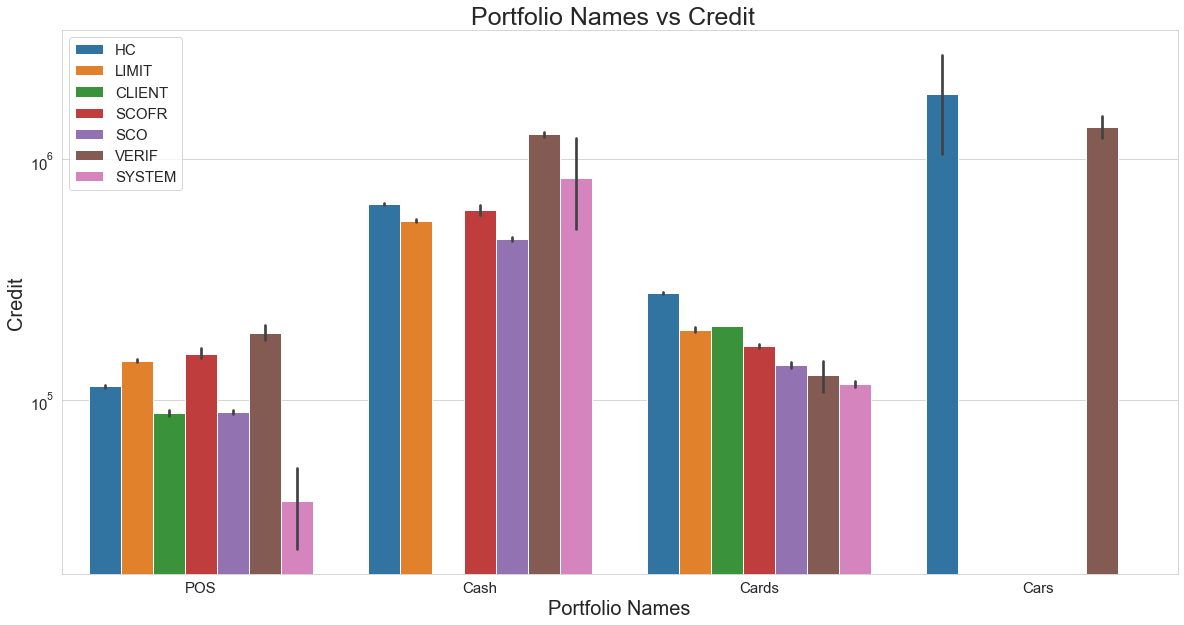

In [232]:
# Plot for NAME_PORTFOLIO vs AMT_CREDIT vs CODE_REJECT_REASON for inp1.

plt.figure(figsize=(20,10))

ax2 = sns.barplot(data =inp1, x='NAME_PORTFOLIO',y='AMT_CREDIT', hue ='CODE_REJECT_REASON')
plt.title('Portfolio Names vs Credit  ', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('Portfolio Names' , fontsize = 20)
plt.ylabel('Credit' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0, size = 15)

plt.yscale('log')

plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- The cash application of clients having high credit amount was rejected maaximum times on the basis of VERIF, followed by SYSTEM.
- In case of cars application of clients having high credit amount got rejected maximum times on basis of HC, followed by VERIF.

# 4. Top 10 Correlation
- Data Analysis for dataframe inp1 i.e. Previous Application.

In [233]:
# Find the list of all numeric variables("int", "float") and find the correlation between them.

var_prev = list(inp1.select_dtypes(['int64','float']).columns)

var_prev = inp1[var_prev]

var_prev_corr = var_prev.corr()
var_prev_corr

# Find the List of Top 10 Correlation in previous_app.

top10_prev = var_prev_corr.where(np.triu(np.ones(var_prev_corr.shape),k=1).astype(np.bool)).unstack().reset_index()

top10_prev.columns=['Column1','Column2','Correlation']
top10_prev.dropna(subset=['Correlation'],inplace=True)

# Top 10 correlation.

top10_prev = top10_prev.sort_values(by=['Correlation'], ascending=False)
top10_prev = top10_prev.head(10)
top10_prev

Column1          Column2  Correlation
48  AMT_GOODS_PRICE  AMT_APPLICATION     0.987143
39       AMT_CREDIT  AMT_APPLICATION     0.975824
49  AMT_GOODS_PRICE       AMT_CREDIT     0.971117
47  AMT_GOODS_PRICE      AMT_ANNUITY     0.816293
38       AMT_CREDIT      AMT_ANNUITY     0.811668
29  AMT_APPLICATION      AMT_ANNUITY     0.805556
75      CNT_PAYMENT  AMT_APPLICATION     0.681114
77      CNT_PAYMENT  AMT_GOODS_PRICE     0.676007
76      CNT_PAYMENT       AMT_CREDIT     0.674387
74      CNT_PAYMENT      AMT_ANNUITY     0.406183

- The application amount and good's price have the highest correlation as this is product the client was to purchased, so applied for credit on it.
- The 2nd highly correlated variables are credit amount and application amount, as the client got the credit amount what he/she asked for.
- There is positive correlation between credit amount and good's price, between annuity and good's price, between credit amount and annuity.

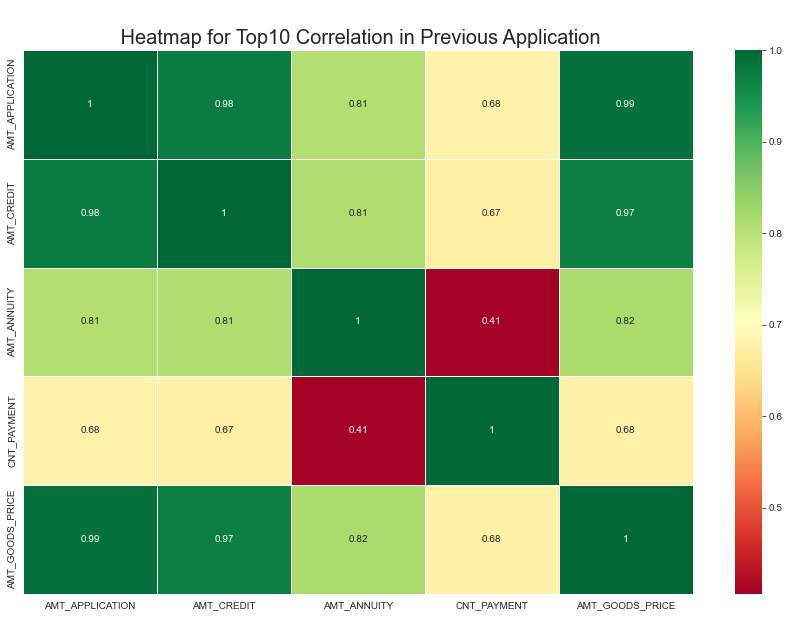

In [234]:
# Vizualizing Heatmap for few desired columns.

plt.figure(figsize=(15,10))
ax = sns.heatmap(inp1[["AMT_APPLICATION","AMT_CREDIT","AMT_ANNUITY","CNT_PAYMENT", "AMT_GOODS_PRICE"]].corr(), annot=True, cmap='RdYlGn', linewidths=0.7)

# Labelling heatmap, x-axis and y-axis.
plt.title('\n Heatmap for Top10 Correlation in Previous Application', fontsize=20, fontweight=3)

plt.show()

- The application amount is highly correlated with good's price (0.99).
- The least correlation is of 0.41 between cnt_payment and annuity.
- Also, application amount and credit amount have the highest correlation amongst all other variables considered here (0.98).

# SOME IMPORTANT VARIABLES that I did analysis on. 
These are some variables from the data that can be monitored and analysis can be done to get desired information.

- AMT_CREDIT
- AMT_INCOME_TOTAL
- AMT_APPLICATION
- AMT_ANNUITY
- AMT_GOODS_PRICE
- AGE (Derived from DAYS_BIRTH)
- YEARS_EMPLOYED
- CNT_CHILDREN
- CNT_FAM_MEMBERS
- CONTRACT_TYPE
- CODE_GENDER
- FLAG_OWN_REALTY
- FLAG_OWN_CAR
- NAME_INCOME_TYPE
- OCCUPATION_TYPE
- NAME_EDUCATION_TYPE
- INCOME_RANGE(Binned from AMT_INCOME_TOTAL)
- NAME_INCOME_TYPE
- NAME_PORTFOLIO
- DAYS_DECISION
- CNT_PAYMENT
- NAME_PRODUCT_TYPE
- CODE_REJECT_REASON
- NAME_GOODS_CATEGORY
- CONTRACT_STATUS
- PRODUCT_COMBINATION
- NAME_YIELD_GROUP
- NAME_PAYMENT_TYPE
- CHANNEL_TYPE